In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import glob
plt.rcParams.update({'mathtext.default':'regular'})

### Read in csv files and clean data

In [105]:
logit_standard_df = pd.read_csv('Logit Parameters, Random, Standard.csv',skiprows=6)
logit_standard_df.drop(['%-Random-Inspections', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  'radius-of-peers', 'length-of-run',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Compliant-Inspectees'], inplace=True, axis=1)
logit_standard_df = logit_standard_df.rename(columns={'[step]': 'step', '[run number]':'run','logit-normal-mu':'mu', 'logit-normal-sigma':'sigma'})
logit_standard_df['total-inspectees'] = logit_standard_df['#-compliant-inspectees'] + logit_standard_df['#-unintentional-violators'] + logit_standard_df['#-conscious-violators'] + logit_standard_df['#-criminal-violators'] 
logit_standard_df['perc-compliant'] = logit_standard_df['#-compliant-inspectees'] / logit_standard_df['total-inspectees'] * 100
logit_standard_df['perc-compliant'] = logit_standard_df['perc-compliant'].fillna(0)
logit_standard_df['perc-unintentional'] = logit_standard_df['#-unintentional-violators'] / logit_standard_df['total-inspectees'] * 100
logit_standard_df['perc-unintentional'] = logit_standard_df['perc-unintentional'].fillna(0)
logit_standard_df['perc-conscious'] = logit_standard_df['#-conscious-violators'] / logit_standard_df['total-inspectees'] * 100
logit_standard_df['perc-conscious'] = logit_standard_df['perc-conscious'].fillna(0)
logit_standard_df['perc-criminal'] = logit_standard_df['#-criminal-violators'] / logit_standard_df['total-inspectees'] * 100
logit_standard_df['perc-criminal'] = logit_standard_df['perc-criminal'].fillna(0)
logit_standard_df['perc-noncompliant'] = (logit_standard_df['perc-unintentional'] + logit_standard_df['perc-conscious'] + logit_standard_df['perc-criminal']) 

In [3]:
logit_standard_df.columns

Index(['run', 'mu', 'sigma', 'step', 'avg-compliance-rate',
       '#-compliant-inspectees', '#-unintentional-violators',
       '#-conscious-violators', '#-criminal-violators',
       'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity 

In [106]:
logit_standard_df['sum-absorb-inspectees'] = (logit_standard_df['count inspectees with [absorbance-capacity < .1]'] + 
logit_standard_df['count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]'] + 
logit_standard_df['count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]'] +
logit_standard_df['count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]'] + 
logit_standard_df['count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]'] +
logit_standard_df['count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]'] + 
logit_standard_df['count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]'] +
logit_standard_df['count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]'] + 
logit_standard_df['count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]'] +
logit_standard_df['count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'] )
logit_standard_df['perc-1'] = logit_standard_df['count inspectees with [absorbance-capacity < .1]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-12'] = logit_standard_df['count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]'] / logit_standard_df['sum-absorb-inspectees'] * 100 
logit_standard_df['perc-23'] = logit_standard_df['count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-34'] = logit_standard_df['count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-45'] = logit_standard_df['count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-56'] = logit_standard_df['count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-67'] = logit_standard_df['count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-78'] = logit_standard_df['count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-89'] = logit_standard_df['count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-91'] = logit_standard_df['count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df.drop(['count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]',
                       'total-inspectees','sum-absorb-inspectees'], inplace=True, axis=1)

In [87]:
logit_standard_df

run   mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
0           5  0.0    0.0     0             0.000000                       0   
1          11  0.0    0.1     0             0.000000                       0   
2           3  0.0    0.0     0             0.000000                       0   
3           8  0.0    0.0     0             0.000000                       0   
4           7  0.0    0.0     0             0.000000                       0   
...       ...  ...    ...   ...                  ...                     ...   
1211205  1210  1.0    1.0   996            30.280000                    2407   
1211206  1210  1.0    1.0   997            30.280324                    2412   
1211207  1210  1.0    1.0   998            30.280677                    2400   
1211208  1210  1.0    1.0   999            30.280594                    2392   
1211209  1210  1.0    1.0  1000            30.281016                    2381   

         #-unintentional-violators  #-conscious-violators  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   
...                            ...                    ...   
1211205                         55                   5400   
1211206                         49                   5398   
1211207                         59                   5399   
1211208                         60                   5409   
1211209                         57                   5418   

         #-criminal-violators  perc-compliant  ...    perc-1  perc-12  \
0                           0        0.000000  ...  0.000000  0.00000   
1                           0        0.000000  ...  0.000000  0.00000   
2                           0        0.000000  ...  0.000000  0.00000   
3                           0        0.000000  ...  0.000000  0.00000   
4                           0        0.000000  ...  0.000000  0.00000   
...                       ...             ...  ...       ...      ...   
1211205                    16       30.553440  ...  0.076161  0.67276   
1211206                    19       30.616908  ...  0.076161  0.67276   
1211207                    20       30.464585  ...  0.076161  0.67276   
1211208                    17       30.363036  ...  0.076161  0.67276   
1211209                    22       30.223407  ...  0.076161  0.67276   

         perc-23   perc-34    perc-45     perc-56    perc-67    perc-78  \
0        0.00000  0.000000   0.000000  100.000000   0.000000   0.000000   
1        0.00000  0.000000  49.961919   50.038081   0.000000   0.000000   
2        0.00000  0.000000   0.000000  100.000000   0.000000   0.000000   
3        0.00000  0.000000   0.000000  100.000000   0.000000   0.000000   
4        0.00000  0.000000   0.000000  100.000000   0.000000   0.000000   
...          ...       ...        ...         ...        ...        ...   
1211205  2.41178  4.430058   7.539985   11.881188  16.780909  21.337903   
1211206  2.41178  4.430058   7.539985   11.881188  16.780909  21.337903   
1211207  2.41178  4.430058   7.539985   11.881188  16.780909  21.337903   
1211208  2.41178  4.430058   7.539985   11.881188  16.780909  21.337903   
1211209  2.41178  4.430058   7.539985   11.881188  16.780909  21.337903   

           perc-89    perc-91  
0         0.000000   0.000000  
1         0.000000   0.000000  
2         0.000000   0.000000  
3         0.000000   0.000000  
4         0.000000   0.000000  
...            ...        ...  
1211205  23.368875  11.500381  
1211206  23.368875  11.500381  
1211207  23.368875  11.500381  
1211208  23.368875  11.500381  
1211209  23.368875  11.500381  

[1211210 rows x 24 columns]

In [246]:
agg_summary_logit_standard_avg = logit_standard_df.groupby(['mu', 'sigma'], as_index=False).mean()
agg_summary_logit_standard_avg.drop(['run','step'], inplace=True, axis=1)
agg_summary_logit_standard_avg = agg_summary_logit_standard_avg.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                                                'perc-compliant':'perc-compliant-mean', 
                                                                                'perc-unintentional':'perc-unintentional-mean',
                                                                               'perc-conscious': 'perc-conscious-mean',
                                                                               'perc-criminal': 'perc-criminal-mean',
                                                                               'perc-noncompliant': 'perc-noncompliant-mean',
                                                                               'perc-1':'perc-1-mean', 
                                                                                'perc-12':'perc-12-mean', 
                                                                                'perc-23':'perc-23-mean', 
                                                                                'perc-34':'perc-34-mean',
                                                                                'perc-45':'perc-45-mean', 
                                                                                'perc-56':'perc-56-mean', 
                                                                                'perc-67':'perc-67-mean', 
                                                                                'perc-78':'perc-78-mean', 
                                                                                'perc-89':'perc-89-mean', 
                                                                                'perc-91':'perc-91-mean'})
agg_summary_logit_standard_avg['index'] = ((agg_summary_logit_standard_avg['mu'] * 10).astype('int')).astype('str') + "-" + ((agg_summary_logit_standard_avg['sigma'] * 10).astype('int')).astype('str')                                                                                  
agg_summary_logit_standard_avg = agg_summary_logit_standard_avg.set_index('index')
agg_summary_logit_standard_avg

mu  sigma  avg-compliance-rate-mean  #-compliant-inspectees  \
index                                                                 
0-0    0.0    0.0                  4.495900              261.658442   
0-1    0.0    0.1                 98.336479             7854.471229   
0-2    0.0    0.2                 98.480551             7856.711189   
0-3    0.0    0.3                 98.489880             7856.952647   
0-4    0.0    0.4                 98.408344             7855.398701   
...    ...    ...                       ...                     ...   
10-6   1.0    0.6                 12.393318              893.935265   
10-7   1.0    0.7                 17.470331             1314.568132   
10-8   1.0    0.8                 20.943982             1626.738661   
10-9   1.0    0.9                 30.071417             2397.866234   
10-10  1.0    1.0                 35.962753             2971.026174   

       #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
index                                                                           
0-0                   102.360240            7463.624176             42.484615   
0-1                     1.412488              14.084316              0.159241   
0-2                     1.376723              11.879920              0.159740   
0-3                     1.358342              11.659840              0.156843   
0-4                     1.382418              13.188212              0.158242   
...                          ...                    ...                   ...   
10-6                   88.099401            6853.651449             34.441658   
10-7                   79.971329            6445.832468             29.755844   
10-8                   74.058541            6142.811489             26.518981   
10-9                   62.048651            5390.075624             20.136963   
10-10                  53.201698            4830.259840             15.639960   

       perc-compliant-mean  perc-unintentional-mean  perc-conscious-mean  ...  \
index                                                                     ...   
0-0               3.321393                 1.299321            94.740104  ...   
0-1              99.701351                 0.017933             0.178794  ...   
0-2              99.729782                 0.017479             0.150811  ...   
0-3              99.732846                 0.017245             0.148017  ...   
0-4              99.713121                 0.017551             0.167418  ...   
...                    ...                      ...                  ...  ...   
10-6             11.347247                 1.118300            86.997365  ...   
10-7             16.686582                 1.015125            81.820684  ...   
10-8             20.649143                 0.940071            77.974264  ...   
10-9             30.437512                 0.787623            68.419355  ...   
10-10            37.712961                 0.675323            61.313289  ...   

       perc-1-mean  perc-12-mean  perc-23-mean  perc-34-mean  perc-45-mean  \
index                                                                        
0-0       0.000000      0.000000      0.000000      0.000000      0.000000   
0-1       0.000000      0.000000      0.000000      0.003808     49.988576   
0-2       0.000000      0.000000      0.001269      2.168063     47.892866   
0-3       0.000000      0.000000      0.256410      8.681137     41.155116   
0-4       0.000000      0.021579      1.751714     13.970551     34.433866   
...            ...           ...           ...           ...           ...   
10-6      0.000000      0.002539      0.110434      0.880934      3.811881   
10-7      0.000000      0.022848      0.378269      1.834222      5.392232   
10-8      0.005077      0.139629      0.883473      2.914445      6.497842   
10-9      0.021579      0.388423      1.548616      3.875349      7.373699   
10-10     0.076161      0.783194      2.

In [89]:
agg_summary_logit_standard_std = logit_standard_df.groupby(['mu', 'sigma'], as_index=False).std()
agg_summary_logit_standard_std.drop(['run','step'], inplace=True, axis=1)
agg_summary_logit_standard_std = agg_summary_logit_standard_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                                                'perc-compliant':'perc-compliant-std', 
                                                                                'perc-unintentional':'perc-unintentional-std',
                                                                               'perc-conscious': 'perc-conscious-std',
                                                                               'perc-criminal': 'perc-criminal-std',
                                                                               'perc-noncompliant': 'perc-noncompliant-std',
                                                                               'perc-1':'perc-1-std', 
                                                                                'perc-12':'perc-12-std', 
                                                                                'perc-23':'perc-23-std', 
                                                                                'perc-34':'perc-34-std',
                                                                                'perc-45':'perc-45-std', 
                                                                                'perc-56':'perc-56-std', 
                                                                                'perc-67':'perc-67-std', 
                                                                                'perc-78':'perc-78-std', 
                                                                                'perc-89':'perc-89-std', 
                                                                                'perc-91':'perc-91-std'})
agg_summary_logit_standard_std['index'] = ((agg_summary_logit_standard_std['mu'] * 10).astype('int')).astype('str') + "-" + ((agg_summary_logit_standard_std['sigma'] * 10).astype('int')).astype('str')                                                                                  
agg_summary_logit_standard_std = agg_summary_logit_standard_std.set_index('index')
agg_summary_logit_standard_std

mu  sigma  avg-compliance-rate-std  #-compliant-inspectees  \
index                                                                
0-0    0.0    0.0                 3.611900              304.709767   
0-1    0.0    0.1                 7.172941              318.836032   
0-2    0.0    0.2                 7.023649              311.974732   
0-3    0.0    0.3                 7.021956              310.849778   
0-4    0.0    0.4                 7.078532              314.604910   
...    ...    ...                      ...                     ...   
10-6   1.0    0.6                 5.728130              485.451462   
10-7   1.0    0.7                 5.687874              489.879517   
10-8   1.0    0.8                 8.247895              693.220806   
10-9   1.0    0.9                 9.530153              839.447948   
10-10  1.0    1.0                 6.951439              668.757262   

       #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
index                                                                           
0-0                    29.559089             388.643245              5.180508   
0-1                    31.973881             169.935651              4.234841   
0-2                    31.996938             157.147349              4.248472   
0-3                    31.911491             155.266179              4.239717   
0-4                    31.950660             162.338534              4.239900   
...                          ...                    ...                   ...   
10-6                   30.699388             526.025417              6.303403   
10-7                   30.928969             523.566495              6.290002   
10-8                   31.662686             706.972096              7.193839   
10-9                   32.805581             837.867864              7.538950   
10-10                  32.169041             668.349738              6.149781   

       perc-compliant-std  perc-unintentional-std  perc-conscious-std  ...  \
index                                                                  ...   
0-0              3.867958                0.375307            4.933141  ...   
0-1              4.046981                0.405962            2.157371  ...   
0-2              3.959904                0.406254            1.995044  ...   
0-3              3.945629                0.405170            1.971166  ...   
0-4              3.993290                0.405667            2.060935  ...   
...                   ...                     ...                 ...  ...   
10-6             6.162163                0.389779            6.677070  ...   
10-7             6.218361                0.392693            6.645867  ...   
10-8             8.799474                0.402005            8.973961  ...   
10-9            10.655607                0.416511           10.635514  ...   
10-10            8.488924                0.408433            8.483729  ...   

       perc-1-std  perc-12-std  perc-23-std  perc-34-std  perc-45-std  \
index                                                                   
0-0      0.000000     0.000000     0.000000     0.000000     0.000000   
0-1      0.000000     0.000000     0.000000     0.005817     0.538942   
0-2      0.000000     0.000000     0.003808     0.116455     0.362575   
0-3      0.000000     0.000000     0.068313     0.250848     0.289628   
0-4      0.000000     0.019707     0.177991     0.482888     0.402190   
...           ...          ...          ...          ...          ...   
10-6     0.000000     0.005078     0.031120     0.110840     0.149991   
10-7     0.000000     0.009499     0.052891     0.124410     0.245153   
10-8     0.008420     0.039332     0.075571     0.144647     0.191127   
10-9     0.011425     0.064529     0.180240     0.183083     0.273232   
10-10    0.027812     0.123734     0.161989     0.253786     0.290428   

       perc-56-std  perc-67-std  perc-78-std  perc-89-std  perc-91-std  
index

In [90]:
agg_summary_logit_standard_std.drop(['mu','sigma'], inplace=True, axis=1)
agg_summary_logit_standard = pd.concat([agg_summary_logit_standard_avg, agg_summary_logit_standard_std], axis=1)
#agg_summary_logit_standard.to_csv('agg_summary_logit_standard.csv')
agg_summary_logit_standard

mu  sigma  avg-compliance-rate-mean  #-compliant-inspectees  \
index                                                                 
0-0    0.0    0.0                  4.495900              261.658442   
0-1    0.0    0.1                 98.336479             7854.471229   
0-2    0.0    0.2                 98.480551             7856.711189   
0-3    0.0    0.3                 98.489880             7856.952647   
0-4    0.0    0.4                 98.408344             7855.398701   
...    ...    ...                       ...                     ...   
10-6   1.0    0.6                 12.393318              893.935265   
10-7   1.0    0.7                 17.470331             1314.568132   
10-8   1.0    0.8                 20.943982             1626.738661   
10-9   1.0    0.9                 30.071417             2397.866234   
10-10  1.0    1.0                 35.962753             2971.026174   

       #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
index                                                                           
0-0                   102.360240            7463.624176             42.484615   
0-1                     1.412488              14.084316              0.159241   
0-2                     1.376723              11.879920              0.159740   
0-3                     1.358342              11.659840              0.156843   
0-4                     1.382418              13.188212              0.158242   
...                          ...                    ...                   ...   
10-6                   88.099401            6853.651449             34.441658   
10-7                   79.971329            6445.832468             29.755844   
10-8                   74.058541            6142.811489             26.518981   
10-9                   62.048651            5390.075624             20.136963   
10-10                  53.201698            4830.259840             15.639960   

       perc-compliant-mean  perc-unintentional-mean  perc-conscious-mean  ...  \
index                                                                     ...   
0-0               3.321393                 1.299321            94.740104  ...   
0-1              99.701351                 0.017933             0.178794  ...   
0-2              99.729782                 0.017479             0.150811  ...   
0-3              99.732846                 0.017245             0.148017  ...   
0-4              99.713121                 0.017551             0.167418  ...   
...                    ...                      ...                  ...  ...   
10-6             11.347247                 1.118300            86.997365  ...   
10-7             16.686582                 1.015125            81.820684  ...   
10-8             20.649143                 0.940071            77.974264  ...   
10-9             30.437512                 0.787623            68.419355  ...   
10-10            37.712961                 0.675323            61.313289  ...   

       perc-1-std  perc-12-std  perc-23-std  perc-34-std  perc-45-std  \
index                                                                   
0-0      0.000000     0.000000     0.000000     0.000000     0.000000   
0-1      0.000000     0.000000     0.000000     0.005817     0.538942   
0-2      0.000000     0.000000     0.003808     0.116455     0.362575   
0-3      0.000000     0.000000     0.068313     0.250848     0.289628   
0-4      0.000000     0.019707     0.177991     0.482888     0.402190   
...           ...          ...          ...          ...          ...   
10-6     0.000000     0.005078     0.031120     0.110840     0.149991   
10-7     0.000000     0.009499     0.052891     0.124410     0.245153   
10-8     0.008420     0.039332     0.075571     0.144647     0.191127   
10-9     0.011425     0.064529     0.180240     0.183083     0.273232   
10-10    0.027812     0.123734     0.161989     0.253786     0.290428   

       perc-56-std  perc-6

In [108]:
summary_standard = pd.concat([agg_summary_logit_standard_avg['mu'],
                                     agg_summary_logit_standard_avg['sigma'],
                                     agg_summary_logit_standard_avg['avg-compliance-rate-mean'], 
                                     agg_summary_logit_standard_std['avg-compliance-rate-std'],
                                     agg_summary_logit_standard_avg['perc-compliant-mean'], 
                                     agg_summary_logit_standard_std['perc-compliant-std']], axis=1)
summary_standard.round(decimals=3)

mu  sigma  avg-compliance-rate-mean  avg-compliance-rate-std  \
index                                                                  
0-0    0.0    0.0                     4.496                    3.612   
0-1    0.0    0.1                    98.336                    7.173   
0-2    0.0    0.2                    98.481                    7.024   
0-3    0.0    0.3                    98.490                    7.022   
0-4    0.0    0.4                    98.408                    7.079   
...    ...    ...                       ...                      ...   
10-6   1.0    0.6                    12.393                    5.728   
10-7   1.0    0.7                    17.470                    5.688   
10-8   1.0    0.8                    20.944                    8.248   
10-9   1.0    0.9                    30.071                    9.530   
10-10  1.0    1.0                    35.963                    6.951   

       perc-compliant-mean  perc-compliant-std  
index                                           
0-0                  3.321               3.868  
0-1                 99.701               4.047  
0-2                 99.730               3.960  
0-3                 99.733               3.946  
0-4                 99.713               3.993  
...                    ...                 ...  
10-6                11.347               6.162  
10-7                16.687               6.218  
10-8                20.649               8.799  
10-9                30.438              10.656  
10-10               37.713               8.489  

[121 rows x 6 columns]

In [247]:
standard_logit_mu_0 = summary_standard.query('mu==0')
standard_logit_mu_1 = summary_standard.query('mu==.1')
standard_logit_mu_2 = summary_standard.query('mu==.2')
standard_logit_mu_3 = summary_standard.query('mu==.3')
standard_logit_mu_4 = summary_standard.query('mu==.4')
standard_logit_mu_5 = summary_standard.query('mu==.5')
standard_logit_mu_6 = summary_standard.query('mu==.6')
standard_logit_mu_7 = summary_standard.query('mu==.7')
standard_logit_mu_8 = summary_standard.query('mu==.8')
standard_logit_mu_9 = summary_standard.query('mu==.9')
standard_logit_mu_10 = summary_standard.query('mu==1')
standard_logit_mu_1

mu  sigma  avg-compliance-rate-mean  avg-compliance-rate-std  \
index                                                                  
1-0    0.1    0.0                  8.154926                 5.176549   
1-1    0.1    0.1                 41.190560                11.195919   
1-2    0.1    0.2                 93.001249                12.396542   
1-3    0.1    0.3                 95.929514                 8.896941   
1-4    0.1    0.4                 97.459651                 7.887693   
1-5    0.1    0.5                 97.700249                 7.689568   
1-6    0.1    0.6                 97.900739                 7.549660   
1-7    0.1    0.7                 98.079663                 7.400139   
1-8    0.1    0.8                 97.909955                 7.531923   
1-9    0.1    0.9                 97.956036                 7.486910   
1-10   0.1    1.0                 98.196536                 7.274366   

       perc-compliant-mean  perc-compliant-std  
index                                           
1-0               7.341196            5.366451  
1-1              42.695213           12.934101  
1-2              97.840341            8.742316  
1-3              99.109458            5.454207  
1-4              99.506851            4.543032  
1-5              99.560073            4.395412  
1-6              99.608752            4.294623  
1-7              99.645791            4.185481  
1-8              99.609938            4.287000  
1-9              99.619474            4.240727  
1-10             99.670523            4.108381

In [109]:
agg_summary_logit_standard_1 = agg_summary_logit_standard.query('mu==.1').reset_index()
agg_summary_logit_standard_2 = agg_summary_logit_standard.query('mu==.2').reset_index()
agg_summary_logit_standard_3 = agg_summary_logit_standard.query('mu==.3').reset_index()
agg_summary_logit_standard_4 = agg_summary_logit_standard.query('mu==.4').reset_index()
agg_summary_logit_standard_5 = agg_summary_logit_standard.query('mu==.5').reset_index()
agg_summary_logit_standard_6 = agg_summary_logit_standard.query('mu==.6').reset_index()
agg_summary_logit_standard_7 = agg_summary_logit_standard.query('mu==.7').reset_index()
agg_summary_logit_standard_8 = agg_summary_logit_standard.query('mu==.8').reset_index()
agg_summary_logit_standard_9 = agg_summary_logit_standard.query('mu==.9').reset_index()
agg_summary_logit_standard_10 = agg_summary_logit_standard.query('mu==1').reset_index()
agg_summary_logit_standard_2

index   mu  sigma  avg-compliance-rate-mean  #-compliant-inspectees  \
0    2-0  0.2    0.0                  8.797483              633.245155   
1    2-1  0.2    0.1                 10.269457              729.385814   
2    2-2  0.2    0.2                 39.545984             3203.218182   
3    2-3  0.2    0.3                 81.292912             7029.097702   
4    2-4  0.2    0.4                 94.693860             7779.687912   
5    2-5  0.2    0.5                 96.060003             7811.692208   
6    2-6  0.2    0.6                 96.557667             7822.447153   
7    2-7  0.2    0.7                 96.523081             7818.621379   
8    2-8  0.2    0.8                 97.180724             7833.903896   
9    2-9  0.2    0.9                 97.595049             7841.812887   
10  2-10  0.2    1.0                 97.746739             7844.443956   

    #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                   95.755844            7102.548252             38.578422   
1                   92.274925            7011.654745             36.811888   
2                   51.182917            4601.280420             14.445954   
3                    9.554146             830.444855              1.030869   
4                    2.388511              87.802797              0.248052   
5                    2.015784              56.210989              0.208691   
6                    1.900100              45.579321              0.200999   
7                    1.905794              49.402797              0.197602   
8                    1.724076              34.319880              0.179820   
9                    1.629471              26.509391              0.175724   
10                   1.576324              23.936663              0.170629   

    perc-compliant-mean  perc-unintentional-mean  ...  perc-1-std  \
0              8.038157                 1.215487  ...    0.000000   
1              9.258527                 1.171302  ...    0.000000   
2             40.660309                 0.649698  ...    0.000000   
3             89.224405                 0.121280  ...    0.000000   
4             98.752082                 0.030322  ...    0.000000   
5             99.158328                 0.025591  ...    0.000000   
6             99.294848                 0.024122  ...    0.003808   
7             99.246285                 0.024195  ...    0.018871   
8             99.440274                 0.021888  ...    0.036262   
9             99.540669                 0.020687  ...    0.048984   
10            99.574066                 0.020012  ...    0.133651   

    perc-12-std  perc-23-std  perc-34-std  perc-45-std  perc-56-std  \
0      0.000000     0.000000     0.000000     0.000000     0.000000   
1      0.000000     0.000000     0.000000     0.186756     0.213357   
2      0.000000     0.000000     0.035657     0.168738     0.398301   
3      0.000000     0.018175     0.135917     0.473166     0.718066   
4      0.005817     0.069864     0.196478     0.570641     0.477680   
5      0.017266     0.131316     0.393602     0.660549     0.431919   
6      0.074842     0.128582     0.216993     0.366335     0.423074   
7      0.091970     0.298581     0.352076     0.420638     0.525399   
8      0.157147     0.292639     0.463573     0.374890     0.273924   
9      0.259844     0.265940     0.443026     0.440782     0.444486   
10     0.290309     0.248249     0.393226     0.402270     0.354460   

    perc-67-std  perc-78-std  perc-89-std  perc-91-std  
0      0.000000     0.000000     0.000000     0.000000  
1      0.173149     0.000000     0.000000     0.000000  
2      0.438154     0.035019     0.000000     0.000000  
3      0.415774     0.138994     0.011634     0.000000  
4      0.607892     0.223158     0.032014     0.000000  
5      0.497257     0.210968     0.082746     0.005817  
6      0.601241     0.490522     0.128463     0.024219  
7      0.307318     0.330352     0.2561

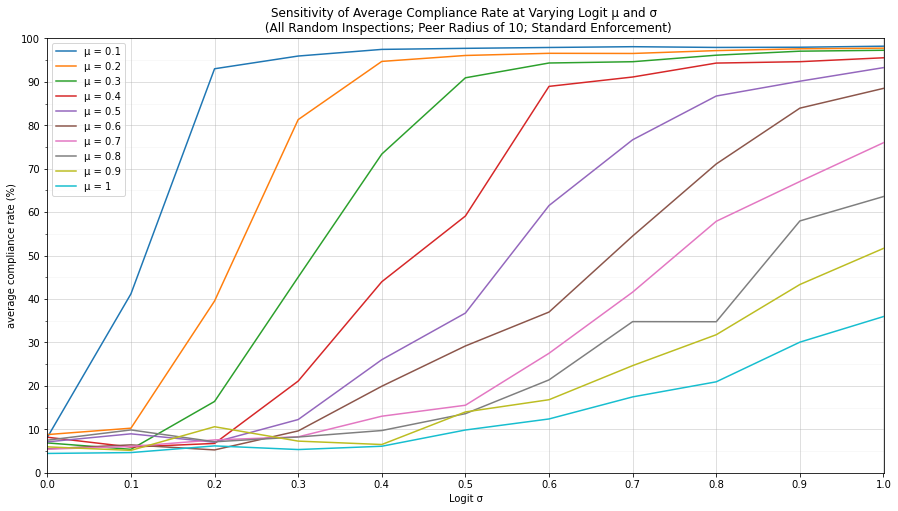

<Figure size 432x288 with 0 Axes>

In [40]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .1), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_logit_standard_1['sigma'], agg_summary_logit_standard_1['avg-compliance-rate-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_standard_2['sigma'], agg_summary_logit_standard_2['avg-compliance-rate-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_standard_3['sigma'], agg_summary_logit_standard_3['avg-compliance-rate-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_standard_4['sigma'], agg_summary_logit_standard_4['avg-compliance-rate-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_standard_5['sigma'], agg_summary_logit_standard_5['avg-compliance-rate-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_standard_6['sigma'], agg_summary_logit_standard_6['avg-compliance-rate-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_standard_7['sigma'], agg_summary_logit_standard_7['avg-compliance-rate-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_standard_8['sigma'], agg_summary_logit_standard_8['avg-compliance-rate-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_standard_9['sigma'], agg_summary_logit_standard_9['avg-compliance-rate-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_standard_10['sigma'], agg_summary_logit_standard_10['avg-compliance-rate-mean'], label="μ = 1")

plt.title("Sensitivity of Average Compliance Rate at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1.001)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Avg Compliance Standard.png', dpi=300, bbox_inches='tight')

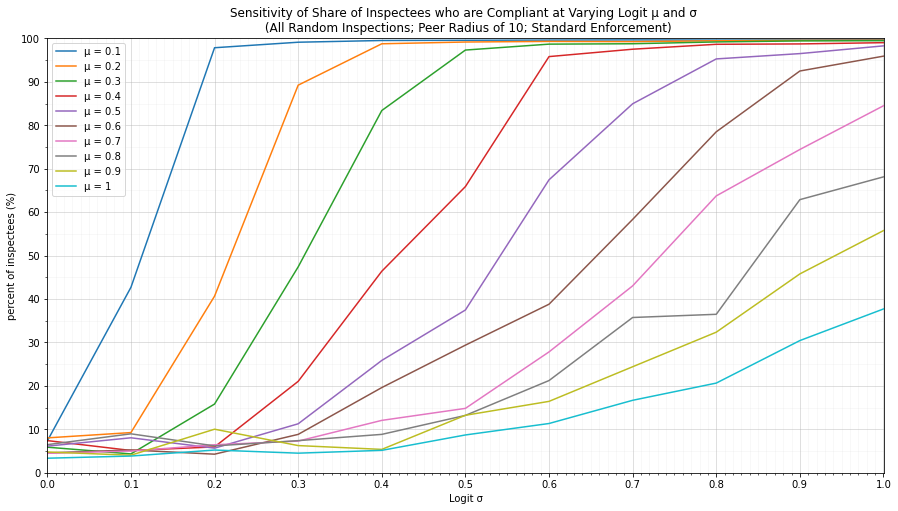

<Figure size 432x288 with 0 Axes>

In [187]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .01), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_logit_standard_1['sigma'], agg_summary_logit_standard_1['perc-compliant-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_standard_2['sigma'], agg_summary_logit_standard_2['perc-compliant-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_standard_3['sigma'], agg_summary_logit_standard_3['perc-compliant-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_standard_4['sigma'], agg_summary_logit_standard_4['perc-compliant-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_standard_5['sigma'], agg_summary_logit_standard_5['perc-compliant-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_standard_6['sigma'], agg_summary_logit_standard_6['perc-compliant-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_standard_7['sigma'], agg_summary_logit_standard_7['perc-compliant-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_standard_8['sigma'], agg_summary_logit_standard_8['perc-compliant-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_standard_9['sigma'], agg_summary_logit_standard_9['perc-compliant-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_standard_10['sigma'], agg_summary_logit_standard_10['perc-compliant-mean'], label="μ = 1")

plt.title("Sensitivity of Share of Inspectees who are Compliant at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1.001)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Compliant Standard.png', dpi=300, bbox_inches='tight')

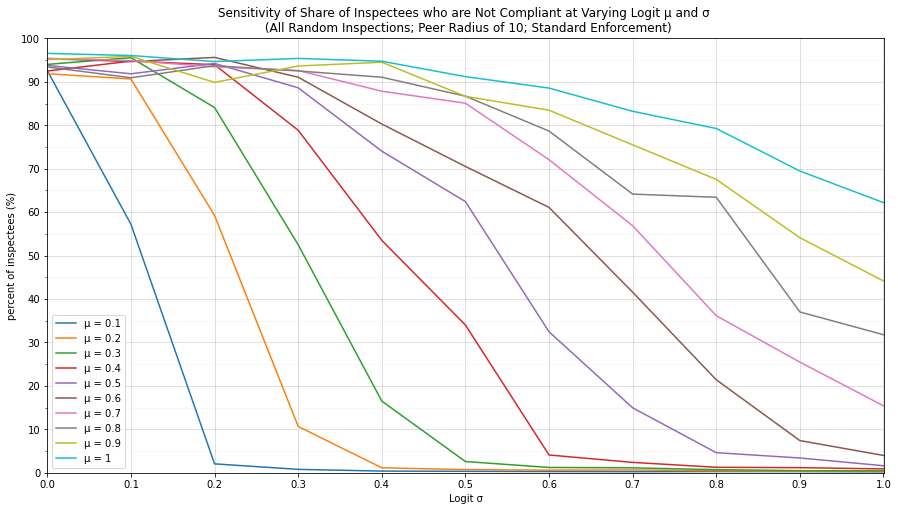

<Figure size 432x288 with 0 Axes>

In [50]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .1), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_logit_standard_1['sigma'], agg_summary_logit_standard_1['perc-noncompliant-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_standard_2['sigma'], agg_summary_logit_standard_2['perc-noncompliant-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_standard_3['sigma'], agg_summary_logit_standard_3['perc-noncompliant-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_standard_4['sigma'], agg_summary_logit_standard_4['perc-noncompliant-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_standard_5['sigma'], agg_summary_logit_standard_5['perc-noncompliant-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_standard_6['sigma'], agg_summary_logit_standard_6['perc-noncompliant-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_standard_7['sigma'], agg_summary_logit_standard_7['perc-noncompliant-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_standard_8['sigma'], agg_summary_logit_standard_8['perc-noncompliant-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_standard_9['sigma'], agg_summary_logit_standard_9['perc-noncompliant-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_standard_10['sigma'], agg_summary_logit_standard_10['perc-noncompliant-mean'], label="μ = 1")

plt.title("Sensitivity of Share of Inspectees who are Not Compliant at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1.001)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Not Compliant Standard.png', dpi=300, bbox_inches='tight')

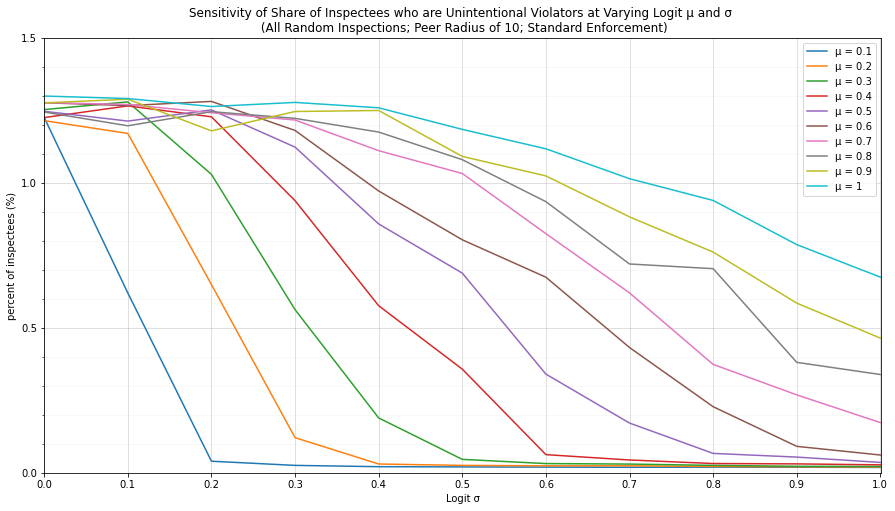

<Figure size 432x288 with 0 Axes>

In [49]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .1), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(agg_summary_logit_standard_1['sigma'], agg_summary_logit_standard_1['perc-unintentional-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_standard_2['sigma'], agg_summary_logit_standard_2['perc-unintentional-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_standard_3['sigma'], agg_summary_logit_standard_3['perc-unintentional-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_standard_4['sigma'], agg_summary_logit_standard_4['perc-unintentional-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_standard_5['sigma'], agg_summary_logit_standard_5['perc-unintentional-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_standard_6['sigma'], agg_summary_logit_standard_6['perc-unintentional-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_standard_7['sigma'], agg_summary_logit_standard_7['perc-unintentional-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_standard_8['sigma'], agg_summary_logit_standard_8['perc-unintentional-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_standard_9['sigma'], agg_summary_logit_standard_9['perc-unintentional-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_standard_10['sigma'], agg_summary_logit_standard_10['perc-unintentional-mean'], label="μ = 1")

plt.title("Sensitivity of Share of Inspectees who are Unintentional Violators at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1.001)
plt.ylim(0,1.501)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Unintentional Standard.png', dpi=300, bbox_inches='tight')

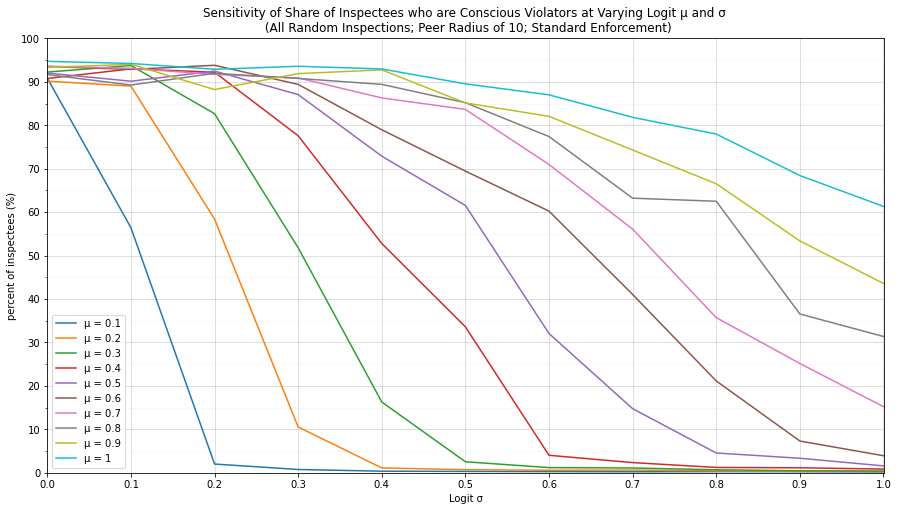

<Figure size 432x288 with 0 Axes>

In [48]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .1), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(agg_summary_logit_standard_1['sigma'], agg_summary_logit_standard_1['perc-conscious-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_standard_2['sigma'], agg_summary_logit_standard_2['perc-conscious-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_standard_3['sigma'], agg_summary_logit_standard_3['perc-conscious-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_standard_4['sigma'], agg_summary_logit_standard_4['perc-conscious-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_standard_5['sigma'], agg_summary_logit_standard_5['perc-conscious-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_standard_6['sigma'], agg_summary_logit_standard_6['perc-conscious-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_standard_7['sigma'], agg_summary_logit_standard_7['perc-conscious-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_standard_8['sigma'], agg_summary_logit_standard_8['perc-conscious-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_standard_9['sigma'], agg_summary_logit_standard_9['perc-conscious-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_standard_10['sigma'], agg_summary_logit_standard_10['perc-conscious-mean'], label="μ = 1")

plt.title("Sensitivity of Share of Inspectees who are Conscious Violators at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1.001)
plt.ylim(0,100.1)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Conscious Standard.png', dpi=300, bbox_inches='tight')

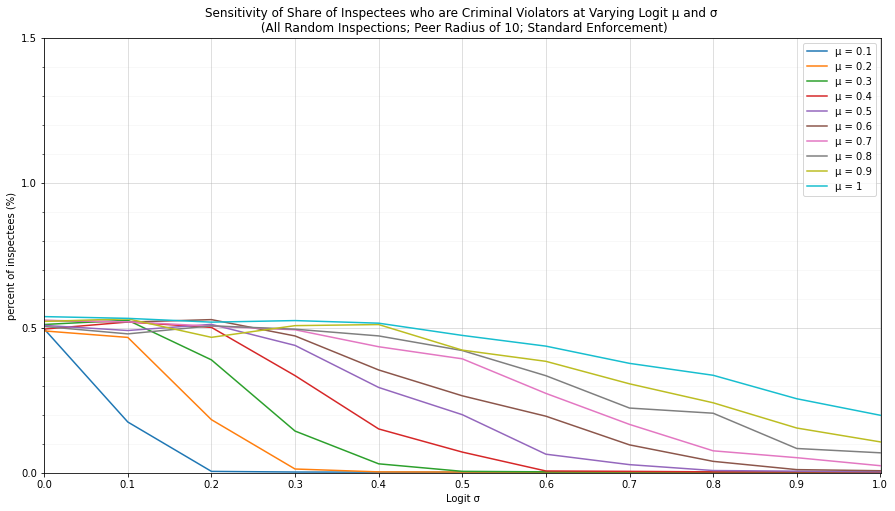

<Figure size 432x288 with 0 Axes>

In [52]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1.001, .1))
ax.set_xticks(np.arange(0, 1.001, .1), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(agg_summary_logit_standard_1['sigma'], agg_summary_logit_standard_1['perc-criminal-mean'], label="μ = 0.1")
plt.plot(agg_summary_logit_standard_2['sigma'], agg_summary_logit_standard_2['perc-criminal-mean'], label="μ = 0.2")
plt.plot(agg_summary_logit_standard_3['sigma'], agg_summary_logit_standard_3['perc-criminal-mean'], label="μ = 0.3")
plt.plot(agg_summary_logit_standard_4['sigma'], agg_summary_logit_standard_4['perc-criminal-mean'], label="μ = 0.4")
plt.plot(agg_summary_logit_standard_5['sigma'], agg_summary_logit_standard_5['perc-criminal-mean'], label="μ = 0.5")
plt.plot(agg_summary_logit_standard_6['sigma'], agg_summary_logit_standard_6['perc-criminal-mean'], label="μ = 0.6")
plt.plot(agg_summary_logit_standard_7['sigma'], agg_summary_logit_standard_7['perc-criminal-mean'], label="μ = 0.7")
plt.plot(agg_summary_logit_standard_8['sigma'], agg_summary_logit_standard_8['perc-criminal-mean'], label="μ = 0.8")
plt.plot(agg_summary_logit_standard_9['sigma'], agg_summary_logit_standard_9['perc-criminal-mean'], label="μ = 0.9")
plt.plot(agg_summary_logit_standard_10['sigma'], agg_summary_logit_standard_10['perc-criminal-mean'], label="μ = 1")

plt.title("Sensitivity of Share of Inspectees who are Criminal Violators at Varying Logit μ and σ \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('Logit σ')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1.001)
plt.ylim(0,1.501)
plt.grid(True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.legend()
plt.show()
plt.savefig('Logit Comparison Criminal Standard.png', dpi=300, bbox_inches='tight')

In [110]:
standard_logit_mu_1_df = logit_standard_df.query('mu==.1')
standard_logit_mu_2_df = logit_standard_df.query('mu==.2')
standard_logit_mu_3_df = logit_standard_df.query('mu==.3')
standard_logit_mu_4_df = logit_standard_df.query('mu==.4')
standard_logit_mu_5_df = logit_standard_df.query('mu==.5')
standard_logit_mu_6_df = logit_standard_df.query('mu==.6')
standard_logit_mu_7_df = logit_standard_df.query('mu==.7')
standard_logit_mu_8_df = logit_standard_df.query('mu==.8')
standard_logit_mu_9_df = logit_standard_df.query('mu==.9')
standard_logit_mu_10_df = logit_standard_df.query('mu==1')
standard_logit_mu_10_df

run   mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
1098058  1101  1.0    0.0     0             0.000000                       0   
1098070  1101  1.0    0.0     1             6.752983                    3119   
1098082  1101  1.0    0.0     2             9.094948                    1757   
1098096  1101  1.0    0.0     3            10.398155                    1256   
1098108  1101  1.0    0.0     4            11.174579                    1056   
...       ...  ...    ...   ...                  ...                     ...   
1211205  1210  1.0    1.0   996            30.280000                    2407   
1211206  1210  1.0    1.0   997            30.280324                    2412   
1211207  1210  1.0    1.0   998            30.280677                    2400   
1211208  1210  1.0    1.0   999            30.280594                    2392   
1211209  1210  1.0    1.0  1000            30.281016                    2381   

         #-unintentional-violators  #-conscious-violators  \
1098058                          0                      0   
1098070                        989                   3635   
1098082                        281                   5809   
1098096                        119                   6472   
1098108                        104                   6685   
...                            ...                    ...   
1211205                         55                   5400   
1211206                         49                   5398   
1211207                         59                   5399   
1211208                         60                   5409   
1211209                         57                   5418   

         #-criminal-violators  perc-compliant  ...    perc-1  perc-12  \
1098058                     0        0.000000  ...  0.000000  0.00000   
1098070                   133       39.601320  ...  0.000000  0.00000   
1098082                    31       22.302615  ...  0.000000  0.00000   
1098096                    31       15.943133  ...  0.000000  0.00000   
1098108                    33       13.404417  ...  0.000000  0.00000   
...                       ...             ...  ...       ...      ...   
1211205                    16       30.553440  ...  0.076161  0.67276   
1211206                    19       30.616908  ...  0.076161  0.67276   
1211207                    20       30.464585  ...  0.076161  0.67276   
1211208                    17       30.363036  ...  0.076161  0.67276   
1211209                    22       30.223407  ...  0.076161  0.67276   

         perc-23   perc-34   perc-45    perc-56    perc-67     perc-78  \
1098058  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098070  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098082  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098096  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098108  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
...          ...       ...       ...        ...        ...         ...   
1211205  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211206  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211207  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211208  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211209  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   

           perc-89    perc-91  
1098058   0.000000   0.000000  
1098070   0.000000   0.000000  
1098082   0.000000   0.000000  
1098096   0.000000   0.000000  
1098108   0.000000   0.000000  
...            ...        ...  
1211205  23.368875  11.500381  
1211206  23.368875  11.500381  
1211207  23.368875  11.500381  
1211208  23.368875  11.500381  
1211209  23.368875  11.500381  

[110110 rows x 24 columns]

In [192]:
standard_logit_sigma_5_df['mu'] = standard_logit_sigma_5_df['mu'] / 10

C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [196]:
standard_logit_sigma_5_df

run   mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
47265      51  0.0    0.5     0             0.000000                       0   
47279      51  0.0    0.5     1             6.397563                    3119   
47290      51  0.0    0.5     2            15.619447                    5145   
47303      51  0.0    0.5     3            24.724972                    5864   
47317      51  0.0    0.5     4            33.118600                    6287   
...       ...  ...    ...   ...                  ...                     ...   
1165890  1160  1.0    0.5   996             7.658641                     442   
1165902  1160  1.0    0.5   997             7.656535                     446   
1165914  1160  1.0    0.5   998             7.654646                     457   
1165927  1160  1.0    0.5   999             7.652576                     446   
1165939  1160  1.0    0.5  1000             7.650676                     431   

         #-unintentional-violators  #-conscious-violators  \
47265                            0                      0   
47279                          989                   3635   
47290                          190                   2523   
47303                           84                   1925   
47317                           38                   1549   
...                            ...                    ...   
1165890                         98                   7298   
1165902                        102                   7291   
1165914                        102                   7279   
1165927                         95                   7298   
1165939                         99                   7304   

         #-criminal-violators  perc-compliant  ...  perc-1   perc-12  \
47265                       0        0.000000  ...     0.0  0.342727   
47279                     133       39.601320  ...     0.0  0.342727   
47290                      19       65.316745  ...     0.0  0.342727   
47303                       5       74.435136  ...     0.0  0.342727   
47317                       4       79.804519  ...     0.0  0.342727   
...                       ...             ...  ...     ...       ...   
1165890                    40        5.610561  ...     0.0  0.000000   
1165902                    39        5.661335  ...     0.0  0.000000   
1165914                    40        5.800965  ...     0.0  0.000000   
1165927                    39        5.661335  ...     0.0  0.000000   
1165939                    44        5.470932  ...     0.0  0.000000   

          perc-23    perc-34    perc-45    perc-56    perc-67    perc-78  \
47265    4.353897  16.717441  28.966743  28.814420  16.438182   4.163493   
47279    4.353897  16.717441  28.966743  28.814420  16.438182   4.163493   
47290    4.353897  16.717441  28.966743  28.814420  16.438182   4.163493   
47303    4.353897  16.717441  28.966743  28.814420  16.438182   4.163493   
47317    4.353897  16.717441  28.966743  28.814420  16.438182   4.163493   
...           ...        ...        ...        ...        ...        ...   
1165890  0.012694   0.190404   2.005585   9.418634  26.783448  39.807058   
1165902  0.012694   0.190404   2.005585   9.418634  26.783448  39.807058   
1165914  0.012694   0.190404   2.005585   9.418634  26.783448  39.807058   
1165927  0.012694   0.190404   2.005585   9.418634  26.783448  39.807058   
1165939  0.012694   0.190404   2.005585   9.418634  26.783448  39.807058   

           perc-89   perc-91  
47265     0.203097  0.000000  
47279     0.203097  0.000000  
47290     0.203097  0.000000  
47303     0.203097  0.000000  
47317     0.203097  0.000000  
...            ...       ...  
1165890  20.804773  0.977405  
1165902  20.804773  0.977405  
1165914  20.804773  0.977405  
1165927  20.804773  0.977405  
1165939  20.804773  0.977405  

[110110 rows x 24 columns]

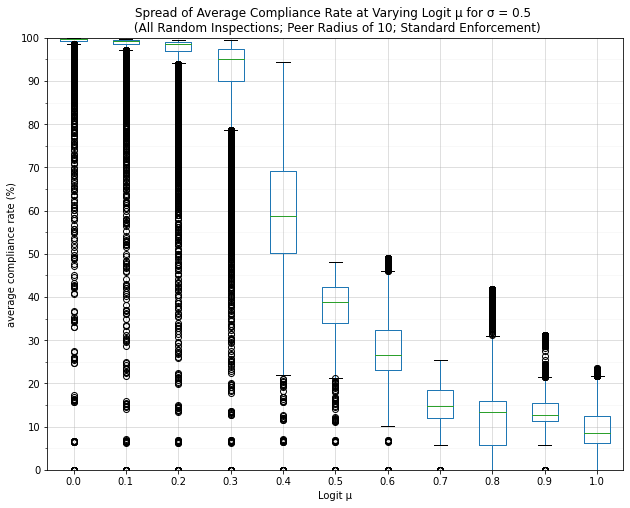

In [219]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_sigma_5_df.boxplot(column='avg-compliance-rate',by='mu', ax=ax)#,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit μ for σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit μ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard sigma = 0.5.png', dpi=300, bbox_inches='tight')

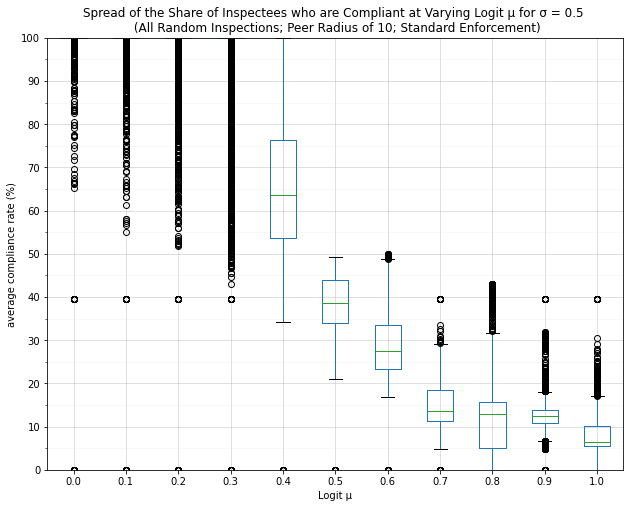

In [197]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_sigma_5_df.boxplot(column='perc-compliant',by='mu', ax=ax)#,showfliers=False)
plt.title('Spread of the Share of Inspectees who are Compliant at Varying Logit μ for σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit μ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard Compliant sigma = 0.5.png', dpi=300, bbox_inches='tight')

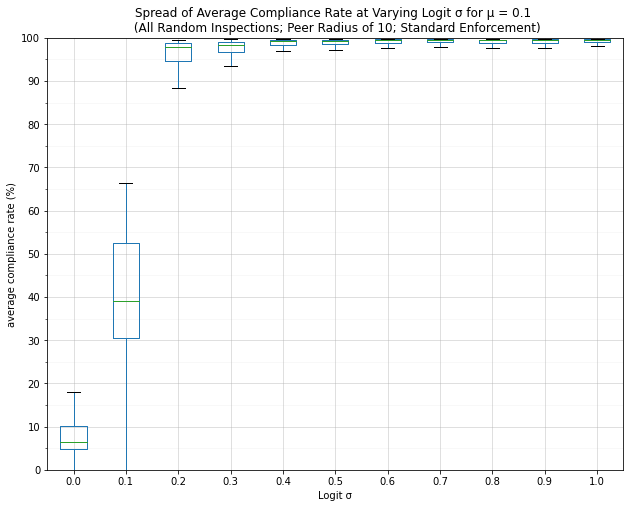

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_1_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard mu = 0.1.png', dpi=300, bbox_inches='tight')

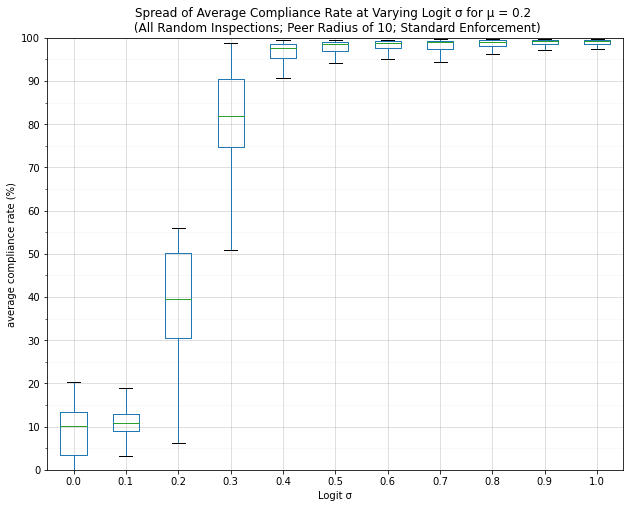

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_2_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.2 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard mu = 0.2.png', dpi=300, bbox_inches='tight')

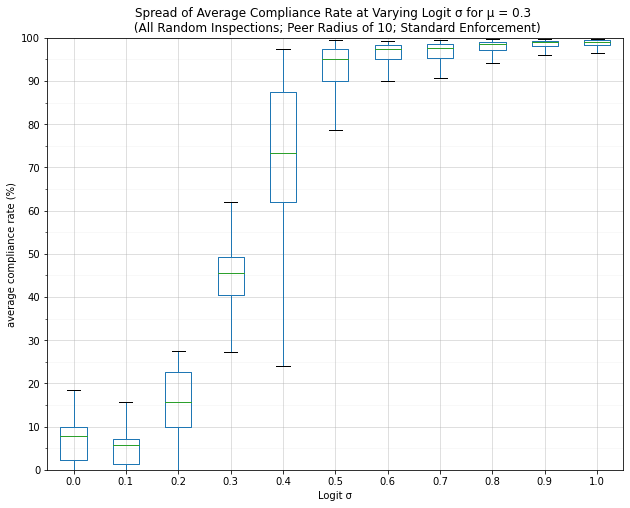

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_3_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.3 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard mu = 0.3.png', dpi=300, bbox_inches='tight')

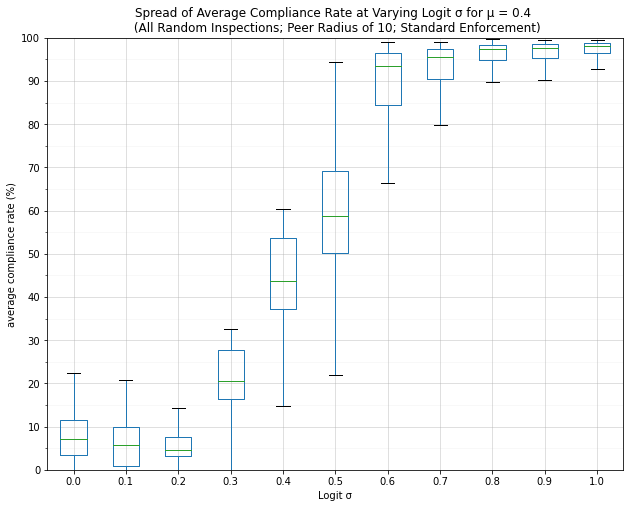

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_4_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.4 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard mu = 0.4.png', dpi=300, bbox_inches='tight')

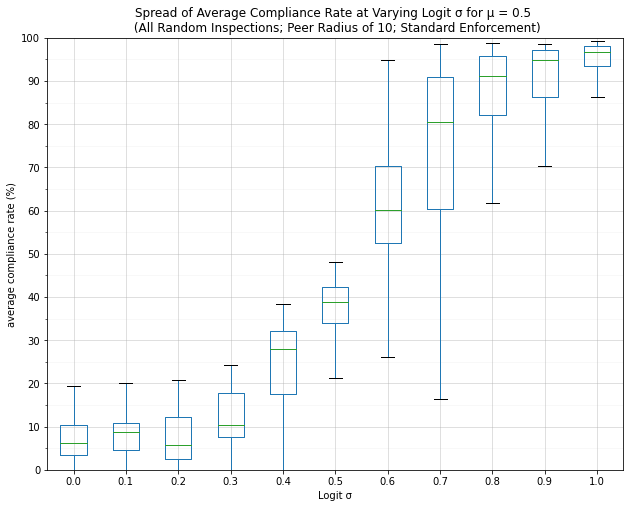

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_5_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard mu = 0.5.png', dpi=300, bbox_inches='tight')

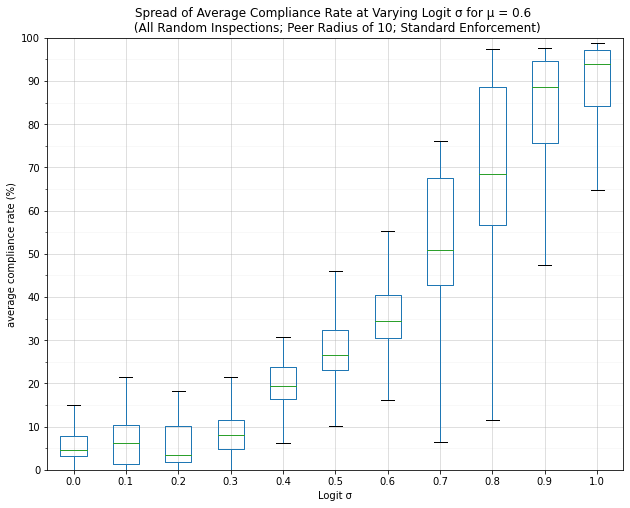

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_6_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.6 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard mu = 0.6.png', dpi=300, bbox_inches='tight')

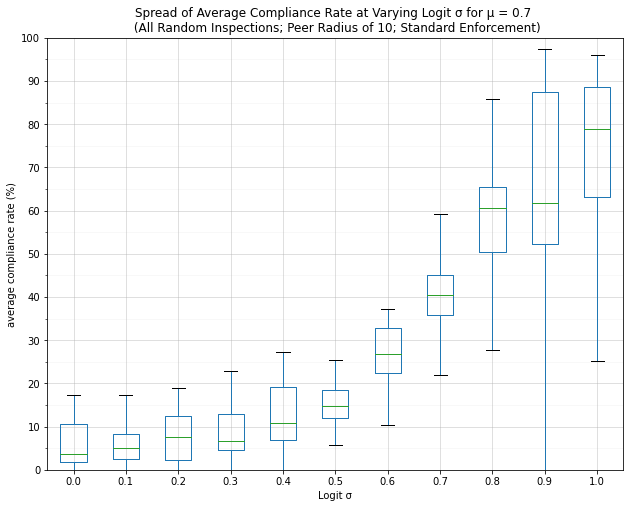

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_7_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.7 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard mu = 0.7.png', dpi=300, bbox_inches='tight')

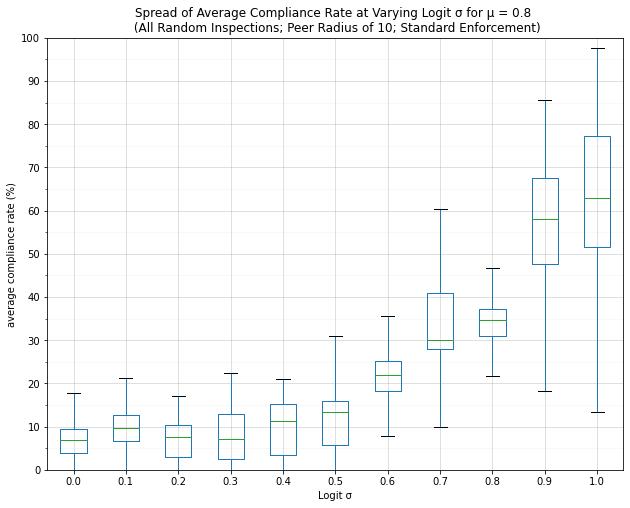

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_8_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.8 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard mu = 0.8.png', dpi=300, bbox_inches='tight')

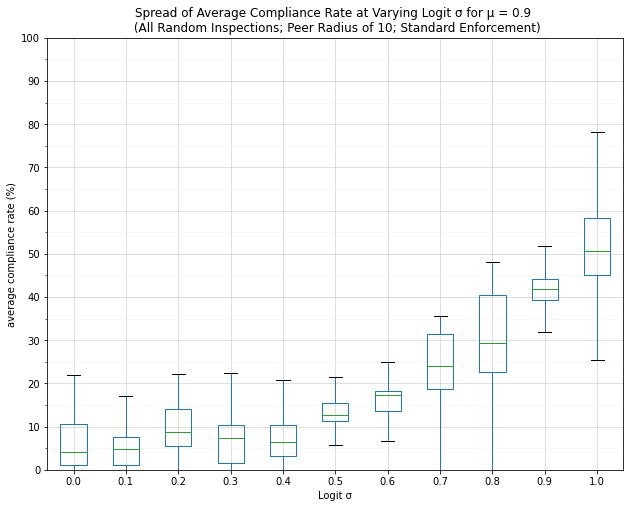

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_9_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 0.9 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard mu = 0.9.png', dpi=300, bbox_inches='tight')

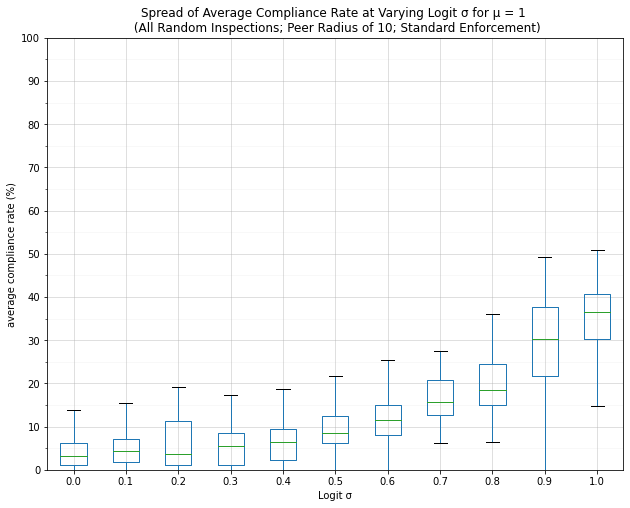

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_10_df.boxplot(column='avg-compliance-rate',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of Average Compliance Rate at Varying Logit σ for μ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard mu = 1.png', dpi=300, bbox_inches='tight')

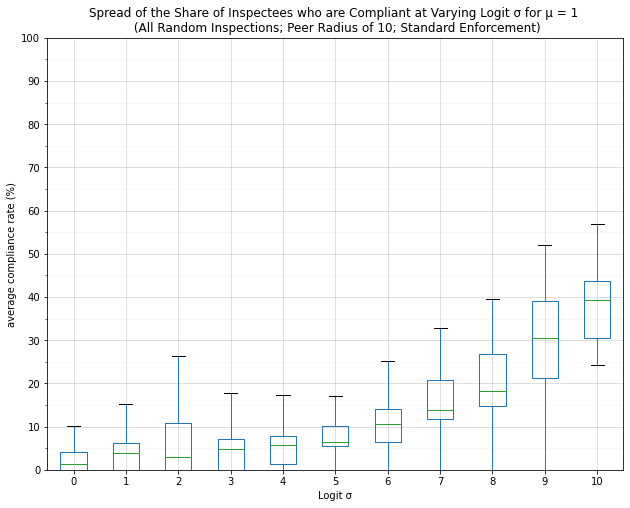

In [171]:
fig, ax = plt.subplots(figsize=(10,8))
standard_logit_mu_10_df.boxplot(column='perc-compliant',by='sigma', ax=ax,showfliers=False)
plt.title('Spread of the Share of Inspectees who are Compliant at Varying Logit σ for μ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)')
plt.ylabel('average compliance rate (%)')
plt.xlabel('Logit σ')
plt.grid(True)
plt.ylim(0,100.01)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
fig.suptitle('')  # turns off automatical subtitles
plt.savefig('Logit Boxplot Standard Compliant mu = 1.png', dpi=300, bbox_inches='tight')

#### Plot average for each value of % random inspections

In [111]:
standard_logit_mu_10_df

run   mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
1098058  1101  1.0    0.0     0             0.000000                       0   
1098070  1101  1.0    0.0     1             6.752983                    3119   
1098082  1101  1.0    0.0     2             9.094948                    1757   
1098096  1101  1.0    0.0     3            10.398155                    1256   
1098108  1101  1.0    0.0     4            11.174579                    1056   
...       ...  ...    ...   ...                  ...                     ...   
1211205  1210  1.0    1.0   996            30.280000                    2407   
1211206  1210  1.0    1.0   997            30.280324                    2412   
1211207  1210  1.0    1.0   998            30.280677                    2400   
1211208  1210  1.0    1.0   999            30.280594                    2392   
1211209  1210  1.0    1.0  1000            30.281016                    2381   

         #-unintentional-violators  #-conscious-violators  \
1098058                          0                      0   
1098070                        989                   3635   
1098082                        281                   5809   
1098096                        119                   6472   
1098108                        104                   6685   
...                            ...                    ...   
1211205                         55                   5400   
1211206                         49                   5398   
1211207                         59                   5399   
1211208                         60                   5409   
1211209                         57                   5418   

         #-criminal-violators  perc-compliant  ...    perc-1  perc-12  \
1098058                     0        0.000000  ...  0.000000  0.00000   
1098070                   133       39.601320  ...  0.000000  0.00000   
1098082                    31       22.302615  ...  0.000000  0.00000   
1098096                    31       15.943133  ...  0.000000  0.00000   
1098108                    33       13.404417  ...  0.000000  0.00000   
...                       ...             ...  ...       ...      ...   
1211205                    16       30.553440  ...  0.076161  0.67276   
1211206                    19       30.616908  ...  0.076161  0.67276   
1211207                    20       30.464585  ...  0.076161  0.67276   
1211208                    17       30.363036  ...  0.076161  0.67276   
1211209                    22       30.223407  ...  0.076161  0.67276   

         perc-23   perc-34   perc-45    perc-56    perc-67     perc-78  \
1098058  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098070  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098082  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098096  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098108  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
...          ...       ...       ...        ...        ...         ...   
1211205  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211206  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211207  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211208  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211209  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   

           perc-89    perc-91  
1098058   0.000000   0.000000  
1098070   0.000000   0.000000  
1098082   0.000000   0.000000  
1098096   0.000000   0.000000  
1098108   0.000000   0.000000  
...            ...        ...  
1211205  23.368875  11.500381  
1211206  23.368875  11.500381  
1211207  23.368875  11.500381  
1211208  23.368875  11.500381  
1211209  23.368875  11.500381  

[110110 rows x 24 columns]

In [112]:
standard_logit_mu_1_df['sigma'] = (standard_logit_mu_1_df['sigma'] * 10).astype('int')
standard_logit_mu_2_df['sigma'] = (standard_logit_mu_2_df['sigma'] * 10).astype('int')
standard_logit_mu_3_df['sigma'] = (standard_logit_mu_3_df['sigma'] * 10).astype('int')
standard_logit_mu_4_df['sigma'] = (standard_logit_mu_4_df['sigma'] * 10).astype('int')
standard_logit_mu_5_df['sigma'] = (standard_logit_mu_5_df['sigma'] * 10).astype('int')
standard_logit_mu_6_df['sigma'] = (standard_logit_mu_6_df['sigma'] * 10).astype('int')
standard_logit_mu_7_df['sigma'] = (standard_logit_mu_7_df['sigma'] * 10).astype('int')
standard_logit_mu_8_df['sigma'] = (standard_logit_mu_8_df['sigma'] * 10).astype('int')
standard_logit_mu_9_df['sigma'] = (standard_logit_mu_9_df['sigma'] * 10).astype('int')
standard_logit_mu_10_df['sigma'] = (standard_logit_mu_10_df['sigma'] * 10).astype('int')
standard_logit_mu_10_df

C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

run   mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
1098058  1101  1.0      0     0             0.000000                       0   
1098070  1101  1.0      0     1             6.752983                    3119   
1098082  1101  1.0      0     2             9.094948                    1757   
1098096  1101  1.0      0     3            10.398155                    1256   
1098108  1101  1.0      0     4            11.174579                    1056   
...       ...  ...    ...   ...                  ...                     ...   
1211205  1210  1.0     10   996            30.280000                    2407   
1211206  1210  1.0     10   997            30.280324                    2412   
1211207  1210  1.0     10   998            30.280677                    2400   
1211208  1210  1.0     10   999            30.280594                    2392   
1211209  1210  1.0     10  1000            30.281016                    2381   

         #-unintentional-violators  #-conscious-violators  \
1098058                          0                      0   
1098070                        989                   3635   
1098082                        281                   5809   
1098096                        119                   6472   
1098108                        104                   6685   
...                            ...                    ...   
1211205                         55                   5400   
1211206                         49                   5398   
1211207                         59                   5399   
1211208                         60                   5409   
1211209                         57                   5418   

         #-criminal-violators  perc-compliant  ...    perc-1  perc-12  \
1098058                     0        0.000000  ...  0.000000  0.00000   
1098070                   133       39.601320  ...  0.000000  0.00000   
1098082                    31       22.302615  ...  0.000000  0.00000   
1098096                    31       15.943133  ...  0.000000  0.00000   
1098108                    33       13.404417  ...  0.000000  0.00000   
...                       ...             ...  ...       ...      ...   
1211205                    16       30.553440  ...  0.076161  0.67276   
1211206                    19       30.616908  ...  0.076161  0.67276   
1211207                    20       30.464585  ...  0.076161  0.67276   
1211208                    17       30.363036  ...  0.076161  0.67276   
1211209                    22       30.223407  ...  0.076161  0.67276   

         perc-23   perc-34   perc-45    perc-56    perc-67     perc-78  \
1098058  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098070  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098082  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098096  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
1098108  0.00000  0.000000  0.000000   0.000000   0.000000  100.000000   
...          ...       ...       ...        ...        ...         ...   
1211205  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211206  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211207  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211208  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   
1211209  2.41178  4.430058  7.539985  11.881188  16.780909   21.337903   

           perc-89    perc-91  
1098058   0.000000   0.000000  
1098070   0.000000   0.000000  
1098082   0.000000   0.000000  
1098096   0.000000   0.000000  
1098108   0.000000   0.000000  
...            ...        ...  
1211205  23.368875  11.500381  
1211206  23.368875  11.500381  
1211207  23.368875  11.500381  
1211208  23.368875  11.500381  
1211209  23.368875  11.500381  

[110110 rows x 24 columns]

In [113]:
# Create new dataframes by compliant share value
for i, x in standard_logit_mu_1_df.groupby('sigma'):
    globals()['standard_logit_mu_1_' + str(i)] = x
for i, x in standard_logit_mu_2_df.groupby('sigma'):
    globals()['standard_logit_mu_2_' + str(i)] = x
for i, x in standard_logit_mu_3_df.groupby('sigma'):
    globals()['standard_logit_mu_3_' + str(i)] = x
for i, x in standard_logit_mu_4_df.groupby('sigma'):
    globals()['standard_logit_mu_4_' + str(i)] = x
for i, x in standard_logit_mu_5_df.groupby('sigma'):
    globals()['standard_logit_mu_5_' + str(i)] = x
for i, x in standard_logit_mu_6_df.groupby('sigma'):
    globals()['standard_logit_mu_6_' + str(i)] = x
for i, x in standard_logit_mu_7_df.groupby('sigma'):
    globals()['standard_logit_mu_7_' + str(i)] = x
for i, x in standard_logit_mu_8_df.groupby('sigma'):
    globals()['standard_logit_mu_8_' + str(i)] = x
for i, x in standard_logit_mu_9_df.groupby('sigma'):
    globals()['standard_logit_mu_9_' + str(i)] = x
for i, x in standard_logit_mu_10_df.groupby('sigma'):
    globals()['standard_logit_mu_10_' + str(i)] = x

standard_logit_mu_10_2

run   mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
1114490  1121  1.0      2     0             0.000000                       0   
1114501  1121  1.0      2     1             6.473724                    3119   
1114513  1121  1.0      2     2             9.723280                    2032   
1114524  1121  1.0      2     3            11.862148                    1661   
1114535  1121  1.0      2     4            13.484810                    1533   
...       ...  ...    ...   ...                  ...                     ...   
1135823  1129  1.0      2   996            11.244379                     866   
1135836  1129  1.0      2   997            11.244044                     871   
1135847  1129  1.0      2   998            11.243810                     869   
1135858  1129  1.0      2   999            11.243634                     872   
1135870  1129  1.0      2  1000            11.243513                     869   

         #-unintentional-violators  #-conscious-violators  \
1114490                          0                      0   
1114501                        989                   3635   
1114513                        274                   5540   
1114524                        113                   6076   
1114535                        108                   6211   
...                            ...                    ...   
1135823                         92                   6883   
1135836                         86                   6881   
1135847                         86                   6881   
1135858                         86                   6880   
1135870                         84                   6887   

         #-criminal-violators  perc-compliant  ...  perc-1  perc-12  perc-23  \
1114490                     0        0.000000  ...     0.0      0.0      0.0   
1114501                   133       39.601320  ...     0.0      0.0      0.0   
1114513                    32       25.793349  ...     0.0      0.0      0.0   
1114524                    28       21.084031  ...     0.0      0.0      0.0   
1114535                    26       19.459254  ...     0.0      0.0      0.0   
...                       ...             ...  ...     ...      ...      ...   
1135823                    37       10.992638  ...     0.0      0.0      0.0   
1135836                    40       11.056106  ...     0.0      0.0      0.0   
1135847                    42       11.030718  ...     0.0      0.0      0.0   
1135858                    40       11.068799  ...     0.0      0.0      0.0   
1135870                    38       11.030718  ...     0.0      0.0      0.0   

         perc-34  perc-45   perc-56    perc-67    perc-78   perc-89  perc-91  
1114490      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114501      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114513      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114524      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114535      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
...          ...      ...       ...        ...        ...       ...      ...  
1135823      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135836      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135847      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135858      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135870      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  

[10010 rows x 24 columns]

In [114]:
standard_logit_mu_10_1_step = standard_logit_mu_10_1.groupby(['step'], as_index=False).mean()
standard_logit_mu_10_2_step = standard_logit_mu_10_2.groupby(['step'], as_index=False).mean()
standard_logit_mu_10_3_step = standard_logit_mu_10_3.groupby(['step'], as_index=False).mean()
standard_logit_mu_10_4_step = standard_logit_mu_10_4.groupby(['step'], as_index=False).mean()
standard_logit_mu_10_5_step = standard_logit_mu_10_5.groupby(['step'], as_index=False).mean()
standard_logit_mu_10_6_step = standard_logit_mu_10_6.groupby(['step'], as_index=False).mean()
standard_logit_mu_10_7_step = standard_logit_mu_10_7.groupby(['step'], as_index=False).mean()
standard_logit_mu_10_8_step = standard_logit_mu_10_8.groupby(['step'], as_index=False).mean()
standard_logit_mu_10_9_step = standard_logit_mu_10_9.groupby(['step'], as_index=False).mean()
standard_logit_mu_10_10_step = standard_logit_mu_10_10.groupby(['step'], as_index=False).mean()

standard_logit_mu_10_1_step

step     run   mu  sigma  avg-compliance-rate  #-compliant-inspectees  \
0        0  1115.5  1.0      1             0.000000                     0.0   
1        1  1115.5  1.0      1             6.645088                  3119.0   
2        2  1115.5  1.0      1             9.637598                  1916.1   
3        3  1115.5  1.0      1            11.425700                  1462.2   
4        4  1115.5  1.0      1            12.641745                  1250.5   
...    ...     ...  ...    ...                  ...                     ...   
996    996  1115.5  1.0      1             3.860251                   286.5   
997    997  1115.5  1.0      1             3.859992                   285.4   
998    998  1115.5  1.0      1             3.859740                   284.6   
999    999  1115.5  1.0      1             3.859491                   284.7   
1000  1000  1115.5  1.0      1             3.859239                   284.8   

      #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                           0.0                    0.0                   0.0   
1                         989.0                 3635.0                 133.0   
2                         271.8                 5658.6                  31.2   
3                         117.4                 6272.3                  26.0   
4                         100.7                 6497.6                  29.2   
...                         ...                    ...                   ...   
996                       101.0                 7447.3                  43.2   
997                        99.3                 7450.3                  43.0   
998                       100.2                 7452.3                  40.9   
999                       100.0                 7450.7                  42.6   
1000                      100.2                 7451.8                  41.2   

      perc-compliant  ...  perc-1  perc-12  perc-23  perc-34  perc-45  \
0           0.000000  ...     0.0      0.0      0.0      0.0      0.0   
1          39.601320  ...     0.0      0.0      0.0      0.0      0.0   
2          24.323097  ...     0.0      0.0      0.0      0.0      0.0   
3          18.560785  ...     0.0      0.0      0.0      0.0      0.0   
4          15.873318  ...     0.0      0.0      0.0      0.0      0.0   
...              ...  ...     ...      ...      ...      ...      ...   
996         3.636710  ...     0.0      0.0      0.0      0.0      0.0   
997         3.622747  ...     0.0      0.0      0.0      0.0      0.0   
998         3.612592  ...     0.0      0.0      0.0      0.0      0.0   
999         3.613861  ...     0.0      0.0      0.0      0.0      0.0   
1000        3.615131  ...     0.0      0.0      0.0      0.0      0.0   

      perc-56   perc-67    perc-78   perc-89  perc-91  
0         0.0  6.406448  93.589744  0.003808      0.0  
1         0.0  6.406448  93.589744  0.003808      0.0  
2         0.0  6.406448  93.589744  0.003808      0.0  
3         0.0  6.406448  93.589744  0.003808      0.0  
4         0.0  6.406448  93.589744  0.003808      0.0  
...       ...       ...        ...       ...      ...  
996       0.0  6.406448  93.589744  0.003808      0.0  
997       0.0  6.406448  93.589744  0.003808      0.0  
998       0.0  6.406448  93.589744  0.003808      0.0  
999       0.0  6.406448  93.589744  0.003808      0.0  
1000      0.0  6.406448  93.589744  0.003808      0.0  

[1001 rows x 24 columns]

### Standard Enforcement

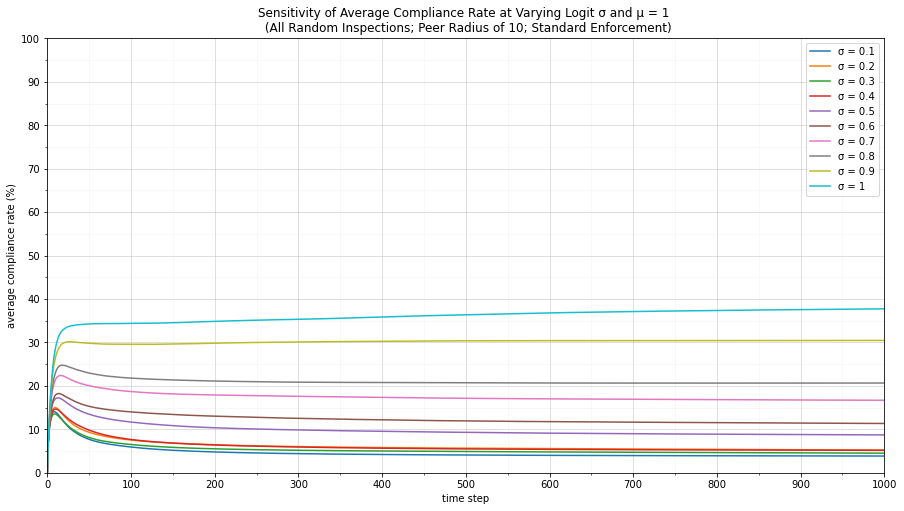

<Figure size 432x288 with 0 Axes>

In [170]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_1_step['step'], standard_logit_mu_10_1_step['avg-compliance-rate'], label="σ = 0.1")
plt.plot(standard_logit_mu_10_2_step['step'], standard_logit_mu_10_2_step['avg-compliance-rate'], label="σ = 0.2")
plt.plot(standard_logit_mu_10_3_step['step'], standard_logit_mu_10_3_step['avg-compliance-rate'], label="σ = 0.3")
plt.plot(standard_logit_mu_10_4_step['step'], standard_logit_mu_10_4_step['avg-compliance-rate'], label="σ = 0.4")
plt.plot(standard_logit_mu_10_5_step['step'], standard_logit_mu_10_5_step['avg-compliance-rate'], label="σ = 0.5")
plt.plot(standard_logit_mu_10_6_step['step'], standard_logit_mu_10_6_step['avg-compliance-rate'], label="σ = 0.6")
plt.plot(standard_logit_mu_10_7_step['step'], standard_logit_mu_10_7_step['avg-compliance-rate'], label="σ = 0.7")
plt.plot(standard_logit_mu_10_8_step['step'], standard_logit_mu_10_8_step['avg-compliance-rate'], label="σ = 0.8")
plt.plot(standard_logit_mu_10_9_step['step'], standard_logit_mu_10_9_step['avg-compliance-rate'], label="σ = 0.9")
plt.plot(standard_logit_mu_10_10_step['step'], standard_logit_mu_10_10_step['avg-compliance-rate'], label="σ = 1")

plt.title("Sensitivity of Average Compliance Rate at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Avg Compliance Rate (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

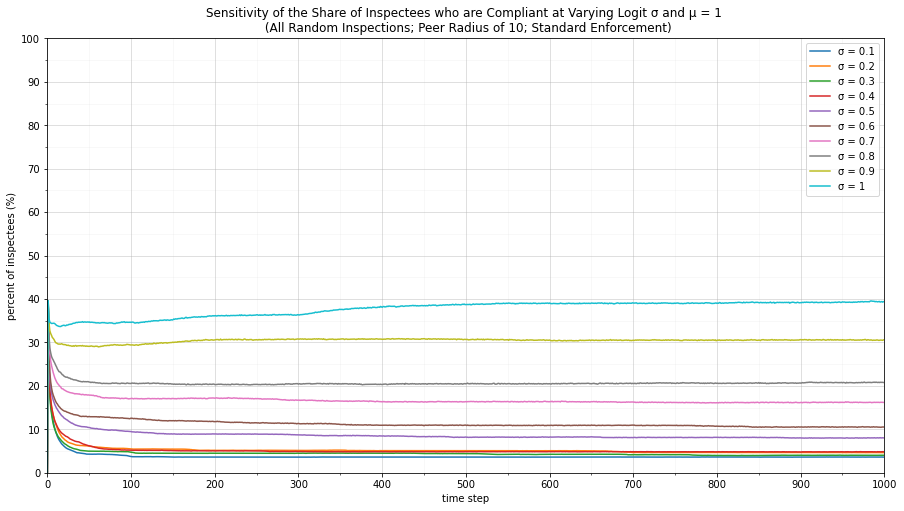

<Figure size 432x288 with 0 Axes>

In [169]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_1_step['step'], standard_logit_mu_10_1_step['perc-compliant'], label="σ = 0.1")
plt.plot(standard_logit_mu_10_2_step['step'], standard_logit_mu_10_2_step['perc-compliant'], label="σ = 0.2")
plt.plot(standard_logit_mu_10_3_step['step'], standard_logit_mu_10_3_step['perc-compliant'], label="σ = 0.3")
plt.plot(standard_logit_mu_10_4_step['step'], standard_logit_mu_10_4_step['perc-compliant'], label="σ = 0.4")
plt.plot(standard_logit_mu_10_5_step['step'], standard_logit_mu_10_5_step['perc-compliant'], label="σ = 0.5")
plt.plot(standard_logit_mu_10_6_step['step'], standard_logit_mu_10_6_step['perc-compliant'], label="σ = 0.6")
plt.plot(standard_logit_mu_10_7_step['step'], standard_logit_mu_10_7_step['perc-compliant'], label="σ = 0.7")
plt.plot(standard_logit_mu_10_8_step['step'], standard_logit_mu_10_8_step['perc-compliant'], label="σ = 0.8")
plt.plot(standard_logit_mu_10_9_step['step'], standard_logit_mu_10_9_step['perc-compliant'], label="σ = 0.9")
plt.plot(standard_logit_mu_10_10_step['step'], standard_logit_mu_10_10_step['perc-compliant'], label="σ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Compliant at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Compliant Rate (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

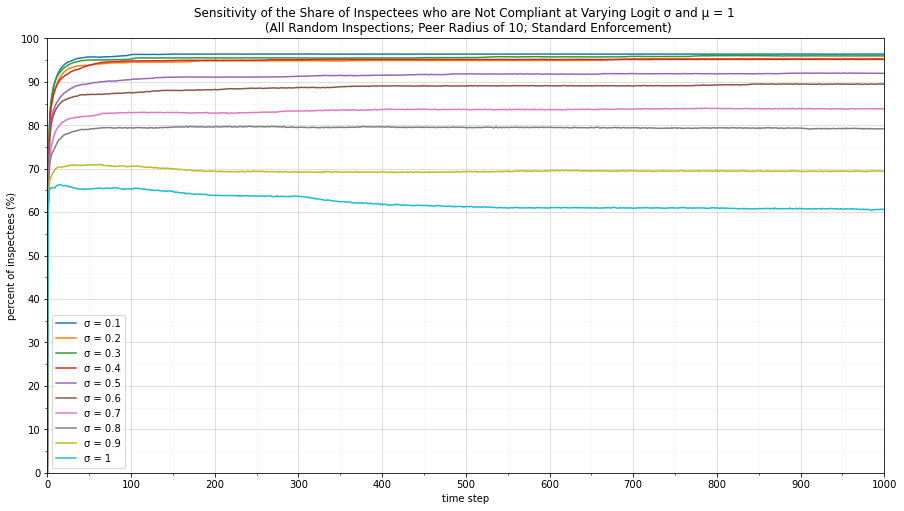

<Figure size 432x288 with 0 Axes>

In [116]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_1_step['step'], standard_logit_mu_10_1_step['perc-noncompliant'], label="σ = 0.1")
plt.plot(standard_logit_mu_10_2_step['step'], standard_logit_mu_10_2_step['perc-noncompliant'], label="σ = 0.2")
plt.plot(standard_logit_mu_10_3_step['step'], standard_logit_mu_10_3_step['perc-noncompliant'], label="σ = 0.3")
plt.plot(standard_logit_mu_10_4_step['step'], standard_logit_mu_10_4_step['perc-noncompliant'], label="σ = 0.4")
plt.plot(standard_logit_mu_10_5_step['step'], standard_logit_mu_10_5_step['perc-noncompliant'], label="σ = 0.5")
plt.plot(standard_logit_mu_10_6_step['step'], standard_logit_mu_10_6_step['perc-noncompliant'], label="σ = 0.6")
plt.plot(standard_logit_mu_10_7_step['step'], standard_logit_mu_10_7_step['perc-noncompliant'], label="σ = 0.7")
plt.plot(standard_logit_mu_10_8_step['step'], standard_logit_mu_10_8_step['perc-noncompliant'], label="σ = 0.8")
plt.plot(standard_logit_mu_10_9_step['step'], standard_logit_mu_10_9_step['perc-noncompliant'], label="σ = 0.9")
plt.plot(standard_logit_mu_10_10_step['step'], standard_logit_mu_10_10_step['perc-noncompliant'], label="σ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Not Compliant at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Not Compliant Rate (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

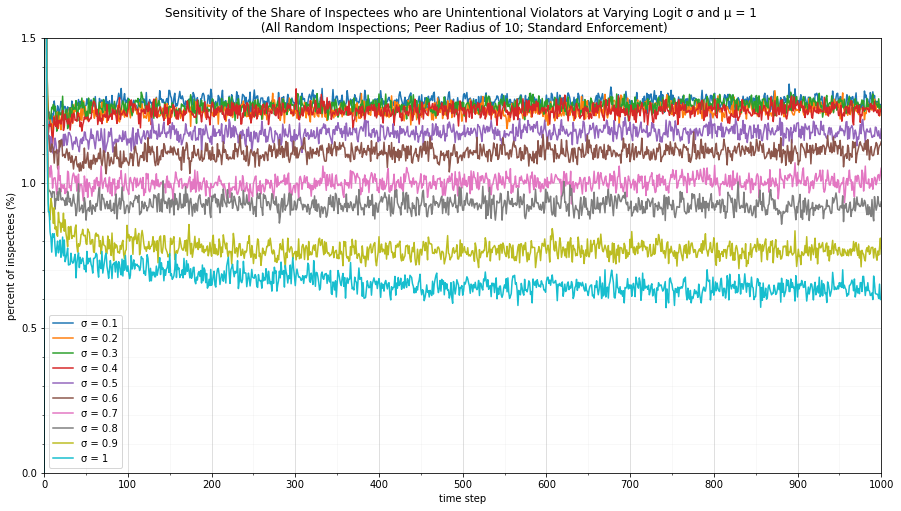

<Figure size 432x288 with 0 Axes>

In [118]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(standard_logit_mu_10_1_step['step'], standard_logit_mu_10_1_step['perc-unintentional'], label="σ = 0.1")
plt.plot(standard_logit_mu_10_2_step['step'], standard_logit_mu_10_2_step['perc-unintentional'], label="σ = 0.2")
plt.plot(standard_logit_mu_10_3_step['step'], standard_logit_mu_10_3_step['perc-unintentional'], label="σ = 0.3")
plt.plot(standard_logit_mu_10_4_step['step'], standard_logit_mu_10_4_step['perc-unintentional'], label="σ = 0.4")
plt.plot(standard_logit_mu_10_5_step['step'], standard_logit_mu_10_5_step['perc-unintentional'], label="σ = 0.5")
plt.plot(standard_logit_mu_10_6_step['step'], standard_logit_mu_10_6_step['perc-unintentional'], label="σ = 0.6")
plt.plot(standard_logit_mu_10_7_step['step'], standard_logit_mu_10_7_step['perc-unintentional'], label="σ = 0.7")
plt.plot(standard_logit_mu_10_8_step['step'], standard_logit_mu_10_8_step['perc-unintentional'], label="σ = 0.8")
plt.plot(standard_logit_mu_10_9_step['step'], standard_logit_mu_10_9_step['perc-unintentional'], label="σ = 0.9")
plt.plot(standard_logit_mu_10_10_step['step'], standard_logit_mu_10_10_step['perc-unintentional'], label="σ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Unintentional Violators at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1.501)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Unintentional (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

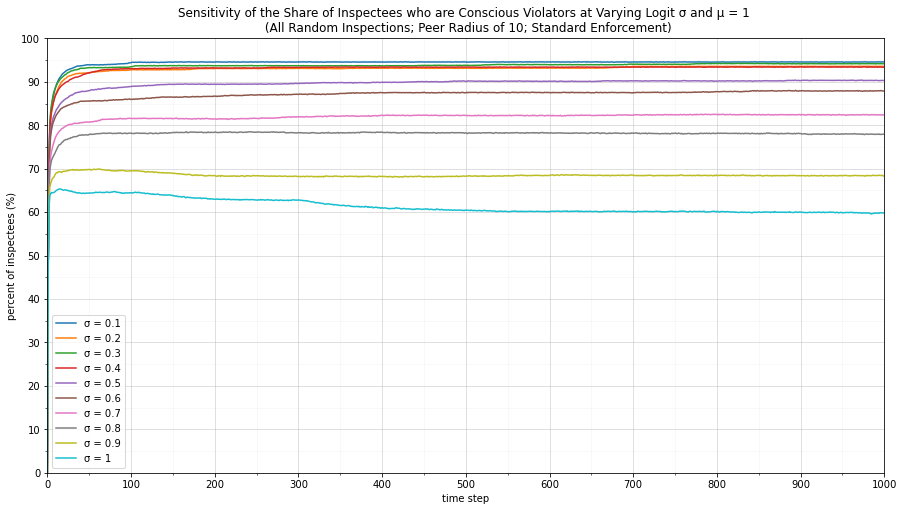

<Figure size 432x288 with 0 Axes>

In [119]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_1_step['step'], standard_logit_mu_10_1_step['perc-conscious'], label="σ = 0.1")
plt.plot(standard_logit_mu_10_2_step['step'], standard_logit_mu_10_2_step['perc-conscious'], label="σ = 0.2")
plt.plot(standard_logit_mu_10_3_step['step'], standard_logit_mu_10_3_step['perc-conscious'], label="σ = 0.3")
plt.plot(standard_logit_mu_10_4_step['step'], standard_logit_mu_10_4_step['perc-conscious'], label="σ = 0.4")
plt.plot(standard_logit_mu_10_5_step['step'], standard_logit_mu_10_5_step['perc-conscious'], label="σ = 0.5")
plt.plot(standard_logit_mu_10_6_step['step'], standard_logit_mu_10_6_step['perc-conscious'], label="σ = 0.6")
plt.plot(standard_logit_mu_10_7_step['step'], standard_logit_mu_10_7_step['perc-conscious'], label="σ = 0.7")
plt.plot(standard_logit_mu_10_8_step['step'], standard_logit_mu_10_8_step['perc-conscious'], label="σ = 0.8")
plt.plot(standard_logit_mu_10_9_step['step'], standard_logit_mu_10_9_step['perc-conscious'], label="σ = 0.9")
plt.plot(standard_logit_mu_10_10_step['step'], standard_logit_mu_10_10_step['perc-conscious'], label="σ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Conscious Violators at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Conscious (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

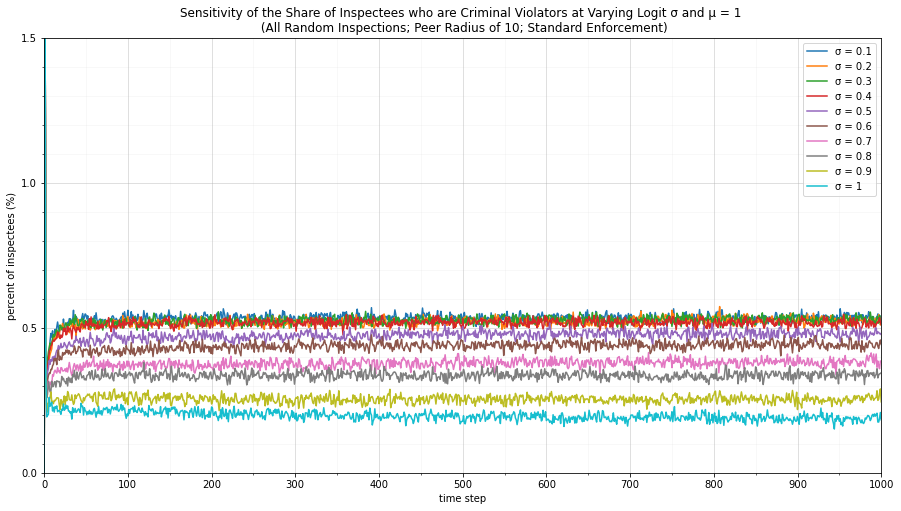

<Figure size 432x288 with 0 Axes>

In [120]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(standard_logit_mu_10_1_step['step'], standard_logit_mu_10_1_step['perc-criminal'], label="σ = 0.1")
plt.plot(standard_logit_mu_10_2_step['step'], standard_logit_mu_10_2_step['perc-criminal'], label="σ = 0.2")
plt.plot(standard_logit_mu_10_3_step['step'], standard_logit_mu_10_3_step['perc-criminal'], label="σ = 0.3")
plt.plot(standard_logit_mu_10_4_step['step'], standard_logit_mu_10_4_step['perc-criminal'], label="σ = 0.4")
plt.plot(standard_logit_mu_10_5_step['step'], standard_logit_mu_10_5_step['perc-criminal'], label="σ = 0.5")
plt.plot(standard_logit_mu_10_6_step['step'], standard_logit_mu_10_6_step['perc-criminal'], label="σ = 0.6")
plt.plot(standard_logit_mu_10_7_step['step'], standard_logit_mu_10_7_step['perc-criminal'], label="σ = 0.7")
plt.plot(standard_logit_mu_10_8_step['step'], standard_logit_mu_10_8_step['perc-criminal'], label="σ = 0.8")
plt.plot(standard_logit_mu_10_9_step['step'], standard_logit_mu_10_9_step['perc-criminal'], label="σ = 0.9")
plt.plot(standard_logit_mu_10_10_step['step'], standard_logit_mu_10_10_step['perc-criminal'], label="σ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Criminal Violators at Varying Logit σ and μ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1.501)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(.08, -.14) )
plt.show()
plt.savefig('Logit mu 1- Time vs Criminal (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

In [122]:
standard_logit_sigma_1_df = logit_standard_df.query('sigma==.1')
standard_logit_sigma_2_df = logit_standard_df.query('sigma==.2')
standard_logit_sigma_3_df = logit_standard_df.query('sigma==.3')
standard_logit_sigma_4_df = logit_standard_df.query('sigma==.4')
standard_logit_sigma_5_df = logit_standard_df.query('sigma==.5')
standard_logit_sigma_6_df = logit_standard_df.query('sigma==.6')
standard_logit_sigma_7_df = logit_standard_df.query('sigma==.7')
standard_logit_sigma_8_df = logit_standard_df.query('sigma==.8')
standard_logit_sigma_9_df = logit_standard_df.query('sigma==.9')
standard_logit_sigma_10_df = logit_standard_df.query('sigma==1')
standard_logit_sigma_5_df

run   mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
47265      51  0.0    0.5     0             0.000000                       0   
47279      51  0.0    0.5     1             6.397563                    3119   
47290      51  0.0    0.5     2            15.619447                    5145   
47303      51  0.0    0.5     3            24.724972                    5864   
47317      51  0.0    0.5     4            33.118600                    6287   
...       ...  ...    ...   ...                  ...                     ...   
1165890  1160  1.0    0.5   996             7.658641                     442   
1165902  1160  1.0    0.5   997             7.656535                     446   
1165914  1160  1.0    0.5   998             7.654646                     457   
1165927  1160  1.0    0.5   999             7.652576                     446   
1165939  1160  1.0    0.5  1000             7.650676                     431   

         #-unintentional-violators  #-conscious-violators  \
47265                            0                      0   
47279                          989                   3635   
47290                          190                   2523   
47303                           84                   1925   
47317                           38                   1549   
...                            ...                    ...   
1165890                         98                   7298   
1165902                        102                   7291   
1165914                        102                   7279   
1165927                         95                   7298   
1165939                         99                   7304   

         #-criminal-violators  perc-compliant  ...  perc-1   perc-12  \
47265                       0        0.000000  ...     0.0  0.342727   
47279                     133       39.601320  ...     0.0  0.342727   
47290                      19       65.316745  ...     0.0  0.342727   
47303                       5       74.435136  ...     0.0  0.342727   
47317                       4       79.804519  ...     0.0  0.342727   
...                       ...             ...  ...     ...       ...   
1165890                    40        5.610561  ...     0.0  0.000000   
1165902                    39        5.661335  ...     0.0  0.000000   
1165914                    40        5.800965  ...     0.0  0.000000   
1165927                    39        5.661335  ...     0.0  0.000000   
1165939                    44        5.470932  ...     0.0  0.000000   

          perc-23    perc-34    perc-45    perc-56    perc-67    perc-78  \
47265    4.353897  16.717441  28.966743  28.814420  16.438182   4.163493   
47279    4.353897  16.717441  28.966743  28.814420  16.438182   4.163493   
47290    4.353897  16.717441  28.966743  28.814420  16.438182   4.163493   
47303    4.353897  16.717441  28.966743  28.814420  16.438182   4.163493   
47317    4.353897  16.717441  28.966743  28.814420  16.438182   4.163493   
...           ...        ...        ...        ...        ...        ...   
1165890  0.012694   0.190404   2.005585   9.418634  26.783448  39.807058   
1165902  0.012694   0.190404   2.005585   9.418634  26.783448  39.807058   
1165914  0.012694   0.190404   2.005585   9.418634  26.783448  39.807058   
1165927  0.012694   0.190404   2.005585   9.418634  26.783448  39.807058   
1165939  0.012694   0.190404   2.005585   9.418634  26.783448  39.807058   

           perc-89   perc-91  
47265     0.203097  0.000000  
47279     0.203097  0.000000  
47290     0.203097  0.000000  
47303     0.203097  0.000000  
47317     0.203097  0.000000  
...            ...       ...  
1165890  20.804773  0.977405  
1165902  20.804773  0.977405  
1165914  20.804773  0.977405  
1165927  20.804773  0.977405  
1165939  20.804773  0.977405  

[110110 rows x 24 columns]

In [123]:
standard_logit_sigma_1_df['mu'] = (standard_logit_sigma_1_df['mu'] * 10).astype('int')
standard_logit_sigma_2_df['mu'] = (standard_logit_sigma_2_df['mu'] * 10).astype('int')
standard_logit_sigma_3_df['mu'] = (standard_logit_sigma_3_df['mu'] * 10).astype('int')
standard_logit_sigma_4_df['mu'] = (standard_logit_sigma_4_df['mu'] * 10).astype('int')
standard_logit_sigma_5_df['mu'] = (standard_logit_sigma_5_df['mu'] * 10).astype('int')
standard_logit_sigma_6_df['mu'] = (standard_logit_sigma_6_df['mu'] * 10).astype('int')
standard_logit_sigma_7_df['mu'] = (standard_logit_sigma_7_df['mu'] * 10).astype('int')
standard_logit_sigma_8_df['mu'] = (standard_logit_sigma_8_df['mu'] * 10).astype('int')
standard_logit_sigma_9_df['mu'] = (standard_logit_sigma_9_df['mu'] * 10).astype('int')
standard_logit_sigma_10_df['mu'] = (standard_logit_sigma_10_df['mu'] * 10).astype('int')
standard_logit_sigma_10_df

C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eunic\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

run  mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
95553     101   0    1.0     0             0.000000                       0   
95565     101   0    1.0     1             6.689515                    3119   
95577     101   0    1.0     2            16.406448                    5399   
95589     101   0    1.0     3            25.994330                    6067   
95601     101   0    1.0     4            35.046966                    6502   
...       ...  ..    ...   ...                  ...                     ...   
1211205  1210  10    1.0   996            30.280000                    2407   
1211206  1210  10    1.0   997            30.280324                    2412   
1211207  1210  10    1.0   998            30.280677                    2400   
1211208  1210  10    1.0   999            30.280594                    2392   
1211209  1210  10    1.0  1000            30.281016                    2381   

         #-unintentional-violators  #-conscious-violators  \
95553                            0                      0   
95565                          989                   3635   
95577                          178                   2280   
95589                           56                   1749   
95601                           30                   1345   
...                            ...                    ...   
1211205                         55                   5400   
1211206                         49                   5398   
1211207                         59                   5399   
1211208                         60                   5409   
1211209                         57                   5418   

         #-criminal-violators  perc-compliant  ...    perc-1   perc-12  \
95553                       0        0.000000  ...  1.548616  6.867225   
95565                     133       39.601320  ...  1.548616  6.867225   
95577                      21       68.532622  ...  1.548616  6.867225   
95589                       6       77.011932  ...  1.548616  6.867225   
95601                       1       82.533638  ...  1.548616  6.867225   
...                       ...             ...  ...       ...       ...   
1211205                    16       30.553440  ...  0.076161  0.672760   
1211206                    19       30.616908  ...  0.076161  0.672760   
1211207                    20       30.464585  ...  0.076161  0.672760   
1211208                    17       30.363036  ...  0.076161  0.672760   
1211209                    22       30.223407  ...  0.076161  0.672760   

           perc-23    perc-34    perc-45    perc-56    perc-67    perc-78  \
95553    11.589236  13.962935  16.146230  15.587713  14.699162  12.084285   
95565    11.589236  13.962935  16.146230  15.587713  14.699162  12.084285   
95577    11.589236  13.962935  16.146230  15.587713  14.699162  12.084285   
95589    11.589236  13.962935  16.146230  15.587713  14.699162  12.084285   
95601    11.589236  13.962935  16.146230  15.587713  14.699162  12.084285   
...            ...        ...        ...        ...        ...        ...   
1211205   2.411780   4.430058   7.539985  11.881188  16.780909  21.337903   
1211206   2.411780   4.430058   7.539985  11.881188  16.780909  21.337903   
1211207   2.411780   4.430058   7.539985  11.881188  16.780909  21.337903   
1211208   2.411780   4.430058   7.539985  11.881188  16.780909  21.337903   
1211209   2.411780   4.430058   7.539985  11.881188  16.780909  21.337903   

           perc-89    perc-91  
95553     6.130998   1.383600  
95565     6.130998   1.383600  
95577     6.130998   1.383600  
95589     6.130998   1.383600  
95601     6.130998   1.383600  
...            ...        ...  
1211205  23.368875  11.500381  
1211206  23.368875  11.500381  
1211207  23.368875  11.500381  
1211208  23.368875  11.500381  
1211209  23.368875  11.500381  

[110110 rows x 24 columns]

In [124]:
# Create new dataframes by compliant share value
for i, x in standard_logit_sigma_1_df.groupby('mu'):
    globals()['standard_logit_sigma_1_' + str(i)] = x
for i, x in standard_logit_sigma_2_df.groupby('mu'):
    globals()['standard_logit_sigma_2_' + str(i)] = x
for i, x in standard_logit_sigma_3_df.groupby('mu'):
    globals()['standard_logit_sigma_3_' + str(i)] = x
for i, x in standard_logit_sigma_4_df.groupby('mu'):
    globals()['standard_logit_sigma_4_' + str(i)] = x
for i, x in standard_logit_sigma_5_df.groupby('mu'):
    globals()['standard_logit_sigma_5_' + str(i)] = x
for i, x in standard_logit_sigma_6_df.groupby('mu'):
    globals()['standard_logit_sigma_6_' + str(i)] = x
for i, x in standard_logit_sigma_7_df.groupby('mu'):
    globals()['standard_logit_sigma_7_' + str(i)] = x
for i, x in standard_logit_sigma_8_df.groupby('mu'):
    globals()['standard_logit_sigma_8_' + str(i)] = x
for i, x in standard_logit_sigma_9_df.groupby('mu'):
    globals()['standard_logit_sigma_9_' + str(i)] = x
for i, x in standard_logit_sigma_10_df.groupby('mu'):
    globals()['standard_logit_sigma_10_' + str(i)] = x

standard_logit_sigma_10_2

run  mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
314512  321   2    1.0     0             0.000000                       0   
314523  321   2    1.0     1             6.207159                    3119   
314538  321   2    1.0     2            14.813404                    4784   
314548  321   2    1.0     3            23.531776                    5572   
314562  321   2    1.0     4            31.491707                    6039   
...     ...  ..    ...   ...                  ...                     ...   
335248  329   2    1.0   996            99.619910                    7878   
335259  329   2    1.0   997            99.620300                    7878   
335271  329   2    1.0   998            99.620702                    7878   
335282  329   2    1.0   999            99.621074                    7878   
335293  329   2    1.0  1000            99.621494                    7878   

        #-unintentional-violators  #-conscious-violators  \
314512                          0                      0   
314523                        989                   3635   
314538                        194                   2885   
314548                         73                   2227   
314562                         45                   1793   
...                           ...                    ...   
335248                          0                      0   
335259                          0                      0   
335271                          0                      0   
335282                          0                      0   
335293                          0                      0   

        #-criminal-violators  perc-compliant  ...    perc-1   perc-12  \
314512                     0        0.000000  ...  0.761615  5.585174   
314523                   133       39.601320  ...  0.761615  5.585174   
314538                    15       60.726073  ...  0.761615  5.585174   
314548                     6       70.728611  ...  0.761615  5.585174   
314562                     1       76.656512  ...  0.761615  5.585174   
...                      ...             ...  ...       ...       ...   
335248                     0      100.000000  ...  0.723534  4.696624   
335259                     0      100.000000  ...  0.723534  4.696624   
335271                     0      100.000000  ...  0.723534  4.696624   
335282                     0      100.000000  ...  0.723534  4.696624   
335293                     0      100.000000  ...  0.723534  4.696624   

         perc-23    perc-34    perc-45    perc-56    perc-67    perc-78  \
314512  9.050520  11.868495  14.699162  16.450876  15.866971  13.950241   
314523  9.050520  11.868495  14.699162  16.450876  15.866971  13.950241   
314538  9.050520  11.868495  14.699162  16.450876  15.866971  13.950241   
314548  9.050520  11.868495  14.699162  16.450876  15.866971  13.950241   
314562  9.050520  11.868495  14.699162  16.450876  15.866971  13.950241   
...          ...        ...        ...        ...        ...        ...   
335248  9.202843  12.071592  15.511551  16.095456  15.816197  14.254887   
335259  9.202843  12.071592  15.511551  16.095456  15.816197  14.254887   
335271  9.202843  12.071592  15.511551  16.095456  15.816197  14.254887   
335282  9.202843  12.071592  15.511551  16.095456  15.816197  14.254887   
335293  9.202843  12.071592  15.511551  16.095456  15.816197  14.254887   

         perc-89   perc-91  
314512  9.393247  2.373699  
314523  9.393247  2.373699  
314538  9.393247  2.373699  
314548  9.393247  2.373699  
314562  9.393247  2.373699  
...          ...       ...  
335248  9.418634  2.208682  
335259  9.418634  2.208682  
335271  9.418634  2.208682  
335282  9.418634  2.208682  
335293  9.418634  2.208682  

[10010 rows x 24 columns]

In [127]:
standard_logit_sigma_5_1_step = standard_logit_sigma_5_1.groupby(['step'], as_index=False).mean()
standard_logit_sigma_5_2_step = standard_logit_sigma_5_2.groupby(['step'], as_index=False).mean()
standard_logit_sigma_5_3_step = standard_logit_sigma_5_3.groupby(['step'], as_index=False).mean()
standard_logit_sigma_5_4_step = standard_logit_sigma_5_4.groupby(['step'], as_index=False).mean()
standard_logit_sigma_5_5_step = standard_logit_sigma_5_5.groupby(['step'], as_index=False).mean()
standard_logit_sigma_5_6_step = standard_logit_sigma_5_6.groupby(['step'], as_index=False).mean()
standard_logit_sigma_5_7_step = standard_logit_sigma_5_7.groupby(['step'], as_index=False).mean()
standard_logit_sigma_5_8_step = standard_logit_sigma_5_8.groupby(['step'], as_index=False).mean()
standard_logit_sigma_5_9_step = standard_logit_sigma_5_9.groupby(['step'], as_index=False).mean()
standard_logit_sigma_5_10_step = standard_logit_sigma_5_10.groupby(['step'], as_index=False).mean()

standard_logit_sigma_5_1_step

step    run  mu  sigma  avg-compliance-rate  #-compliant-inspectees  \
0        0  165.5   1    0.5             0.000000                     0.0   
1        1  165.5   1    0.5             6.637471                  3119.0   
2        2  165.5   1    0.5            15.045062                  4694.4   
3        3  165.5   1    0.5            23.353643                  5388.4   
4        4  165.5   1    0.5            30.912668                  5770.3   
...    ...    ...  ..    ...                  ...                     ...   
996    996  165.5   1    0.5            99.660152                  7878.0   
997    997  165.5   1    0.5            99.660484                  7878.0   
998    998  165.5   1    0.5            99.660824                  7878.0   
999    999  165.5   1    0.5            99.661156                  7878.0   
1000  1000  165.5   1    0.5            99.661496                  7878.0   

      #-unintentional-violators  #-conscious-violators  #-criminal-violators  \
0                           0.0                    0.0                   0.0   
1                         989.0                 3635.0                 133.0   
2                         227.6                 2934.9                  20.7   
3                          76.7                 2406.7                   6.1   
4                          48.1                 2056.4                   3.2   
...                         ...                    ...                   ...   
996                         0.0                    0.0                   0.0   
997                         0.0                    0.0                   0.0   
998                         0.0                    0.0                   0.0   
999                         0.0                    0.0                   0.0   
1000                        0.0                    0.0                   0.0   

      perc-compliant  ...  perc-1   perc-12   perc-23    perc-34    perc-45  \
0           0.000000  ...     0.0  0.153592  2.646611  12.652958  26.548616   
1          39.601320  ...     0.0  0.153592  2.646611  12.652958  26.548616   
2          59.591905  ...     0.0  0.153592  2.646611  12.652958  26.548616   
3          68.399025  ...     0.0  0.153592  2.646611  12.652958  26.548616   
4          73.245748  ...     0.0  0.153592  2.646611  12.652958  26.548616   
...              ...  ...     ...       ...       ...        ...        ...   
996       100.000000  ...     0.0  0.153592  2.646611  12.652958  26.548616   
997       100.000000  ...     0.0  0.153592  2.646611  12.652958  26.548616   
998       100.000000  ...     0.0  0.153592  2.646611  12.652958  26.548616   
999       100.000000  ...     0.0  0.153592  2.646611  12.652958  26.548616   
1000      100.000000  ...     0.0  0.153592  2.646611  12.652958  26.548616   

        perc-56    perc-67   perc-78   perc-89  perc-91  
0     30.974867  20.290683  6.207159  0.525514      0.0  
1     30.974867  20.290683  6.207159  0.525514      0.0  
2     30.974867  20.290683  6.207159  0.525514      0.0  
3     30.974867  20.290683  6.207159  0.525514      0.0  
4     30.974867  20.290683  6.207159  0.525514      0.0  
...         ...        ...       ...       ...      ...  
996   30.974867  20.290683  6.207159  0.525514      0.0  
997   30.974867  20.290683  6.207159  0.525514      0.0  
998   30.974867  20.290683  6.207159  0.525514      0.0  
999   30.974867  20.290683  6.207159  0.525514      0.0  
1000  30.974867  20.290683  6.207159  0.525514      0.0  

[1001 rows x 24 columns]

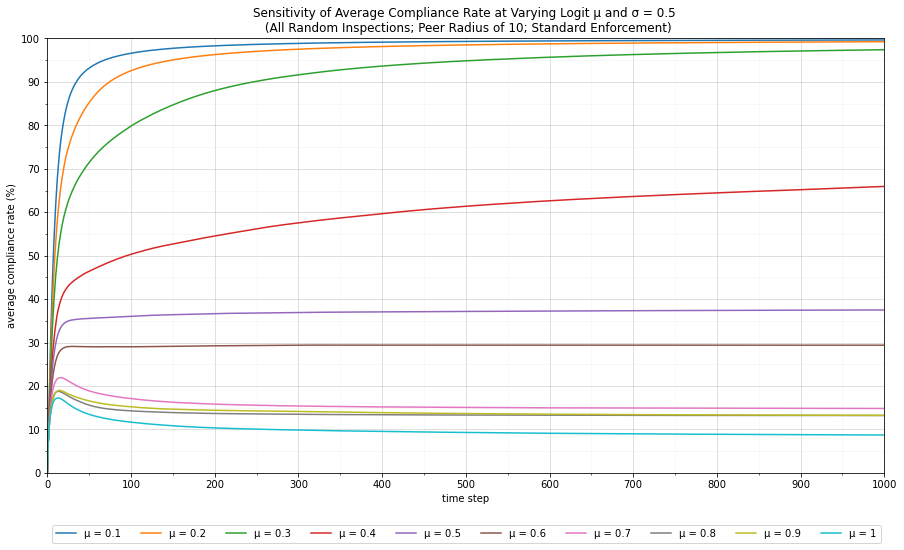

<Figure size 432x288 with 0 Axes>

In [136]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_1_step['step'], standard_logit_sigma_5_1_step['avg-compliance-rate'], label="μ = 0.1")
plt.plot(standard_logit_sigma_5_2_step['step'], standard_logit_sigma_5_2_step['avg-compliance-rate'], label="μ = 0.2")
plt.plot(standard_logit_sigma_5_3_step['step'], standard_logit_sigma_5_3_step['avg-compliance-rate'], label="μ = 0.3")
plt.plot(standard_logit_sigma_5_4_step['step'], standard_logit_sigma_5_4_step['avg-compliance-rate'], label="μ = 0.4")
plt.plot(standard_logit_sigma_5_5_step['step'], standard_logit_sigma_5_5_step['avg-compliance-rate'], label="μ = 0.5")
plt.plot(standard_logit_sigma_5_6_step['step'], standard_logit_sigma_5_6_step['avg-compliance-rate'], label="μ = 0.6")
plt.plot(standard_logit_sigma_5_7_step['step'], standard_logit_sigma_5_7_step['avg-compliance-rate'], label="μ = 0.7")
plt.plot(standard_logit_sigma_5_8_step['step'], standard_logit_sigma_5_8_step['avg-compliance-rate'], label="μ = 0.8")
plt.plot(standard_logit_sigma_5_9_step['step'], standard_logit_sigma_5_9_step['avg-compliance-rate'], label="μ = 0.9")
plt.plot(standard_logit_sigma_5_10_step['step'], standard_logit_sigma_5_10_step['avg-compliance-rate'], label="μ = 1")

plt.title("Sensitivity of Average Compliance Rate at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Avg Compliance Rate (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

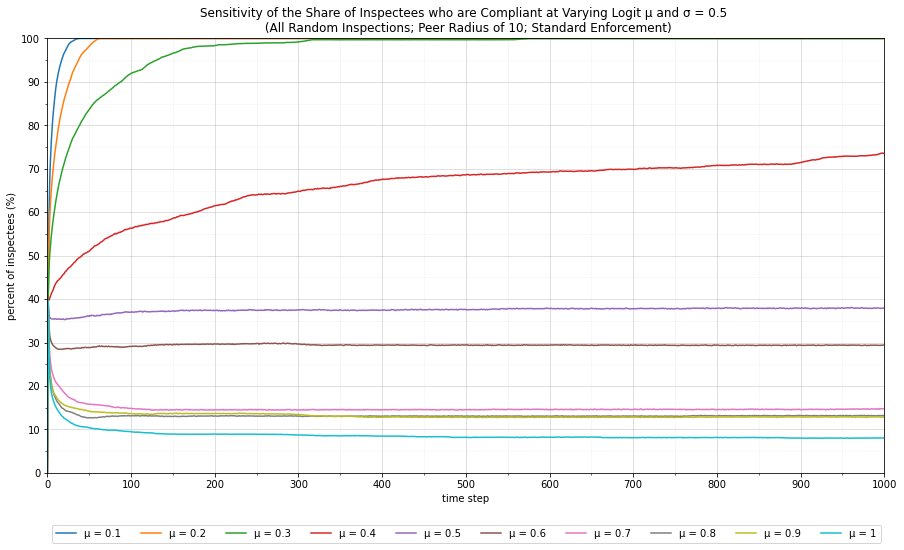

<Figure size 432x288 with 0 Axes>

In [137]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_1_step['step'], standard_logit_sigma_5_1_step['perc-compliant'], label="μ = 0.1")
plt.plot(standard_logit_sigma_5_2_step['step'], standard_logit_sigma_5_2_step['perc-compliant'], label="μ = 0.2")
plt.plot(standard_logit_sigma_5_3_step['step'], standard_logit_sigma_5_3_step['perc-compliant'], label="μ = 0.3")
plt.plot(standard_logit_sigma_5_4_step['step'], standard_logit_sigma_5_4_step['perc-compliant'], label="μ = 0.4")
plt.plot(standard_logit_sigma_5_5_step['step'], standard_logit_sigma_5_5_step['perc-compliant'], label="μ = 0.5")
plt.plot(standard_logit_sigma_5_6_step['step'], standard_logit_sigma_5_6_step['perc-compliant'], label="μ = 0.6")
plt.plot(standard_logit_sigma_5_7_step['step'], standard_logit_sigma_5_7_step['perc-compliant'], label="μ = 0.7")
plt.plot(standard_logit_sigma_5_8_step['step'], standard_logit_sigma_5_8_step['perc-compliant'], label="μ = 0.8")
plt.plot(standard_logit_sigma_5_9_step['step'], standard_logit_sigma_5_9_step['perc-compliant'], label="μ = 0.9")
plt.plot(standard_logit_sigma_5_10_step['step'], standard_logit_sigma_5_10_step['perc-compliant'], label="μ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Compliant at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Compliant (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

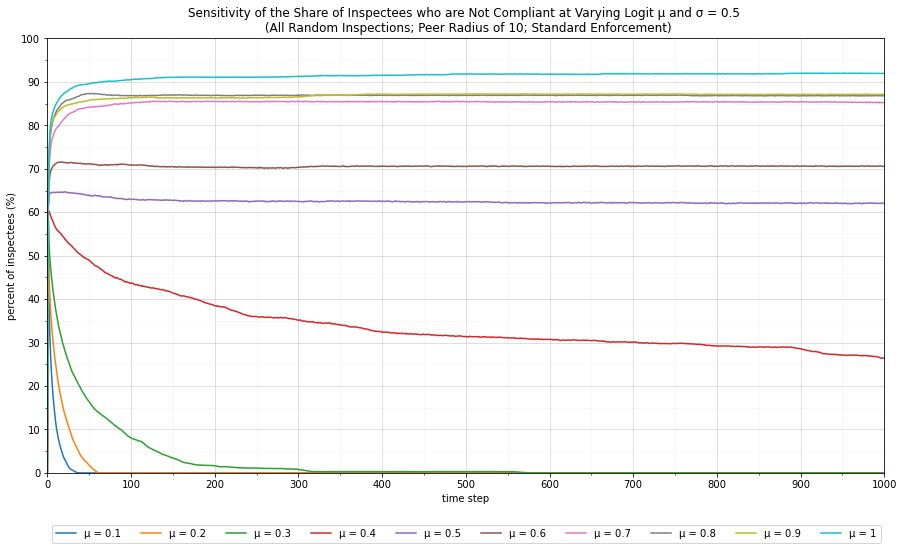

<Figure size 432x288 with 0 Axes>

In [138]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_1_step['step'], standard_logit_sigma_5_1_step['perc-noncompliant'], label="μ = 0.1")
plt.plot(standard_logit_sigma_5_2_step['step'], standard_logit_sigma_5_2_step['perc-noncompliant'], label="μ = 0.2")
plt.plot(standard_logit_sigma_5_3_step['step'], standard_logit_sigma_5_3_step['perc-noncompliant'], label="μ = 0.3")
plt.plot(standard_logit_sigma_5_4_step['step'], standard_logit_sigma_5_4_step['perc-noncompliant'], label="μ = 0.4")
plt.plot(standard_logit_sigma_5_5_step['step'], standard_logit_sigma_5_5_step['perc-noncompliant'], label="μ = 0.5")
plt.plot(standard_logit_sigma_5_6_step['step'], standard_logit_sigma_5_6_step['perc-noncompliant'], label="μ = 0.6")
plt.plot(standard_logit_sigma_5_7_step['step'], standard_logit_sigma_5_7_step['perc-noncompliant'], label="μ = 0.7")
plt.plot(standard_logit_sigma_5_8_step['step'], standard_logit_sigma_5_8_step['perc-noncompliant'], label="μ = 0.8")
plt.plot(standard_logit_sigma_5_9_step['step'], standard_logit_sigma_5_9_step['perc-noncompliant'], label="μ = 0.9")
plt.plot(standard_logit_sigma_5_10_step['step'], standard_logit_sigma_5_10_step['perc-noncompliant'], label="μ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Not Compliant at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Not Compliant (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

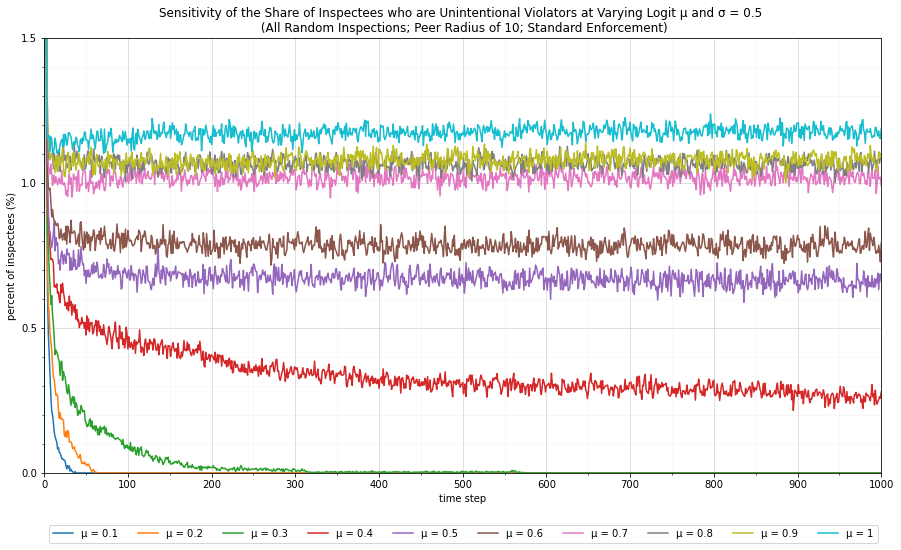

<Figure size 432x288 with 0 Axes>

In [140]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(standard_logit_sigma_5_1_step['step'], standard_logit_sigma_5_1_step['perc-unintentional'], label="μ = 0.1")
plt.plot(standard_logit_sigma_5_2_step['step'], standard_logit_sigma_5_2_step['perc-unintentional'], label="μ = 0.2")
plt.plot(standard_logit_sigma_5_3_step['step'], standard_logit_sigma_5_3_step['perc-unintentional'], label="μ = 0.3")
plt.plot(standard_logit_sigma_5_4_step['step'], standard_logit_sigma_5_4_step['perc-unintentional'], label="μ = 0.4")
plt.plot(standard_logit_sigma_5_5_step['step'], standard_logit_sigma_5_5_step['perc-unintentional'], label="μ = 0.5")
plt.plot(standard_logit_sigma_5_6_step['step'], standard_logit_sigma_5_6_step['perc-unintentional'], label="μ = 0.6")
plt.plot(standard_logit_sigma_5_7_step['step'], standard_logit_sigma_5_7_step['perc-unintentional'], label="μ = 0.7")
plt.plot(standard_logit_sigma_5_8_step['step'], standard_logit_sigma_5_8_step['perc-unintentional'], label="μ = 0.8")
plt.plot(standard_logit_sigma_5_9_step['step'], standard_logit_sigma_5_9_step['perc-unintentional'], label="μ = 0.9")
plt.plot(standard_logit_sigma_5_10_step['step'], standard_logit_sigma_5_10_step['perc-unintentional'], label="μ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Unintentional Violators at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1.501)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Unintentional (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

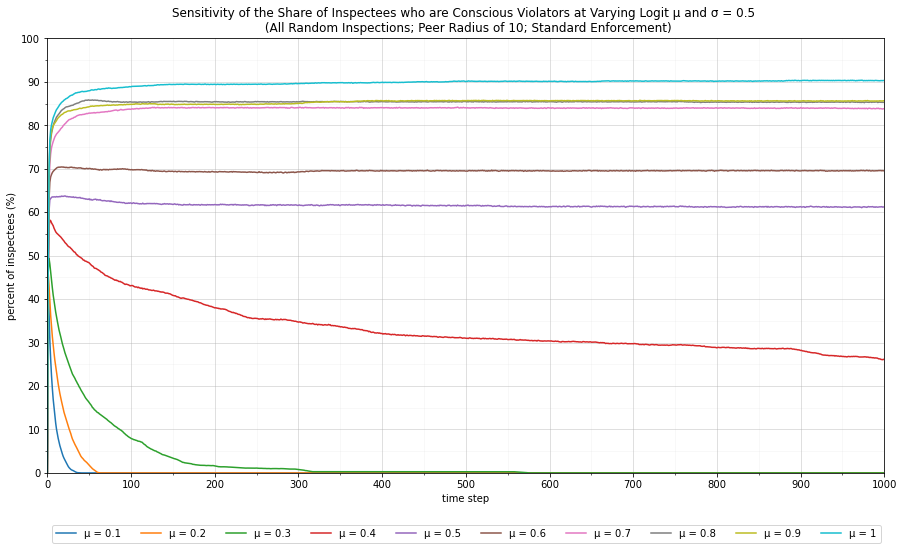

<Figure size 432x288 with 0 Axes>

In [141]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_1_step['step'], standard_logit_sigma_5_1_step['perc-conscious'], label="μ = 0.1")
plt.plot(standard_logit_sigma_5_2_step['step'], standard_logit_sigma_5_2_step['perc-conscious'], label="μ = 0.2")
plt.plot(standard_logit_sigma_5_3_step['step'], standard_logit_sigma_5_3_step['perc-conscious'], label="μ = 0.3")
plt.plot(standard_logit_sigma_5_4_step['step'], standard_logit_sigma_5_4_step['perc-conscious'], label="μ = 0.4")
plt.plot(standard_logit_sigma_5_5_step['step'], standard_logit_sigma_5_5_step['perc-conscious'], label="μ = 0.5")
plt.plot(standard_logit_sigma_5_6_step['step'], standard_logit_sigma_5_6_step['perc-conscious'], label="μ = 0.6")
plt.plot(standard_logit_sigma_5_7_step['step'], standard_logit_sigma_5_7_step['perc-conscious'], label="μ = 0.7")
plt.plot(standard_logit_sigma_5_8_step['step'], standard_logit_sigma_5_8_step['perc-conscious'], label="μ = 0.8")
plt.plot(standard_logit_sigma_5_9_step['step'], standard_logit_sigma_5_9_step['perc-conscious'], label="μ = 0.9")
plt.plot(standard_logit_sigma_5_10_step['step'], standard_logit_sigma_5_10_step['perc-conscious'], label="μ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Conscious Violators at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Conscious (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

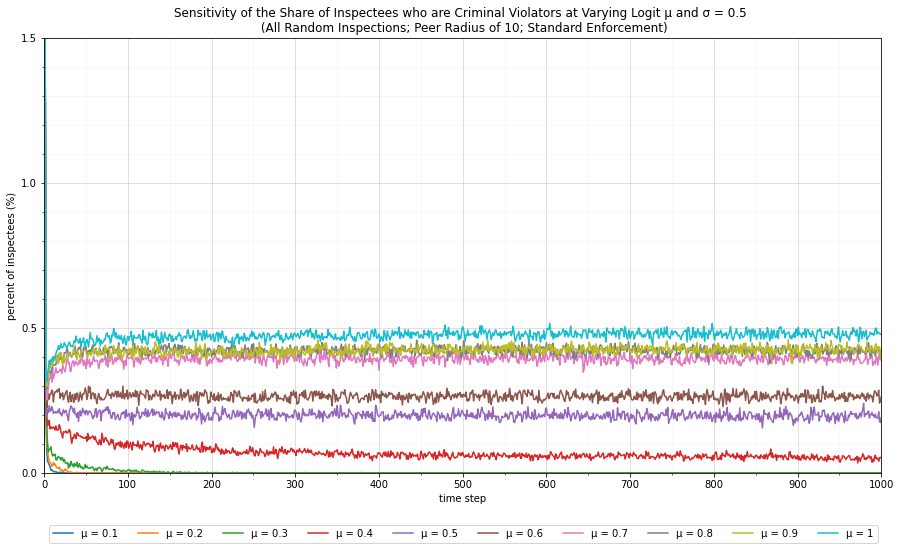

<Figure size 432x288 with 0 Axes>

In [142]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.501,.5))
ax.set_yticks(np.arange(0,1.501,.1), minor=True)

plt.plot(standard_logit_sigma_5_1_step['step'], standard_logit_sigma_5_1_step['perc-criminal'], label="μ = 0.1")
plt.plot(standard_logit_sigma_5_2_step['step'], standard_logit_sigma_5_2_step['perc-criminal'], label="μ = 0.2")
plt.plot(standard_logit_sigma_5_3_step['step'], standard_logit_sigma_5_3_step['perc-criminal'], label="μ = 0.3")
plt.plot(standard_logit_sigma_5_4_step['step'], standard_logit_sigma_5_4_step['perc-criminal'], label="μ = 0.4")
plt.plot(standard_logit_sigma_5_5_step['step'], standard_logit_sigma_5_5_step['perc-criminal'], label="μ = 0.5")
plt.plot(standard_logit_sigma_5_6_step['step'], standard_logit_sigma_5_6_step['perc-criminal'], label="μ = 0.6")
plt.plot(standard_logit_sigma_5_7_step['step'], standard_logit_sigma_5_7_step['perc-criminal'], label="μ = 0.7")
plt.plot(standard_logit_sigma_5_8_step['step'], standard_logit_sigma_5_8_step['perc-criminal'], label="μ = 0.8")
plt.plot(standard_logit_sigma_5_9_step['step'], standard_logit_sigma_5_9_step['perc-criminal'], label="μ = 0.9")
plt.plot(standard_logit_sigma_5_10_step['step'], standard_logit_sigma_5_10_step['perc-criminal'], label="μ = 1")

plt.title("Sensitivity of the Share of Inspectees who are Criminal Violators at Varying Logit μ and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1.501)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
plt.legend(loc="center left", ncol = len(ax.lines),bbox_to_anchor=(0, -.14) )
plt.show()
plt.savefig('Logit sigma 0.5- Time vs Criminal (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

## Group data by run and plot results by run

In [149]:
standard_logit_sigma_5_1

run  mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
155844  161   1    0.5     0             0.000000                       0   
155856  161   1    0.5     1             6.587966                    3119   
155868  161   1    0.5     2            15.943133                    5090   
155881  161   1    0.5     3            24.944994                    5870   
155893  161   1    0.5     4            33.191588                    6193   
...     ...  ..    ...   ...                  ...                     ...   
177210  170   1    0.5   996            99.535119                    7878   
177221  170   1    0.5   997            99.535567                    7878   
177232  170   1    0.5   998            99.536026                    7878   
177248  170   1    0.5   999            99.536506                    7878   
177258  170   1    0.5  1000            99.536957                    7878   

        #-unintentional-violators  #-conscious-violators  \
155844                          0                      0   
155856                        989                   3635   
155868                        232                   2537   
155881                         66                   1937   
155893                         33                   1648   
...                           ...                    ...   
177210                          0                      0   
177221                          0                      0   
177232                          0                      0   
177248                          0                      0   
177258                          0                      0   

        #-criminal-violators  perc-compliant  ...  perc-1   perc-12   perc-23  \
155844                     0        0.000000  ...     0.0  0.101549  2.792587   
155856                   133       39.601320  ...     0.0  0.101549  2.792587   
155868                    19       64.610307  ...     0.0  0.101549  2.792587   
155881                     5       74.511297  ...     0.0  0.101549  2.792587   
155893                     4       78.611323  ...     0.0  0.101549  2.792587   
...                      ...             ...  ...     ...       ...       ...   
177210                     0      100.000000  ...     0.0  0.203097  2.691038   
177221                     0      100.000000  ...     0.0  0.203097  2.691038   
177232                     0      100.000000  ...     0.0  0.203097  2.691038   
177248                     0      100.000000  ...     0.0  0.203097  2.691038   
177258                     0      100.000000  ...     0.0  0.203097  2.691038   

          perc-34    perc-45    perc-56    perc-67   perc-78   perc-89  \
155844  13.074384  26.719980  30.363036  20.601676  5.915207  0.431582   
155856  13.074384  26.719980  30.363036  20.601676  5.915207  0.431582   
155868  13.074384  26.719980  30.363036  20.601676  5.915207  0.431582   
155881  13.074384  26.719980  30.363036  20.601676  5.915207  0.431582   
155893  13.074384  26.719980  30.363036  20.601676  5.915207  0.431582   
...           ...        ...        ...        ...       ...       ...   
177210  12.820513  26.415334  31.315055  19.827367  6.194466  0.533130   
177221  12.820513  26.415334  31.315055  19.827367  6.194466  0.533130   
177232  12.820513  26.415334  31.315055  19.827367  6.194466  0.533130   
177248  12.820513  26.415334  31.315055  19.827367  6.194466  0.533130   
177258  12.820513  26.415334  31.315055  19.827367  6.194466  0.533130   

        perc-91  
155844      0.0  
155856      0.0  
155868      0.0  
155881      0.0  
155893      0.0  
...         ...  
177210      0.0  
177221      0.0  
177232      0.0  
177248      0.0  
177258      0.0  

[10010 rows x 24 columns]

In [156]:
# Create new dataframes by run_num
for i, x in standard_logit_sigma_5_1.groupby('run'):
    globals()['standard_logit_sigma_5_1_' + str(i)] = x
for i, x in standard_logit_sigma_5_2.groupby('run'):
    globals()['standard_logit_sigma_5_2_' + str(i)] = x
for i, x in standard_logit_sigma_5_3.groupby('run'):
    globals()['standard_logit_sigma_5_3_' + str(i)] = x
for i, x in standard_logit_sigma_5_4.groupby('run'):
    globals()['standard_logit_sigma_5_4_' + str(i)] = x
for i, x in standard_logit_sigma_5_5.groupby('run'):
    globals()['standard_logit_sigma_5_5_' + str(i)] = x
for i, x in standard_logit_sigma_5_6.groupby('run'):
    globals()['standard_logit_sigma_5_6_' + str(i)] = x
for i, x in standard_logit_sigma_5_7.groupby('run'):
    globals()['standard_logit_sigma_5_7_' + str(i)] = x
for i, x in standard_logit_sigma_5_8.groupby('run'):
    globals()['standard_logit_sigma_5_8_' + str(i)] = x
for i, x in standard_logit_sigma_5_9.groupby('run'):
    globals()['standard_logit_sigma_5_9_' + str(i)] = x
for i, x in standard_logit_sigma_5_10.groupby('run'):
    globals()['standard_logit_sigma_5_10_' + str(i)] = x

run  mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
264468  271   2    0.5     0             0.000000                       0   
264480  271   2    0.5     1             6.702209                    3119   
264492  271   2    0.5     2            14.489718                    4179   
264504  271   2    0.5     3            21.312516                    4644   
264516  271   2    0.5     4            27.782009                    4928   
...     ...  ..    ...   ...                  ...                     ...   
285219  280   2    0.5   996            99.597236                    7878   
285230  280   2    0.5   997            99.597632                    7878   
285242  280   2    0.5   998            99.598056                    7878   
285254  280   2    0.5   999            99.598442                    7878   
285266  280   2    0.5  1000            99.598858                    7878   

        #-unintentional-violators  #-conscious-violators  \
264468                          0                      0   
264480                        989                   3635   
264492                        237                   3444   
264504                         82                   3142   
264516                         59                   2882   
...                           ...                    ...   
285219                          0                      0   
285230                          0                      0   
285242                          0                      0   
285254                          0                      0   
285266                          0                      0   

        #-criminal-violators  perc-compliant  ...  perc-1   perc-12   perc-23  \
264468                     0        0.000000  ...     0.0  0.076161  1.853262   
264480                   133       39.601320  ...     0.0  0.076161  1.853262   
264492                    18       53.046458  ...     0.0  0.076161  1.853262   
264504                    10       58.948972  ...     0.0  0.076161  1.853262   
264516                     9       62.553948  ...     0.0  0.076161  1.853262   
...                      ...             ...  ...     ...       ...       ...   
285219                     0      100.000000  ...     0.0  0.076161  1.764407   
285230                     0      100.000000  ...     0.0  0.076161  1.764407   
285242                     0      100.000000  ...     0.0  0.076161  1.764407   
285254                     0      100.000000  ...     0.0  0.076161  1.764407   
285266                     0      100.000000  ...     0.0  0.076161  1.764407   

          perc-34    perc-45    perc-56    perc-67   perc-78   perc-89  \
264468  10.002539  22.442244  31.353135  24.511297  8.745875  1.015486   
264480  10.002539  22.442244  31.353135  24.511297  8.745875  1.015486   
264492  10.002539  22.442244  31.353135  24.511297  8.745875  1.015486   
264504  10.002539  22.442244  31.353135  24.511297  8.745875  1.015486   
264516  10.002539  22.442244  31.353135  24.511297  8.745875  1.015486   
...           ...        ...        ...        ...       ...       ...   
285219   9.774054  22.899213  31.530845  24.460523  8.618939  0.875857   
285230   9.774054  22.899213  31.530845  24.460523  8.618939  0.875857   
285242   9.774054  22.899213  31.530845  24.460523  8.618939  0.875857   
285254   9.774054  22.899213  31.530845  24.460523  8.618939  0.875857   
285266   9.774054  22.899213  31.530845  24.460523  8.618939  0.875857   

        perc-91  
264468      0.0  
264480      0.0  
264492      0.0  
264504      0.0  
264516      0.0  
...         ...  
285219      0.0  
285230      0.0  
285242      0.0  
285254      0.0  
285266      0.0  

[10010 rows x 24 columns]

### Vary Mu

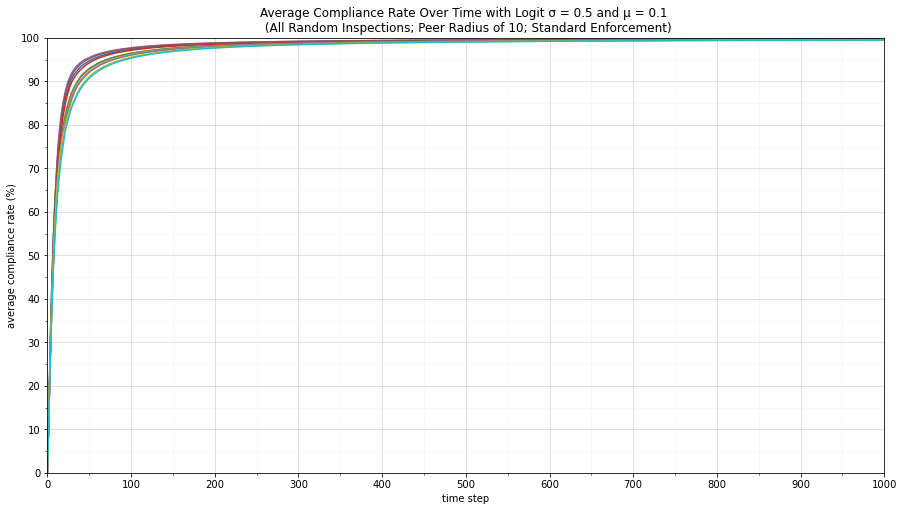

<Figure size 432x288 with 0 Axes>

In [153]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_1_161['step'],standard_logit_sigma_5_1_161['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_1_162['step'],standard_logit_sigma_5_1_162['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_1_163['step'],standard_logit_sigma_5_1_163['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_1_164['step'],standard_logit_sigma_5_1_164['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_1_165['step'],standard_logit_sigma_5_1_165['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_1_166['step'],standard_logit_sigma_5_1_166['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_1_167['step'],standard_logit_sigma_5_1_167['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_1_168['step'],standard_logit_sigma_5_1_168['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_1_169['step'],standard_logit_sigma_5_1_169['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_1_170['step'],standard_logit_sigma_5_1_170['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.1 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

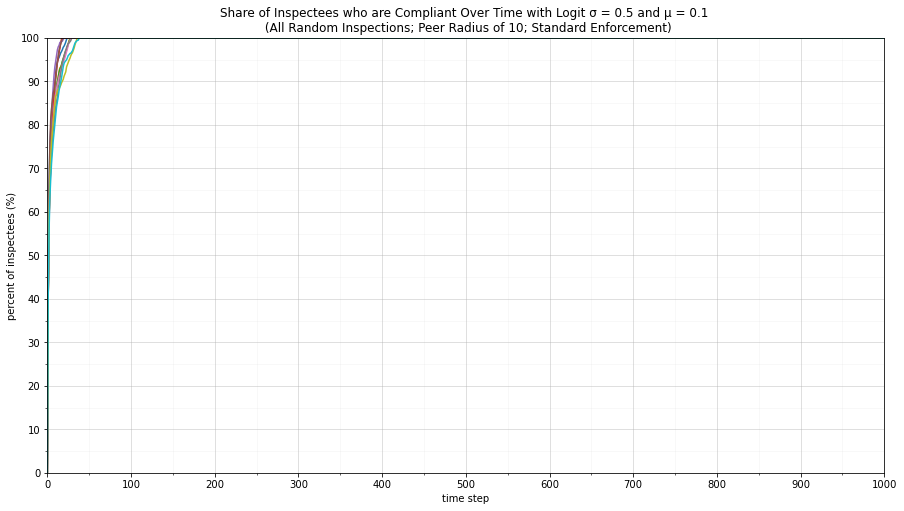

<Figure size 432x288 with 0 Axes>

In [220]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_1_161['step'],standard_logit_sigma_5_1_161['perc-compliant'])
plt.plot(standard_logit_sigma_5_1_162['step'],standard_logit_sigma_5_1_162['perc-compliant'])
plt.plot(standard_logit_sigma_5_1_163['step'],standard_logit_sigma_5_1_163['perc-compliant'])
plt.plot(standard_logit_sigma_5_1_164['step'],standard_logit_sigma_5_1_164['perc-compliant'])
plt.plot(standard_logit_sigma_5_1_165['step'],standard_logit_sigma_5_1_165['perc-compliant'])
plt.plot(standard_logit_sigma_5_1_166['step'],standard_logit_sigma_5_1_166['perc-compliant'])
plt.plot(standard_logit_sigma_5_1_167['step'],standard_logit_sigma_5_1_167['perc-compliant'])
plt.plot(standard_logit_sigma_5_1_168['step'],standard_logit_sigma_5_1_168['perc-compliant'])
plt.plot(standard_logit_sigma_5_1_169['step'],standard_logit_sigma_5_1_169['perc-compliant'])
plt.plot(standard_logit_sigma_5_1_170['step'],standard_logit_sigma_5_1_170['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.1 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

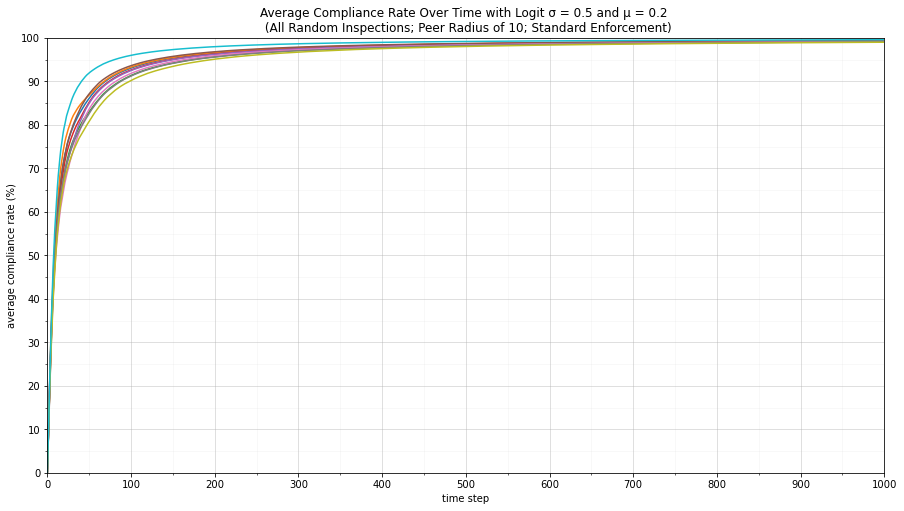

<Figure size 432x288 with 0 Axes>

In [157]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_2_271['step'],standard_logit_sigma_5_2_271['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_2_272['step'],standard_logit_sigma_5_2_272['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_2_273['step'],standard_logit_sigma_5_2_273['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_2_274['step'],standard_logit_sigma_5_2_274['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_2_275['step'],standard_logit_sigma_5_2_275['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_2_276['step'],standard_logit_sigma_5_2_276['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_2_277['step'],standard_logit_sigma_5_2_277['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_2_278['step'],standard_logit_sigma_5_2_278['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_2_279['step'],standard_logit_sigma_5_2_279['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_2_280['step'],standard_logit_sigma_5_2_280['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.2 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.2 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

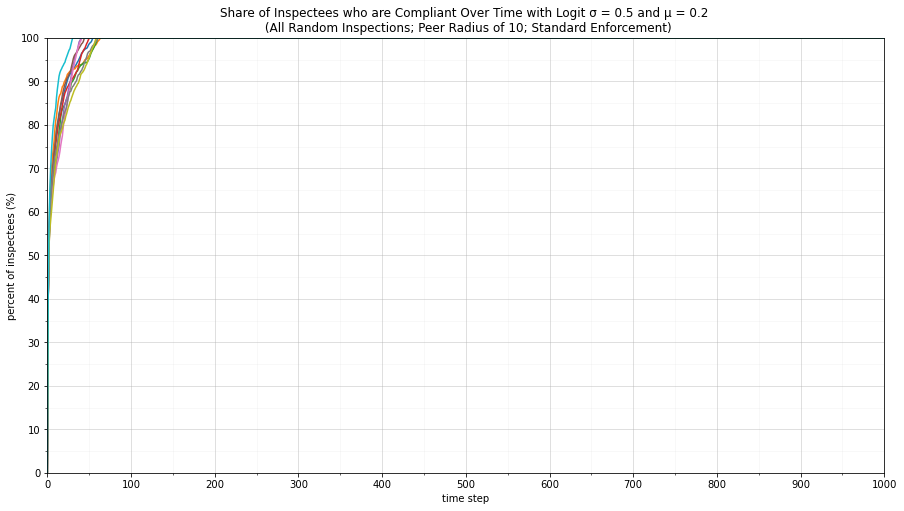

<Figure size 432x288 with 0 Axes>

In [222]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_2_271['step'],standard_logit_sigma_5_2_271['perc-compliant'])
plt.plot(standard_logit_sigma_5_2_272['step'],standard_logit_sigma_5_2_272['perc-compliant'])
plt.plot(standard_logit_sigma_5_2_273['step'],standard_logit_sigma_5_2_273['perc-compliant'])
plt.plot(standard_logit_sigma_5_2_274['step'],standard_logit_sigma_5_2_274['perc-compliant'])
plt.plot(standard_logit_sigma_5_2_275['step'],standard_logit_sigma_5_2_275['perc-compliant'])
plt.plot(standard_logit_sigma_5_2_276['step'],standard_logit_sigma_5_2_276['perc-compliant'])
plt.plot(standard_logit_sigma_5_2_277['step'],standard_logit_sigma_5_2_277['perc-compliant'])
plt.plot(standard_logit_sigma_5_2_278['step'],standard_logit_sigma_5_2_278['perc-compliant'])
plt.plot(standard_logit_sigma_5_2_279['step'],standard_logit_sigma_5_2_279['perc-compliant'])
plt.plot(standard_logit_sigma_5_2_280['step'],standard_logit_sigma_5_2_280['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.2 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.2 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

In [158]:
standard_logit_sigma_5_3

run  mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
375416  381   3    0.5     0             0.000000                       0   
375428  381   3    0.5     1             6.854532                    3119   
375439  381   3    0.5     2            13.442498                    3846   
375451  381   3    0.5     3            19.554455                    4131   
375463  381   3    0.5     4            25.140687                    4281   
...     ...  ..    ...   ...                  ...                     ...   
395341  390   3    0.5   996            93.317209                    7878   
395354  390   3    0.5   997            93.323808                    7878   
395367  390   3    0.5   998            93.330709                    7878   
395379  390   3    0.5   999            93.337106                    7878   
395391  390   3    0.5  1000            93.343685                    7878   

        #-unintentional-violators  #-conscious-violators  \
375416                          0                      0   
375428                        989                   3635   
375439                        240                   3772   
375451                        100                   3632   
375463                         66                   3521   
...                           ...                    ...   
395341                          0                      0   
395354                          0                      0   
395367                          0                      0   
395379                          0                      0   
395391                          0                      0   

        #-criminal-violators  perc-compliant  ...  perc-1   perc-12   perc-23  \
375416                     0        0.000000  ...     0.0  0.012694  1.117035   
375428                   133       39.601320  ...     0.0  0.012694  1.117035   
375439                    20       48.819497  ...     0.0  0.012694  1.117035   
375451                    15       52.437167  ...     0.0  0.012694  1.117035   
375463                    10       54.341203  ...     0.0  0.012694  1.117035   
...                      ...             ...  ...     ...       ...       ...   
395341                     0      100.000000  ...     0.0  0.038081  0.990099   
395354                     0      100.000000  ...     0.0  0.038081  0.990099   
395367                     0      100.000000  ...     0.0  0.038081  0.990099   
395379                     0      100.000000  ...     0.0  0.038081  0.990099   
395391                     0      100.000000  ...     0.0  0.038081  0.990099   

         perc-34    perc-45    perc-56    perc-67    perc-78   perc-89  \
375416  7.159177  19.497334  30.629601  27.659304  12.312770  1.612084   
375428  7.159177  19.497334  30.629601  27.659304  12.312770  1.612084   
375439  7.159177  19.497334  30.629601  27.659304  12.312770  1.612084   
375451  7.159177  19.497334  30.629601  27.659304  12.312770  1.612084   
375463  7.159177  19.497334  30.629601  27.659304  12.312770  1.612084   
...          ...        ...        ...        ...        ...       ...   
395341  6.752983  19.078446  31.416603  27.824321  12.401625  1.497842   
395354  6.752983  19.078446  31.416603  27.824321  12.401625  1.497842   
395367  6.752983  19.078446  31.416603  27.824321  12.401625  1.497842   
395379  6.752983  19.078446  31.416603  27.824321  12.401625  1.497842   
395391  6.752983  19.078446  31.416603  27.824321  12.401625  1.497842   

        perc-91  
375416      0.0  
375428      0.0  
375439      0.0  
375451      0.0  
375463      0.0  
...         ...  
395341      0.0  
395354      0.0  
395367      0.0  
395379      0.0  
395391      0.0  

[10010 rows x 24 columns]

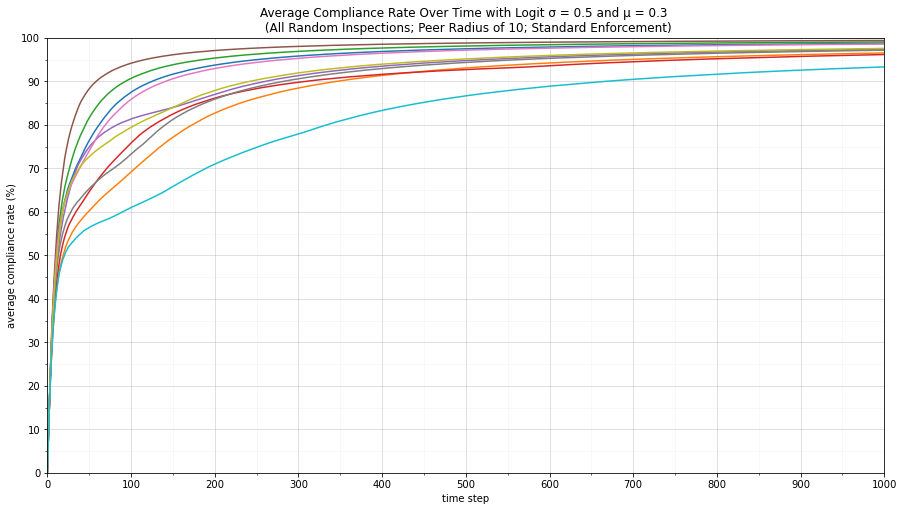

<Figure size 432x288 with 0 Axes>

In [159]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_3_381['step'],standard_logit_sigma_5_3_381['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_3_382['step'],standard_logit_sigma_5_3_382['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_3_383['step'],standard_logit_sigma_5_3_383['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_3_384['step'],standard_logit_sigma_5_3_384['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_3_385['step'],standard_logit_sigma_5_3_385['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_3_386['step'],standard_logit_sigma_5_3_386['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_3_387['step'],standard_logit_sigma_5_3_387['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_3_388['step'],standard_logit_sigma_5_3_388['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_3_389['step'],standard_logit_sigma_5_3_389['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_3_390['step'],standard_logit_sigma_5_3_390['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.3 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.3 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

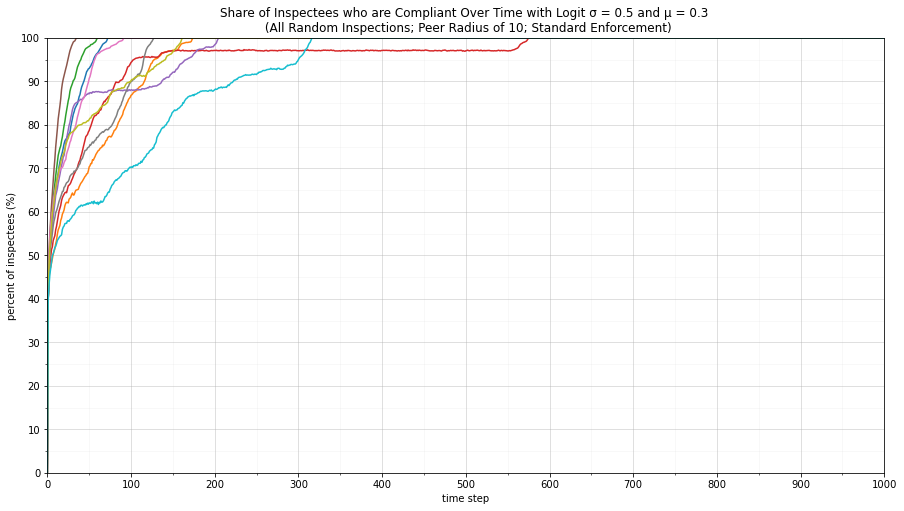

<Figure size 432x288 with 0 Axes>

In [223]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_3_381['step'],standard_logit_sigma_5_3_381['perc-compliant'])
plt.plot(standard_logit_sigma_5_3_382['step'],standard_logit_sigma_5_3_382['perc-compliant'])
plt.plot(standard_logit_sigma_5_3_383['step'],standard_logit_sigma_5_3_383['perc-compliant'])
plt.plot(standard_logit_sigma_5_3_384['step'],standard_logit_sigma_5_3_384['perc-compliant'])
plt.plot(standard_logit_sigma_5_3_385['step'],standard_logit_sigma_5_3_385['perc-compliant'])
plt.plot(standard_logit_sigma_5_3_386['step'],standard_logit_sigma_5_3_386['perc-compliant'])
plt.plot(standard_logit_sigma_5_3_387['step'],standard_logit_sigma_5_3_387['perc-compliant'])
plt.plot(standard_logit_sigma_5_3_388['step'],standard_logit_sigma_5_3_388['perc-compliant'])
plt.plot(standard_logit_sigma_5_3_389['step'],standard_logit_sigma_5_3_389['perc-compliant'])
plt.plot(standard_logit_sigma_5_3_390['step'],standard_logit_sigma_5_3_390['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.3 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.3 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

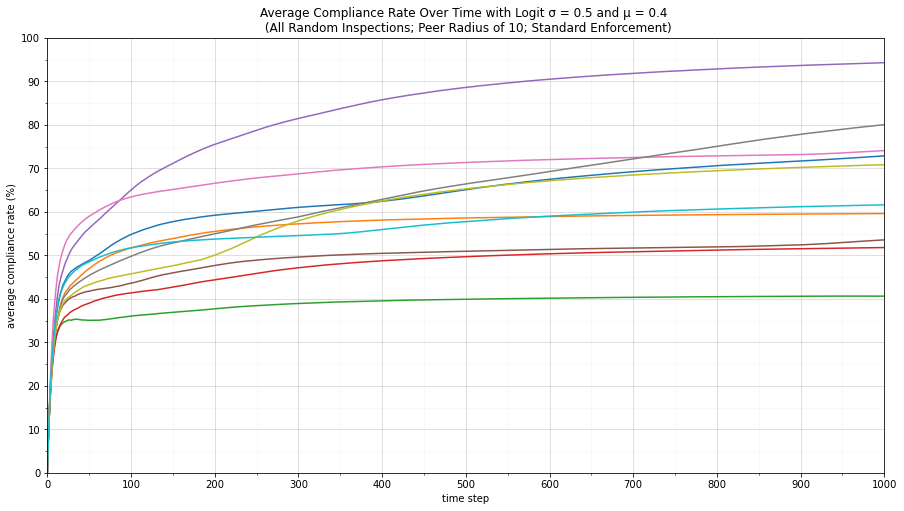

<Figure size 432x288 with 0 Axes>

In [160]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_4_491['step'],standard_logit_sigma_5_4_491['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_4_492['step'],standard_logit_sigma_5_4_492['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_4_493['step'],standard_logit_sigma_5_4_493['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_4_494['step'],standard_logit_sigma_5_4_494['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_4_495['step'],standard_logit_sigma_5_4_495['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_4_496['step'],standard_logit_sigma_5_4_496['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_4_497['step'],standard_logit_sigma_5_4_497['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_4_498['step'],standard_logit_sigma_5_4_498['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_4_499['step'],standard_logit_sigma_5_4_499['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_4_500['step'],standard_logit_sigma_5_4_500['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.4 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.4 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

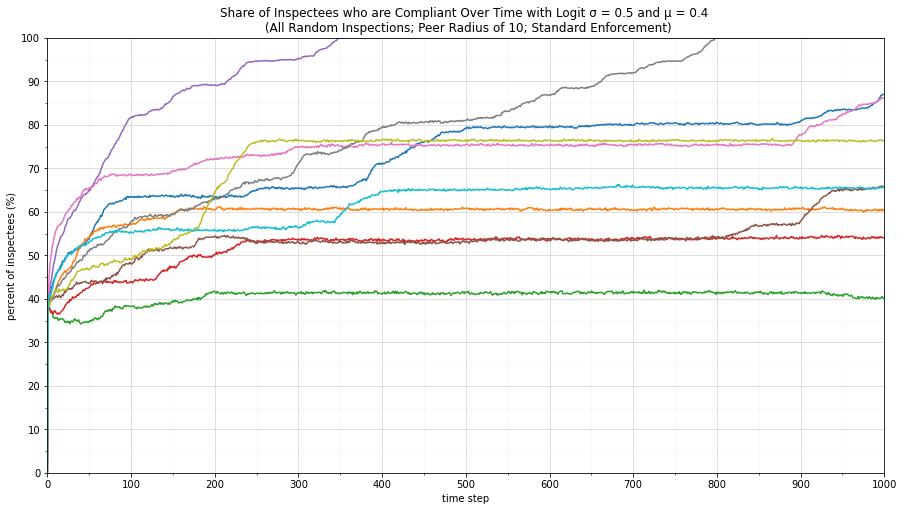

<Figure size 432x288 with 0 Axes>

In [224]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_4_491['step'],standard_logit_sigma_5_4_491['perc-compliant'])
plt.plot(standard_logit_sigma_5_4_492['step'],standard_logit_sigma_5_4_492['perc-compliant'])
plt.plot(standard_logit_sigma_5_4_493['step'],standard_logit_sigma_5_4_493['perc-compliant'])
plt.plot(standard_logit_sigma_5_4_494['step'],standard_logit_sigma_5_4_494['perc-compliant'])
plt.plot(standard_logit_sigma_5_4_495['step'],standard_logit_sigma_5_4_495['perc-compliant'])
plt.plot(standard_logit_sigma_5_4_496['step'],standard_logit_sigma_5_4_496['perc-compliant'])
plt.plot(standard_logit_sigma_5_4_497['step'],standard_logit_sigma_5_4_497['perc-compliant'])
plt.plot(standard_logit_sigma_5_4_498['step'],standard_logit_sigma_5_4_498['perc-compliant'])
plt.plot(standard_logit_sigma_5_4_499['step'],standard_logit_sigma_5_4_499['perc-compliant'])
plt.plot(standard_logit_sigma_5_4_500['step'],standard_logit_sigma_5_4_500['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.4 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.4 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

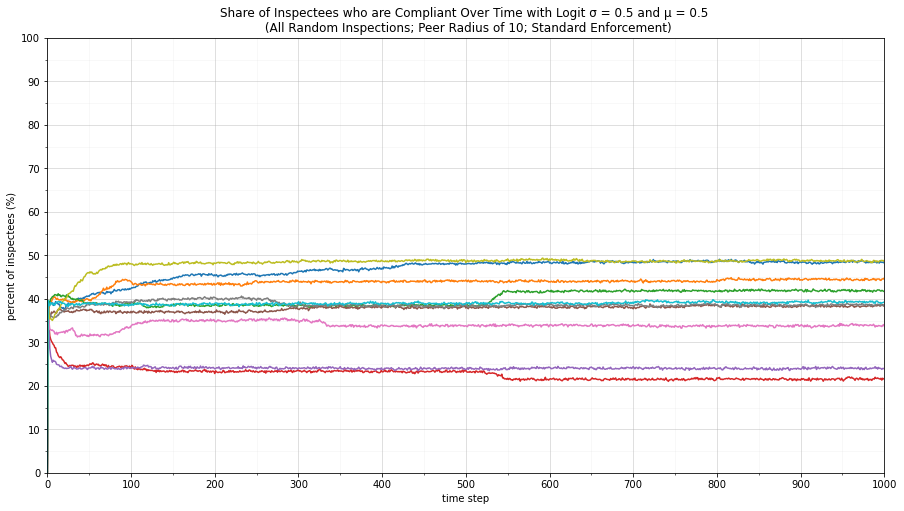

<Figure size 432x288 with 0 Axes>

In [225]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_5_601['step'],standard_logit_sigma_5_5_601['perc-compliant'])
plt.plot(standard_logit_sigma_5_5_602['step'],standard_logit_sigma_5_5_602['perc-compliant'])
plt.plot(standard_logit_sigma_5_5_603['step'],standard_logit_sigma_5_5_603['perc-compliant'])
plt.plot(standard_logit_sigma_5_5_604['step'],standard_logit_sigma_5_5_604['perc-compliant'])
plt.plot(standard_logit_sigma_5_5_605['step'],standard_logit_sigma_5_5_605['perc-compliant'])
plt.plot(standard_logit_sigma_5_5_606['step'],standard_logit_sigma_5_5_606['perc-compliant'])
plt.plot(standard_logit_sigma_5_5_607['step'],standard_logit_sigma_5_5_607['perc-compliant'])
plt.plot(standard_logit_sigma_5_5_608['step'],standard_logit_sigma_5_5_608['perc-compliant'])
plt.plot(standard_logit_sigma_5_5_609['step'],standard_logit_sigma_5_5_609['perc-compliant'])
plt.plot(standard_logit_sigma_5_5_610['step'],standard_logit_sigma_5_5_610['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.5 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

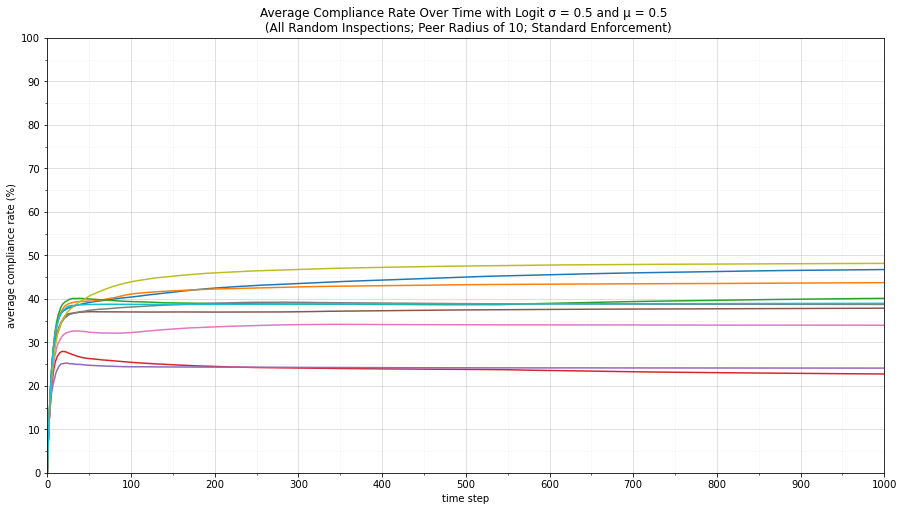

<Figure size 432x288 with 0 Axes>

In [161]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_5_601['step'],standard_logit_sigma_5_5_601['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_5_602['step'],standard_logit_sigma_5_5_602['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_5_603['step'],standard_logit_sigma_5_5_603['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_5_604['step'],standard_logit_sigma_5_5_604['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_5_605['step'],standard_logit_sigma_5_5_605['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_5_606['step'],standard_logit_sigma_5_5_606['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_5_607['step'],standard_logit_sigma_5_5_607['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_5_608['step'],standard_logit_sigma_5_5_608['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_5_609['step'],standard_logit_sigma_5_5_609['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_5_610['step'],standard_logit_sigma_5_5_610['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.5 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

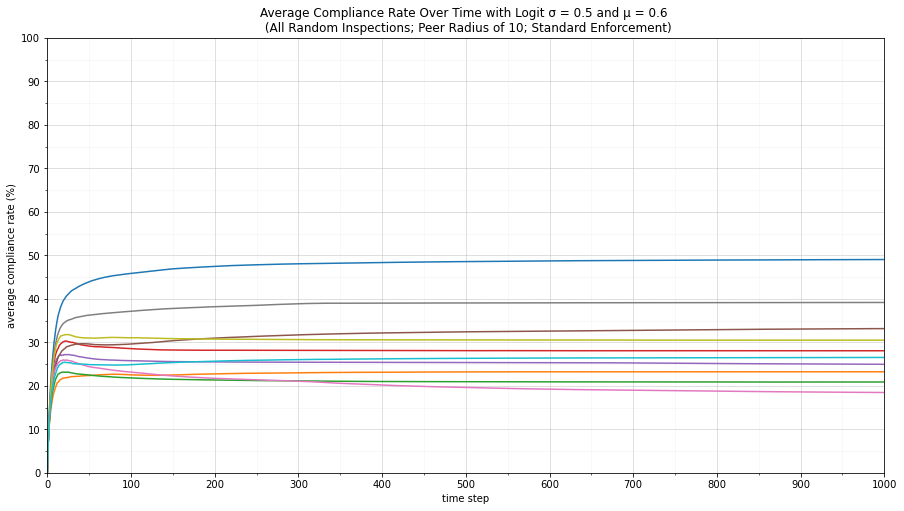

<Figure size 432x288 with 0 Axes>

In [162]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_6_711['step'],standard_logit_sigma_5_6_711['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_6_712['step'],standard_logit_sigma_5_6_712['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_6_713['step'],standard_logit_sigma_5_6_713['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_6_714['step'],standard_logit_sigma_5_6_714['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_6_715['step'],standard_logit_sigma_5_6_715['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_6_716['step'],standard_logit_sigma_5_6_716['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_6_717['step'],standard_logit_sigma_5_6_717['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_6_718['step'],standard_logit_sigma_5_6_718['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_6_719['step'],standard_logit_sigma_5_6_719['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_6_720['step'],standard_logit_sigma_5_6_720['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.6 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.6 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

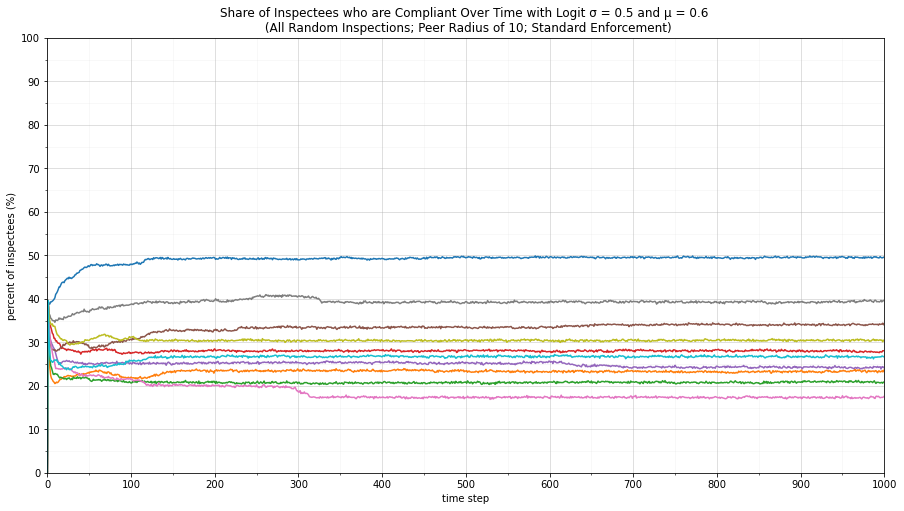

<Figure size 432x288 with 0 Axes>

In [226]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_6_711['step'],standard_logit_sigma_5_6_711['perc-compliant'])
plt.plot(standard_logit_sigma_5_6_712['step'],standard_logit_sigma_5_6_712['perc-compliant'])
plt.plot(standard_logit_sigma_5_6_713['step'],standard_logit_sigma_5_6_713['perc-compliant'])
plt.plot(standard_logit_sigma_5_6_714['step'],standard_logit_sigma_5_6_714['perc-compliant'])
plt.plot(standard_logit_sigma_5_6_715['step'],standard_logit_sigma_5_6_715['perc-compliant'])
plt.plot(standard_logit_sigma_5_6_716['step'],standard_logit_sigma_5_6_716['perc-compliant'])
plt.plot(standard_logit_sigma_5_6_717['step'],standard_logit_sigma_5_6_717['perc-compliant'])
plt.plot(standard_logit_sigma_5_6_718['step'],standard_logit_sigma_5_6_718['perc-compliant'])
plt.plot(standard_logit_sigma_5_6_719['step'],standard_logit_sigma_5_6_719['perc-compliant'])
plt.plot(standard_logit_sigma_5_6_720['step'],standard_logit_sigma_5_6_720['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.6 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.6 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

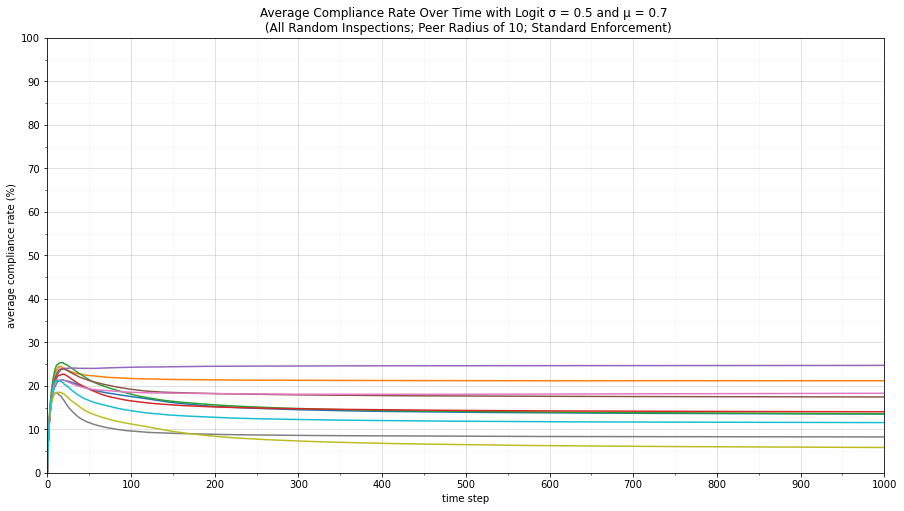

<Figure size 432x288 with 0 Axes>

In [163]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_7_821['step'],standard_logit_sigma_5_7_821['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_7_822['step'],standard_logit_sigma_5_7_822['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_7_823['step'],standard_logit_sigma_5_7_823['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_7_824['step'],standard_logit_sigma_5_7_824['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_7_825['step'],standard_logit_sigma_5_7_825['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_7_826['step'],standard_logit_sigma_5_7_826['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_7_827['step'],standard_logit_sigma_5_7_827['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_7_828['step'],standard_logit_sigma_5_7_828['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_7_829['step'],standard_logit_sigma_5_7_829['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_7_830['step'],standard_logit_sigma_5_7_830['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.7 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.7 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

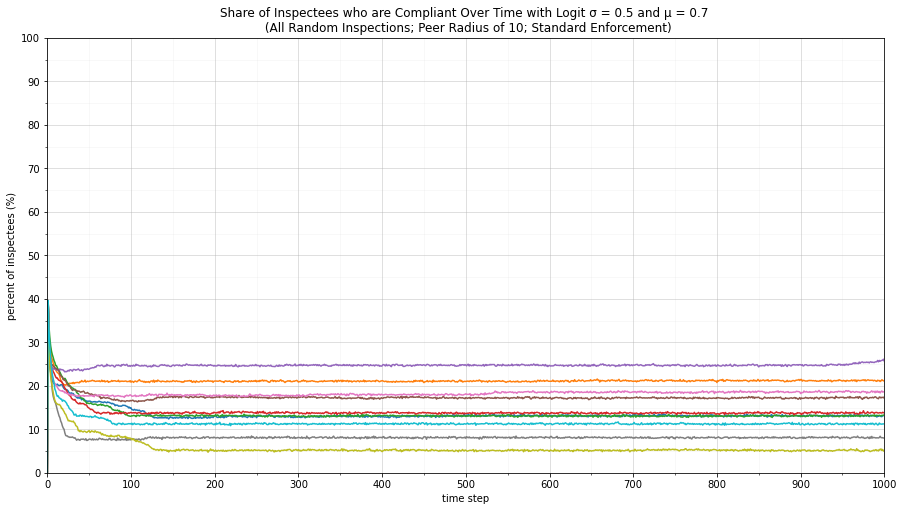

<Figure size 432x288 with 0 Axes>

In [232]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_7_821['step'],standard_logit_sigma_5_7_821['perc-compliant'])
plt.plot(standard_logit_sigma_5_7_822['step'],standard_logit_sigma_5_7_822['perc-compliant'])
plt.plot(standard_logit_sigma_5_7_823['step'],standard_logit_sigma_5_7_823['perc-compliant'])
plt.plot(standard_logit_sigma_5_7_824['step'],standard_logit_sigma_5_7_824['perc-compliant'])
plt.plot(standard_logit_sigma_5_7_825['step'],standard_logit_sigma_5_7_825['perc-compliant'])
plt.plot(standard_logit_sigma_5_7_826['step'],standard_logit_sigma_5_7_826['perc-compliant'])
plt.plot(standard_logit_sigma_5_7_827['step'],standard_logit_sigma_5_7_827['perc-compliant'])
plt.plot(standard_logit_sigma_5_7_828['step'],standard_logit_sigma_5_7_828['perc-compliant'])
plt.plot(standard_logit_sigma_5_7_829['step'],standard_logit_sigma_5_7_829['perc-compliant'])
plt.plot(standard_logit_sigma_5_7_830['step'],standard_logit_sigma_5_7_830['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.7 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.7 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

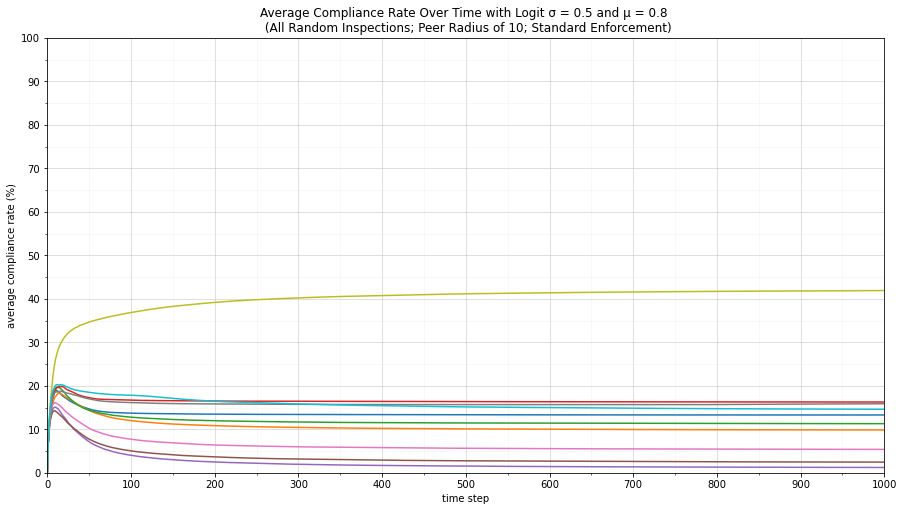

<Figure size 432x288 with 0 Axes>

In [164]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_8_931['step'],standard_logit_sigma_5_8_931['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_8_932['step'],standard_logit_sigma_5_8_932['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_8_933['step'],standard_logit_sigma_5_8_933['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_8_934['step'],standard_logit_sigma_5_8_934['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_8_935['step'],standard_logit_sigma_5_8_935['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_8_936['step'],standard_logit_sigma_5_8_936['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_8_937['step'],standard_logit_sigma_5_8_937['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_8_938['step'],standard_logit_sigma_5_8_938['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_8_939['step'],standard_logit_sigma_5_8_939['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_8_940['step'],standard_logit_sigma_5_8_940['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.8 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.8 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

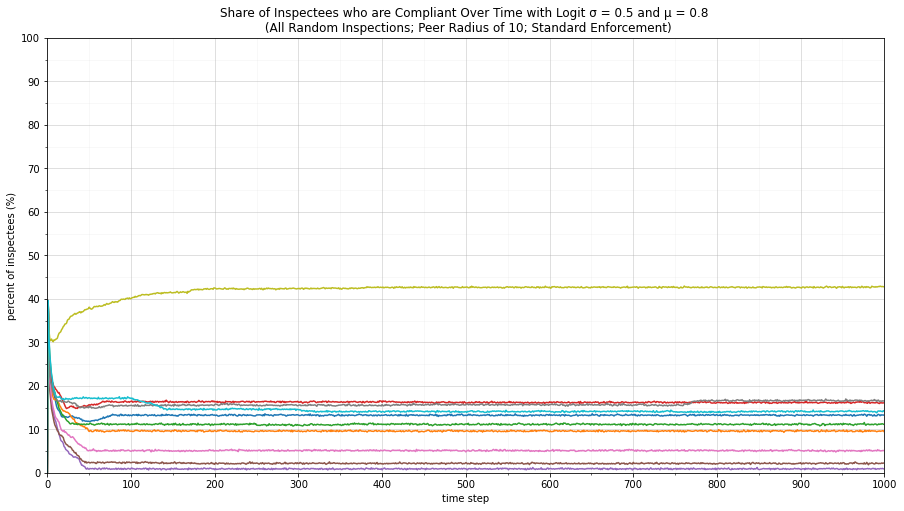

<Figure size 432x288 with 0 Axes>

In [230]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_8_931['step'],standard_logit_sigma_5_8_931['perc-compliant'])
plt.plot(standard_logit_sigma_5_8_932['step'],standard_logit_sigma_5_8_932['perc-compliant'])
plt.plot(standard_logit_sigma_5_8_933['step'],standard_logit_sigma_5_8_933['perc-compliant'])
plt.plot(standard_logit_sigma_5_8_934['step'],standard_logit_sigma_5_8_934['perc-compliant'])
plt.plot(standard_logit_sigma_5_8_935['step'],standard_logit_sigma_5_8_935['perc-compliant'])
plt.plot(standard_logit_sigma_5_8_936['step'],standard_logit_sigma_5_8_936['perc-compliant'])
plt.plot(standard_logit_sigma_5_8_937['step'],standard_logit_sigma_5_8_937['perc-compliant'])
plt.plot(standard_logit_sigma_5_8_938['step'],standard_logit_sigma_5_8_938['perc-compliant'])
plt.plot(standard_logit_sigma_5_8_939['step'],standard_logit_sigma_5_8_939['perc-compliant'])
plt.plot(standard_logit_sigma_5_8_940['step'],standard_logit_sigma_5_8_940['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.8 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.8 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

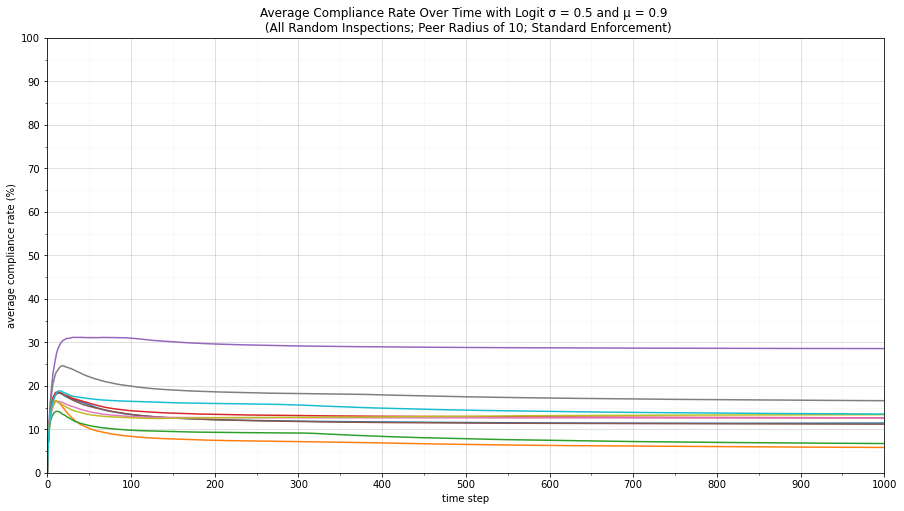

<Figure size 432x288 with 0 Axes>

In [165]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_9_1041['step'],standard_logit_sigma_5_9_1041['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_9_1042['step'],standard_logit_sigma_5_9_1042['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_9_1043['step'],standard_logit_sigma_5_9_1043['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_9_1044['step'],standard_logit_sigma_5_9_1044['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_9_1045['step'],standard_logit_sigma_5_9_1045['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_9_1046['step'],standard_logit_sigma_5_9_1046['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_9_1047['step'],standard_logit_sigma_5_9_1047['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_9_1048['step'],standard_logit_sigma_5_9_1048['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_9_1049['step'],standard_logit_sigma_5_9_1049['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_9_1050['step'],standard_logit_sigma_5_9_1050['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 0.9 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.9 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

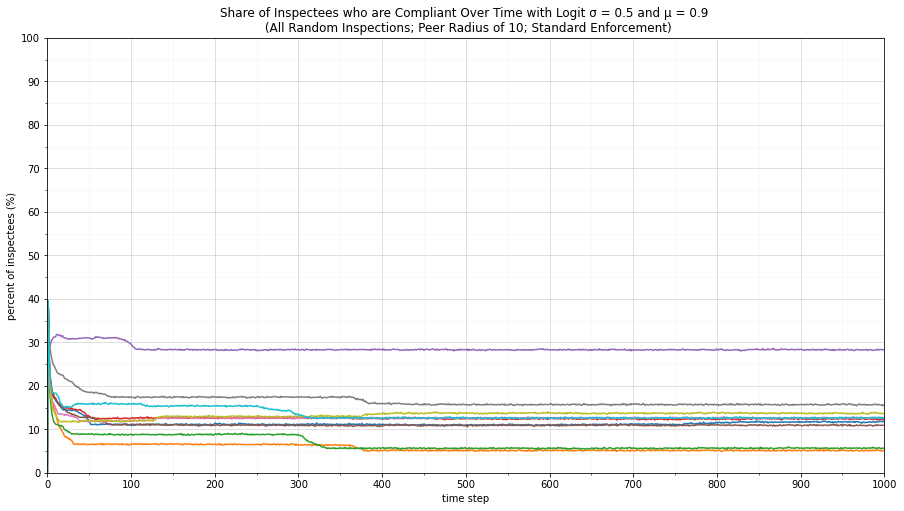

<Figure size 432x288 with 0 Axes>

In [228]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_9_1041['step'],standard_logit_sigma_5_9_1041['perc-compliant'])
plt.plot(standard_logit_sigma_5_9_1042['step'],standard_logit_sigma_5_9_1042['perc-compliant'])
plt.plot(standard_logit_sigma_5_9_1043['step'],standard_logit_sigma_5_9_1043['perc-compliant'])
plt.plot(standard_logit_sigma_5_9_1044['step'],standard_logit_sigma_5_9_1044['perc-compliant'])
plt.plot(standard_logit_sigma_5_9_1045['step'],standard_logit_sigma_5_9_1045['perc-compliant'])
plt.plot(standard_logit_sigma_5_9_1046['step'],standard_logit_sigma_5_9_1046['perc-compliant'])
plt.plot(standard_logit_sigma_5_9_1047['step'],standard_logit_sigma_5_9_1047['perc-compliant'])
plt.plot(standard_logit_sigma_5_9_1048['step'],standard_logit_sigma_5_9_1048['perc-compliant'])
plt.plot(standard_logit_sigma_5_9_1049['step'],standard_logit_sigma_5_9_1049['perc-compliant'])
plt.plot(standard_logit_sigma_5_9_1050['step'],standard_logit_sigma_5_9_1050['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 0.9 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=0.9 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

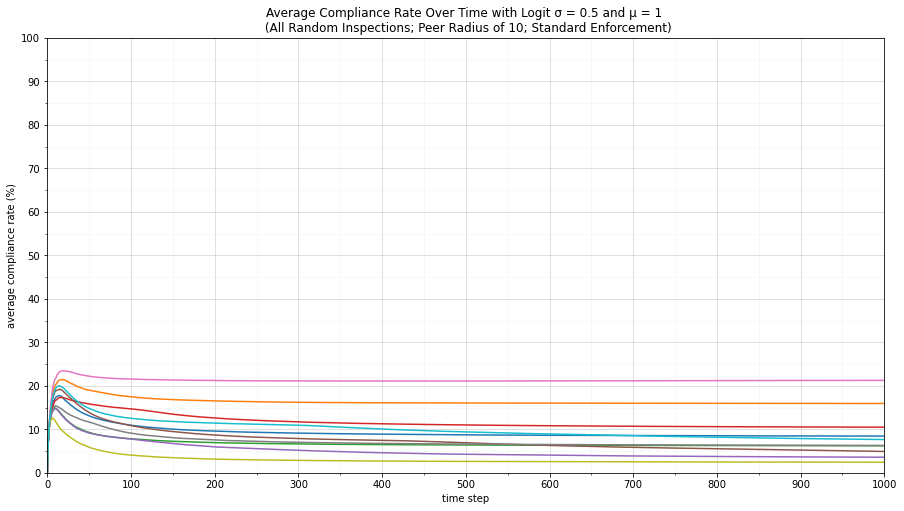

<Figure size 432x288 with 0 Axes>

In [166]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_10_1151['step'],standard_logit_sigma_5_10_1151['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_10_1152['step'],standard_logit_sigma_5_10_1152['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_10_1153['step'],standard_logit_sigma_5_10_1153['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_10_1154['step'],standard_logit_sigma_5_10_1154['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_10_1155['step'],standard_logit_sigma_5_10_1155['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_10_1156['step'],standard_logit_sigma_5_10_1156['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_10_1157['step'],standard_logit_sigma_5_10_1157['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_10_1158['step'],standard_logit_sigma_5_10_1158['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_10_1159['step'],standard_logit_sigma_5_10_1159['avg-compliance-rate'])
plt.plot(standard_logit_sigma_5_10_1160['step'],standard_logit_sigma_5_10_1160['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit σ = 0.5 and μ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=1 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

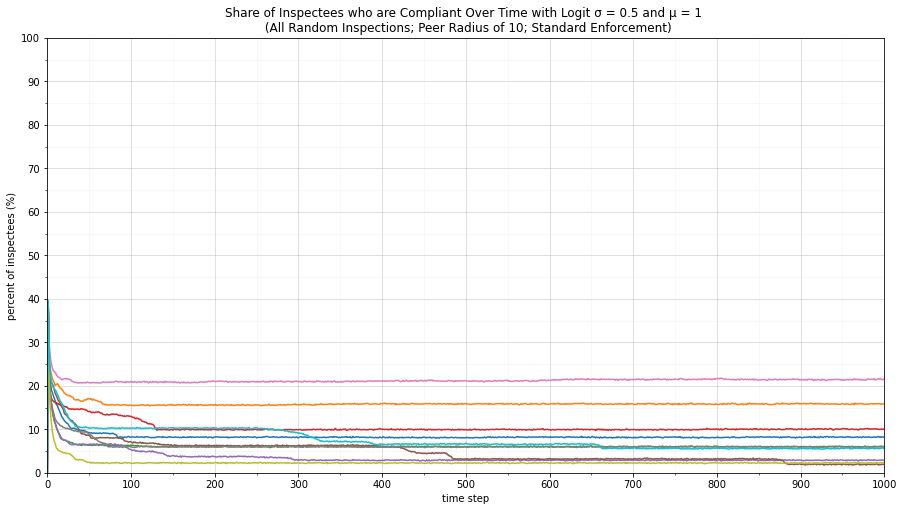

<Figure size 432x288 with 0 Axes>

In [229]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_sigma_5_10_1151['step'],standard_logit_sigma_5_10_1151['perc-compliant'])
plt.plot(standard_logit_sigma_5_10_1152['step'],standard_logit_sigma_5_10_1152['perc-compliant'])
plt.plot(standard_logit_sigma_5_10_1153['step'],standard_logit_sigma_5_10_1153['perc-compliant'])
plt.plot(standard_logit_sigma_5_10_1154['step'],standard_logit_sigma_5_10_1154['perc-compliant'])
plt.plot(standard_logit_sigma_5_10_1155['step'],standard_logit_sigma_5_10_1155['perc-compliant'])
plt.plot(standard_logit_sigma_5_10_1156['step'],standard_logit_sigma_5_10_1156['perc-compliant'])
plt.plot(standard_logit_sigma_5_10_1157['step'],standard_logit_sigma_5_10_1157['perc-compliant'])
plt.plot(standard_logit_sigma_5_10_1158['step'],standard_logit_sigma_5_10_1158['perc-compliant'])
plt.plot(standard_logit_sigma_5_10_1159['step'],standard_logit_sigma_5_10_1159['perc-compliant'])
plt.plot(standard_logit_sigma_5_10_1160['step'],standard_logit_sigma_5_10_1160['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit σ = 0.5 and μ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit sigma 0.5- Mu=1 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

### Vary Sigma

In [172]:
standard_logit_mu_10_2

run   mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
1114490  1121  1.0      2     0             0.000000                       0   
1114501  1121  1.0      2     1             6.473724                    3119   
1114513  1121  1.0      2     2             9.723280                    2032   
1114524  1121  1.0      2     3            11.862148                    1661   
1114535  1121  1.0      2     4            13.484810                    1533   
...       ...  ...    ...   ...                  ...                     ...   
1135823  1129  1.0      2   996            11.244379                     866   
1135836  1129  1.0      2   997            11.244044                     871   
1135847  1129  1.0      2   998            11.243810                     869   
1135858  1129  1.0      2   999            11.243634                     872   
1135870  1129  1.0      2  1000            11.243513                     869   

         #-unintentional-violators  #-conscious-violators  \
1114490                          0                      0   
1114501                        989                   3635   
1114513                        274                   5540   
1114524                        113                   6076   
1114535                        108                   6211   
...                            ...                    ...   
1135823                         92                   6883   
1135836                         86                   6881   
1135847                         86                   6881   
1135858                         86                   6880   
1135870                         84                   6887   

         #-criminal-violators  perc-compliant  ...  perc-1  perc-12  perc-23  \
1114490                     0        0.000000  ...     0.0      0.0      0.0   
1114501                   133       39.601320  ...     0.0      0.0      0.0   
1114513                    32       25.793349  ...     0.0      0.0      0.0   
1114524                    28       21.084031  ...     0.0      0.0      0.0   
1114535                    26       19.459254  ...     0.0      0.0      0.0   
...                       ...             ...  ...     ...      ...      ...   
1135823                    37       10.992638  ...     0.0      0.0      0.0   
1135836                    40       11.056106  ...     0.0      0.0      0.0   
1135847                    42       11.030718  ...     0.0      0.0      0.0   
1135858                    40       11.068799  ...     0.0      0.0      0.0   
1135870                    38       11.030718  ...     0.0      0.0      0.0   

         perc-34  perc-45   perc-56    perc-67    perc-78   perc-89  perc-91  
1114490      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114501      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114513      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114524      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114535      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
...          ...      ...       ...        ...        ...       ...      ...  
1135823      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135836      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135847      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135858      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135870      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  

[10010 rows x 24 columns]

In [173]:
# Create new dataframes by run_num
for i, x in standard_logit_mu_10_1.groupby('run'):
    globals()['standard_logit_mu_10_1_' + str(i)] = x
for i, x in standard_logit_mu_10_2.groupby('run'):
    globals()['standard_logit_mu_10_2_' + str(i)] = x
for i, x in standard_logit_mu_10_3.groupby('run'):
    globals()['standard_logit_mu_10_3_' + str(i)] = x
for i, x in standard_logit_mu_10_4.groupby('run'):
    globals()['standard_logit_mu_10_4_' + str(i)] = x
for i, x in standard_logit_mu_10_5.groupby('run'):
    globals()['standard_logit_mu_10_5_' + str(i)] = x
for i, x in standard_logit_mu_10_6.groupby('run'):
    globals()['standard_logit_mu_10_6_' + str(i)] = x
for i, x in standard_logit_mu_10_7.groupby('run'):
    globals()['standard_logit_mu_10_7_' + str(i)] = x
for i, x in standard_logit_mu_10_8.groupby('run'):
    globals()['standard_logit_mu_10_8_' + str(i)] = x
for i, x in standard_logit_mu_10_9.groupby('run'):
    globals()['standard_logit_mu_10_9_' + str(i)] = x
for i, x in standard_logit_mu_10_10.groupby('run'):
    globals()['standard_logit_mu_10_10_' + str(i)] = x

In [174]:
standard_logit_mu_10_1

run   mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
1105275  1111  1.0      1     0             0.000000                       0   
1105288  1111  1.0      1     1             6.473724                    3119   
1105299  1111  1.0      1     2             9.907337                    2088   
1105310  1111  1.0      1     3            11.851570                    1634   
1105321  1111  1.0      1     4            13.387493                    1338   
...       ...  ...    ...   ...                  ...                     ...   
1125581  1120  1.0      1   996             7.743424                     598   
1125593  1120  1.0      1   997             7.743067                     592   
1125605  1120  1.0      1   998             7.742870                     589   
1125617  1120  1.0      1   999             7.742661                     592   
1125629  1120  1.0      1  1000             7.742463                     594   

         #-unintentional-violators  #-conscious-violators  \
1105275                          0                      0   
1105288                        989                   3635   
1105299                        315                   5438   
1105310                        136                   6080   
1105321                        112                   6401   
...                            ...                    ...   
1125581                        101                   7133   
1125593                        100                   7148   
1125605                        103                   7150   
1125617                         93                   7154   
1125629                         94                   7151   

         #-criminal-violators  perc-compliant  ...  perc-1  perc-12  perc-23  \
1105275                     0        0.000000  ...     0.0      0.0      0.0   
1105288                   133       39.601320  ...     0.0      0.0      0.0   
1105299                    37       26.504189  ...     0.0      0.0      0.0   
1105310                    28       20.741305  ...     0.0      0.0      0.0   
1105321                    27       16.984006  ...     0.0      0.0      0.0   
...                       ...             ...  ...     ...      ...      ...   
1125581                    46        7.590759  ...     0.0      0.0      0.0   
1125593                    38        7.514598  ...     0.0      0.0      0.0   
1125605                    36        7.476517  ...     0.0      0.0      0.0   
1125617                    39        7.514598  ...     0.0      0.0      0.0   
1125629                    39        7.539985  ...     0.0      0.0      0.0   

         perc-34  perc-45  perc-56   perc-67    perc-78   perc-89  perc-91  
1105275      0.0      0.0      0.0  6.905306  93.094694  0.000000      0.0  
1105288      0.0      0.0      0.0  6.905306  93.094694  0.000000      0.0  
1105299      0.0      0.0      0.0  6.905306  93.094694  0.000000      0.0  
1105310      0.0      0.0      0.0  6.905306  93.094694  0.000000      0.0  
1105321      0.0      0.0      0.0  6.905306  93.094694  0.000000      0.0  
...          ...      ...      ...       ...        ...       ...      ...  
1125581      0.0      0.0      0.0  6.359482  93.627824  0.012694      0.0  
1125593      0.0      0.0      0.0  6.359482  93.627824  0.012694      0.0  
1125605      0.0      0.0      0.0  6.359482  93.627824  0.012694      0.0  
1125617      0.0      0.0      0.0  6.359482  93.627824  0.012694      0.0  
1125629      0.0      0.0      0.0  6.359482  93.627824  0.012694      0.0  

[10010 rows x 24 columns]

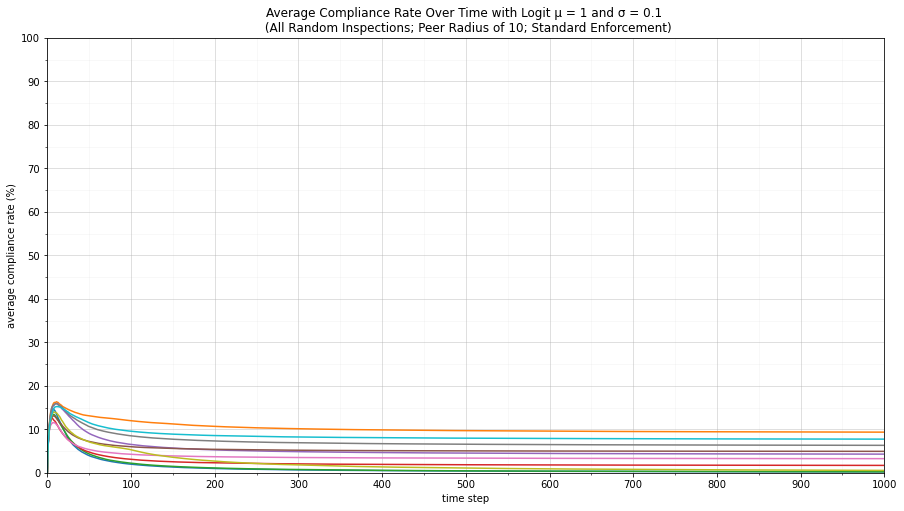

<Figure size 432x288 with 0 Axes>

In [175]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_1_1111['step'],standard_logit_mu_10_1_1111['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_1_1112['step'],standard_logit_mu_10_1_1112['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_1_1113['step'],standard_logit_mu_10_1_1113['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_1_1114['step'],standard_logit_mu_10_1_1114['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_1_1115['step'],standard_logit_mu_10_1_1115['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_1_1116['step'],standard_logit_mu_10_1_1116['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_1_1117['step'],standard_logit_mu_10_1_1117['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_1_1118['step'],standard_logit_mu_10_1_1118['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_1_1119['step'],standard_logit_mu_10_1_1119['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_1_1120['step'],standard_logit_mu_10_1_1120['avg-compliance-rate'])


plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.1 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

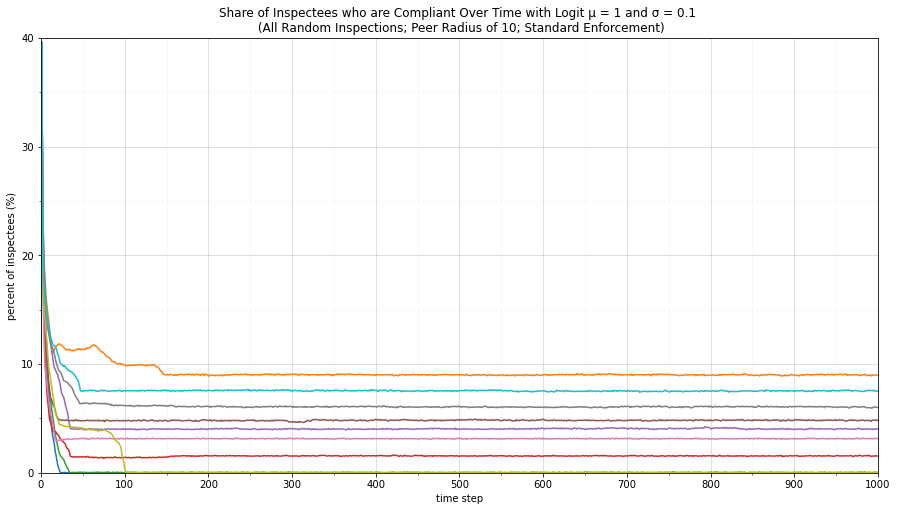

<Figure size 432x288 with 0 Axes>

In [233]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(standard_logit_mu_10_1_1111['step'],standard_logit_mu_10_1_1111['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1112['step'],standard_logit_mu_10_1_1112['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1113['step'],standard_logit_mu_10_1_1113['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1114['step'],standard_logit_mu_10_1_1114['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1115['step'],standard_logit_mu_10_1_1115['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1116['step'],standard_logit_mu_10_1_1116['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1117['step'],standard_logit_mu_10_1_1117['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1118['step'],standard_logit_mu_10_1_1118['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1119['step'],standard_logit_mu_10_1_1119['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1120['step'],standard_logit_mu_10_1_1120['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.1 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

In [177]:
standard_logit_mu_10_2

run   mu  sigma  step  avg-compliance-rate  #-compliant-inspectees  \
1114490  1121  1.0      2     0             0.000000                       0   
1114501  1121  1.0      2     1             6.473724                    3119   
1114513  1121  1.0      2     2             9.723280                    2032   
1114524  1121  1.0      2     3            11.862148                    1661   
1114535  1121  1.0      2     4            13.484810                    1533   
...       ...  ...    ...   ...                  ...                     ...   
1135823  1129  1.0      2   996            11.244379                     866   
1135836  1129  1.0      2   997            11.244044                     871   
1135847  1129  1.0      2   998            11.243810                     869   
1135858  1129  1.0      2   999            11.243634                     872   
1135870  1129  1.0      2  1000            11.243513                     869   

         #-unintentional-violators  #-conscious-violators  \
1114490                          0                      0   
1114501                        989                   3635   
1114513                        274                   5540   
1114524                        113                   6076   
1114535                        108                   6211   
...                            ...                    ...   
1135823                         92                   6883   
1135836                         86                   6881   
1135847                         86                   6881   
1135858                         86                   6880   
1135870                         84                   6887   

         #-criminal-violators  perc-compliant  ...  perc-1  perc-12  perc-23  \
1114490                     0        0.000000  ...     0.0      0.0      0.0   
1114501                   133       39.601320  ...     0.0      0.0      0.0   
1114513                    32       25.793349  ...     0.0      0.0      0.0   
1114524                    28       21.084031  ...     0.0      0.0      0.0   
1114535                    26       19.459254  ...     0.0      0.0      0.0   
...                       ...             ...  ...     ...      ...      ...   
1135823                    37       10.992638  ...     0.0      0.0      0.0   
1135836                    40       11.056106  ...     0.0      0.0      0.0   
1135847                    42       11.030718  ...     0.0      0.0      0.0   
1135858                    40       11.068799  ...     0.0      0.0      0.0   
1135870                    38       11.030718  ...     0.0      0.0      0.0   

         perc-34  perc-45   perc-56    perc-67    perc-78   perc-89  perc-91  
1114490      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114501      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114513      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114524      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
1114535      0.0      0.0  0.114242  22.442244  74.892105  2.551409      0.0  
...          ...      ...       ...        ...        ...       ...      ...  
1135823      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135836      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135847      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135858      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  
1135870      0.0      0.0  0.228484  22.404163  74.638233  2.729119      0.0  

[10010 rows x 24 columns]

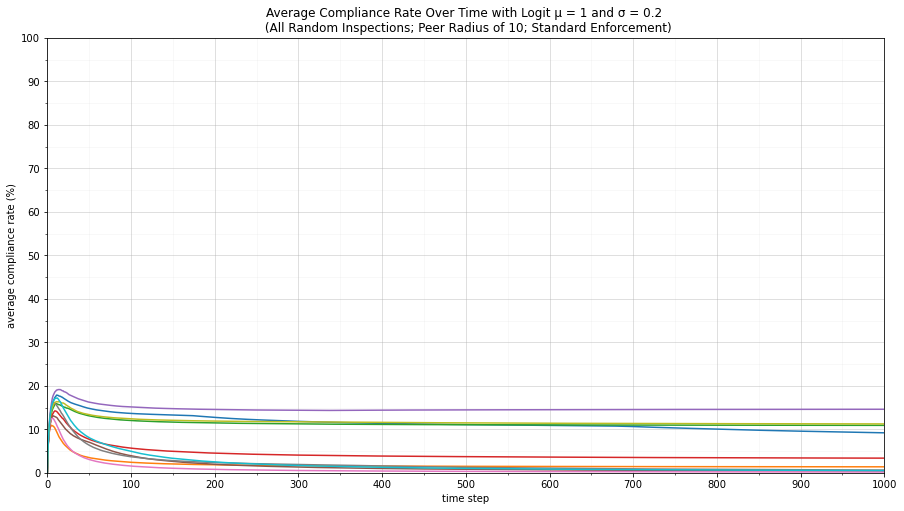

<Figure size 432x288 with 0 Axes>

In [178]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_2_1121['step'],standard_logit_mu_10_2_1121['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_2_1122['step'],standard_logit_mu_10_2_1122['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_2_1123['step'],standard_logit_mu_10_2_1123['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_2_1124['step'],standard_logit_mu_10_2_1124['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_2_1125['step'],standard_logit_mu_10_2_1125['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_2_1126['step'],standard_logit_mu_10_2_1126['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_2_1127['step'],standard_logit_mu_10_2_1127['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_2_1128['step'],standard_logit_mu_10_2_1128['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_2_1129['step'],standard_logit_mu_10_2_1129['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_2_1130['step'],standard_logit_mu_10_2_1130['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.2 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.2 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

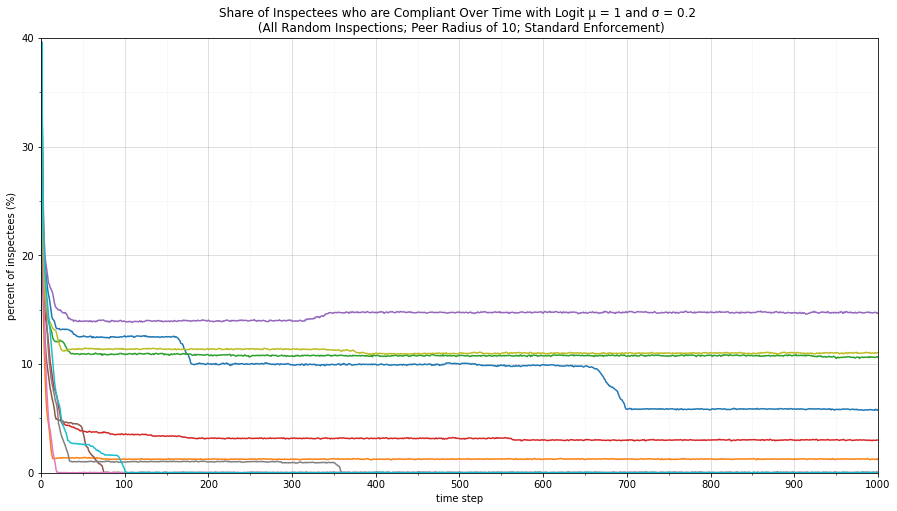

<Figure size 432x288 with 0 Axes>

In [234]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(standard_logit_mu_10_2_1121['step'],standard_logit_mu_10_2_1121['perc-compliant'])
plt.plot(standard_logit_mu_10_2_1122['step'],standard_logit_mu_10_2_1122['perc-compliant'])
plt.plot(standard_logit_mu_10_2_1123['step'],standard_logit_mu_10_2_1123['perc-compliant'])
plt.plot(standard_logit_mu_10_2_1124['step'],standard_logit_mu_10_2_1124['perc-compliant'])
plt.plot(standard_logit_mu_10_2_1125['step'],standard_logit_mu_10_2_1125['perc-compliant'])
plt.plot(standard_logit_mu_10_2_1126['step'],standard_logit_mu_10_2_1126['perc-compliant'])
plt.plot(standard_logit_mu_10_2_1127['step'],standard_logit_mu_10_2_1127['perc-compliant'])
plt.plot(standard_logit_mu_10_2_1128['step'],standard_logit_mu_10_2_1128['perc-compliant'])
plt.plot(standard_logit_mu_10_2_1129['step'],standard_logit_mu_10_2_1129['perc-compliant'])
plt.plot(standard_logit_mu_10_2_1130['step'],standard_logit_mu_10_2_1130['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.2 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.2 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

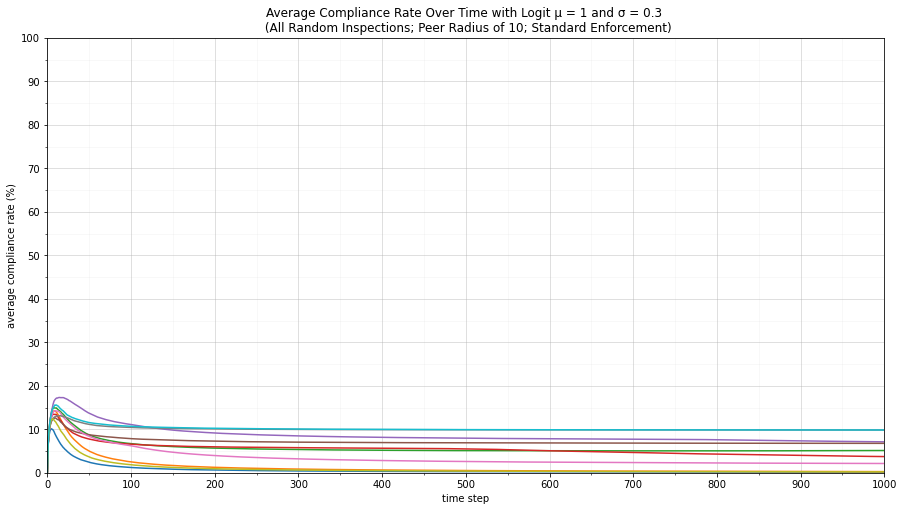

<Figure size 432x288 with 0 Axes>

In [179]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_3_1131['step'],standard_logit_mu_10_3_1131['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_3_1132['step'],standard_logit_mu_10_3_1132['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_3_1133['step'],standard_logit_mu_10_3_1133['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_3_1134['step'],standard_logit_mu_10_3_1134['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_3_1135['step'],standard_logit_mu_10_3_1135['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_3_1136['step'],standard_logit_mu_10_3_1136['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_3_1137['step'],standard_logit_mu_10_3_1137['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_3_1138['step'],standard_logit_mu_10_3_1138['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_3_1139['step'],standard_logit_mu_10_3_1139['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_3_1140['step'],standard_logit_mu_10_3_1140['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.3 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.3 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

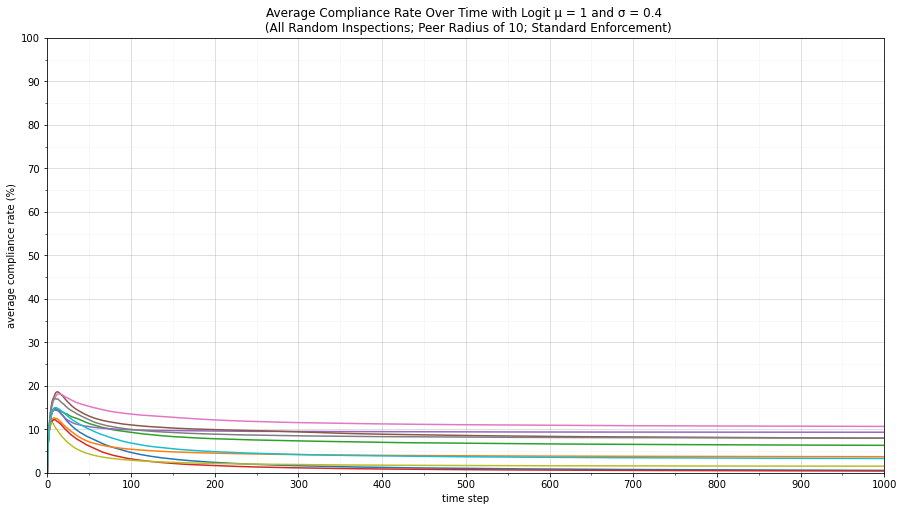

<Figure size 432x288 with 0 Axes>

In [180]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_4_1141['step'],standard_logit_mu_10_4_1141['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_4_1142['step'],standard_logit_mu_10_4_1142['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_4_1143['step'],standard_logit_mu_10_4_1143['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_4_1144['step'],standard_logit_mu_10_4_1144['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_4_1145['step'],standard_logit_mu_10_4_1145['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_4_1146['step'],standard_logit_mu_10_4_1146['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_4_1147['step'],standard_logit_mu_10_4_1147['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_4_1148['step'],standard_logit_mu_10_4_1148['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_4_1149['step'],standard_logit_mu_10_4_1149['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_4_1150['step'],standard_logit_mu_10_4_1150['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.4 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.4 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

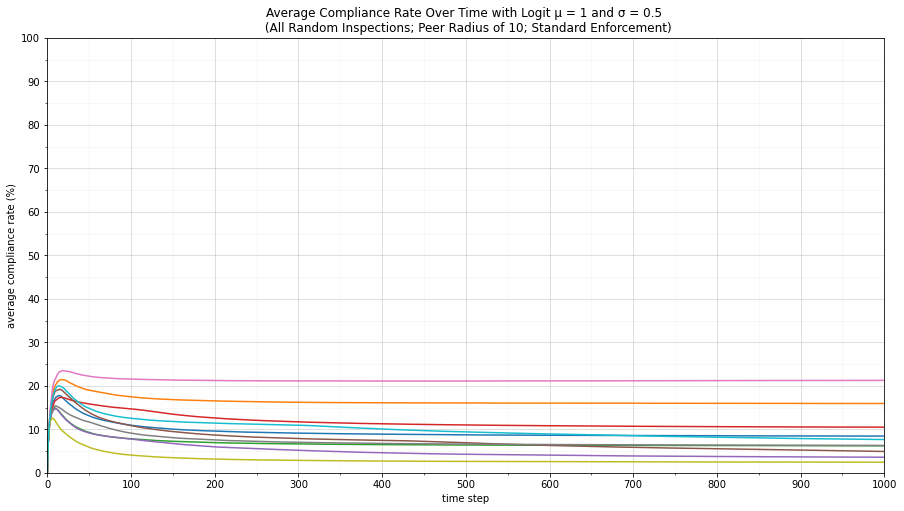

<Figure size 432x288 with 0 Axes>

In [181]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_5_1151['step'],standard_logit_mu_10_5_1151['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_5_1152['step'],standard_logit_mu_10_5_1152['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_5_1153['step'],standard_logit_mu_10_5_1153['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_5_1154['step'],standard_logit_mu_10_5_1154['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_5_1155['step'],standard_logit_mu_10_5_1155['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_5_1156['step'],standard_logit_mu_10_5_1156['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_5_1157['step'],standard_logit_mu_10_5_1157['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_5_1158['step'],standard_logit_mu_10_5_1158['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_5_1159['step'],standard_logit_mu_10_5_1159['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_5_1160['step'],standard_logit_mu_10_5_1160['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.5 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

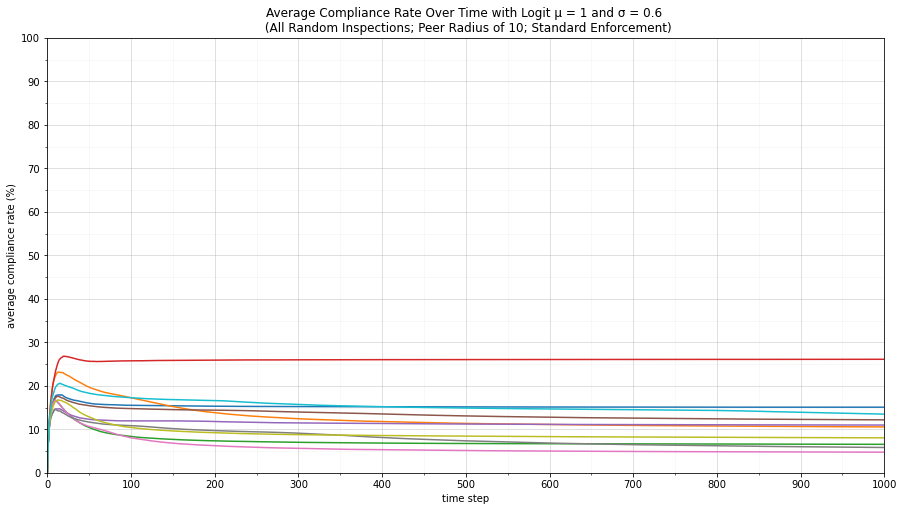

<Figure size 432x288 with 0 Axes>

In [182]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_6_1161['step'],standard_logit_mu_10_6_1161['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_6_1162['step'],standard_logit_mu_10_6_1162['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_6_1163['step'],standard_logit_mu_10_6_1163['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_6_1164['step'],standard_logit_mu_10_6_1164['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_6_1165['step'],standard_logit_mu_10_6_1165['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_6_1166['step'],standard_logit_mu_10_6_1166['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_6_1167['step'],standard_logit_mu_10_6_1167['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_6_1168['step'],standard_logit_mu_10_6_1168['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_6_1169['step'],standard_logit_mu_10_6_1169['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_6_1170['step'],standard_logit_mu_10_6_1170['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.6 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.6 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

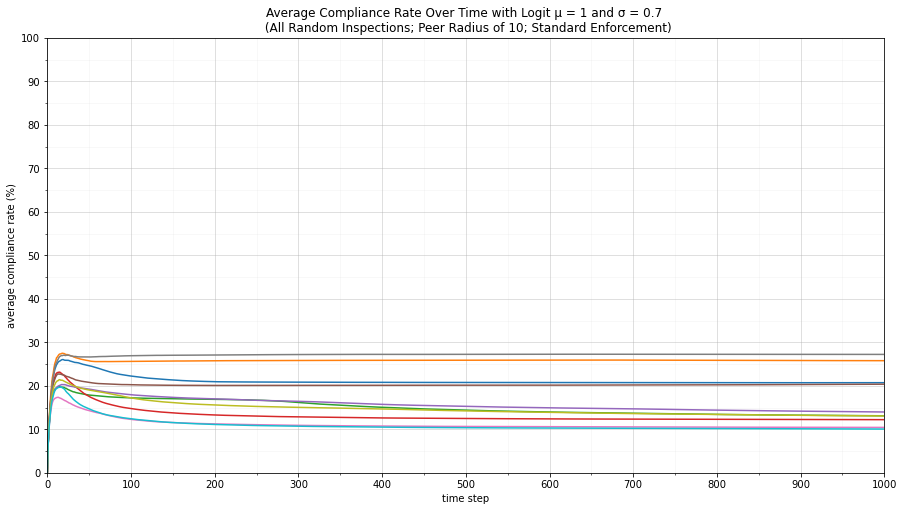

<Figure size 432x288 with 0 Axes>

In [183]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_7_1171['step'],standard_logit_mu_10_7_1171['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_7_1172['step'],standard_logit_mu_10_7_1172['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_7_1173['step'],standard_logit_mu_10_7_1173['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_7_1174['step'],standard_logit_mu_10_7_1174['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_7_1175['step'],standard_logit_mu_10_7_1175['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_7_1176['step'],standard_logit_mu_10_7_1176['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_7_1177['step'],standard_logit_mu_10_7_1177['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_7_1178['step'],standard_logit_mu_10_7_1178['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_7_1179['step'],standard_logit_mu_10_7_1179['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_7_1180['step'],standard_logit_mu_10_7_1180['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.7 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.7 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

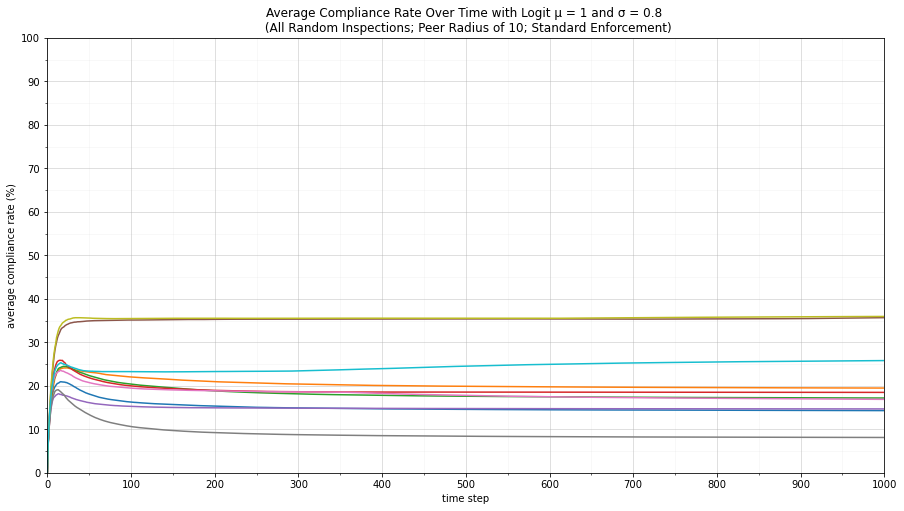

<Figure size 432x288 with 0 Axes>

In [184]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_8_1181['step'],standard_logit_mu_10_8_1181['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_8_1182['step'],standard_logit_mu_10_8_1182['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_8_1183['step'],standard_logit_mu_10_8_1183['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_8_1184['step'],standard_logit_mu_10_8_1184['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_8_1185['step'],standard_logit_mu_10_8_1185['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_8_1186['step'],standard_logit_mu_10_8_1186['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_8_1187['step'],standard_logit_mu_10_8_1187['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_8_1188['step'],standard_logit_mu_10_8_1188['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_8_1189['step'],standard_logit_mu_10_8_1189['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_8_1190['step'],standard_logit_mu_10_8_1190['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.8 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.8 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

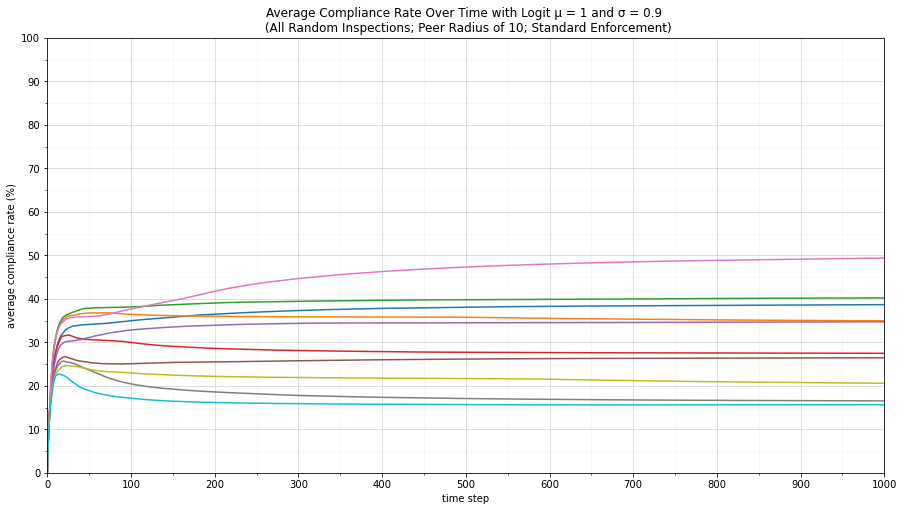

<Figure size 432x288 with 0 Axes>

In [185]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_9_1191['step'],standard_logit_mu_10_9_1191['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_9_1192['step'],standard_logit_mu_10_9_1192['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_9_1193['step'],standard_logit_mu_10_9_1193['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_9_1194['step'],standard_logit_mu_10_9_1194['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_9_1195['step'],standard_logit_mu_10_9_1195['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_9_1196['step'],standard_logit_mu_10_9_1196['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_9_1197['step'],standard_logit_mu_10_9_1197['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_9_1198['step'],standard_logit_mu_10_9_1198['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_9_1199['step'],standard_logit_mu_10_9_1199['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_9_1200['step'],standard_logit_mu_10_9_1200['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 0.9 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.9 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

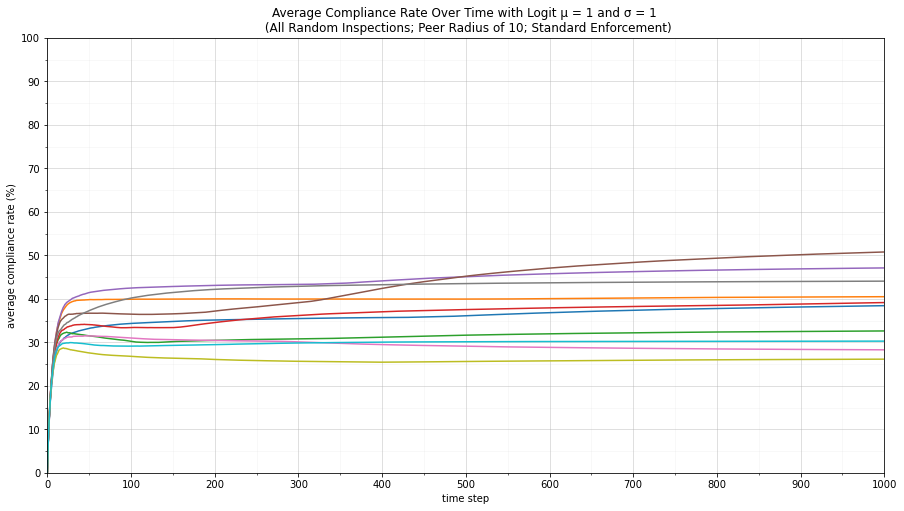

<Figure size 432x288 with 0 Axes>

In [186]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(standard_logit_mu_10_10_1201['step'],standard_logit_mu_10_10_1201['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_10_1202['step'],standard_logit_mu_10_10_1202['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_10_1203['step'],standard_logit_mu_10_10_1203['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_10_1204['step'],standard_logit_mu_10_10_1204['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_10_1205['step'],standard_logit_mu_10_10_1205['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_10_1206['step'],standard_logit_mu_10_10_1206['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_10_1207['step'],standard_logit_mu_10_10_1207['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_10_1208['step'],standard_logit_mu_10_10_1208['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_10_1209['step'],standard_logit_mu_10_10_1209['avg-compliance-rate'])
plt.plot(standard_logit_mu_10_10_1210['step'],standard_logit_mu_10_10_1210['avg-compliance-rate'])

plt.title("Average Compliance Rate Over Time with Logit μ = 1 and σ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=1 Time vs Avg Compliance All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

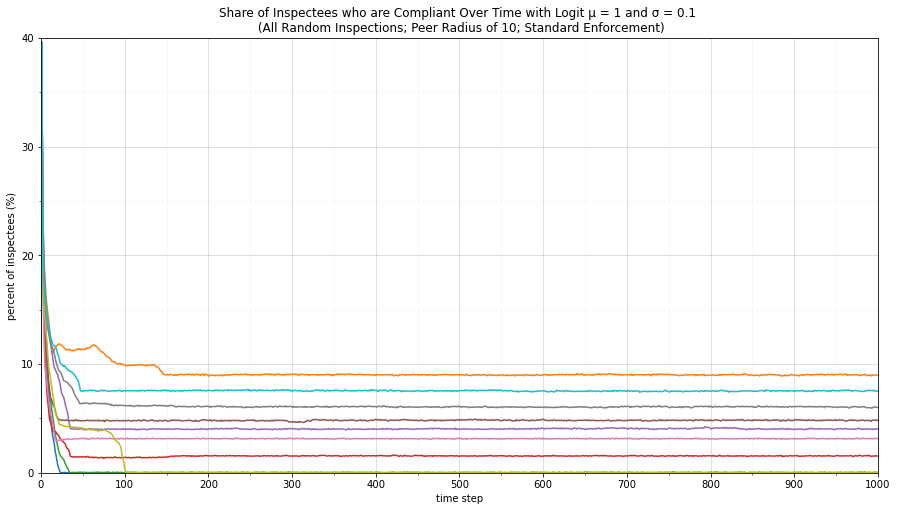

<Figure size 432x288 with 0 Axes>

In [235]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(standard_logit_mu_10_1_1111['step'],standard_logit_mu_10_1_1111['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1112['step'],standard_logit_mu_10_1_1112['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1113['step'],standard_logit_mu_10_1_1113['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1114['step'],standard_logit_mu_10_1_1114['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1115['step'],standard_logit_mu_10_1_1115['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1116['step'],standard_logit_mu_10_1_1116['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1117['step'],standard_logit_mu_10_1_1117['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1118['step'],standard_logit_mu_10_1_1118['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1119['step'],standard_logit_mu_10_1_1119['perc-compliant'])
plt.plot(standard_logit_mu_10_1_1120['step'],standard_logit_mu_10_1_1120['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.1 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

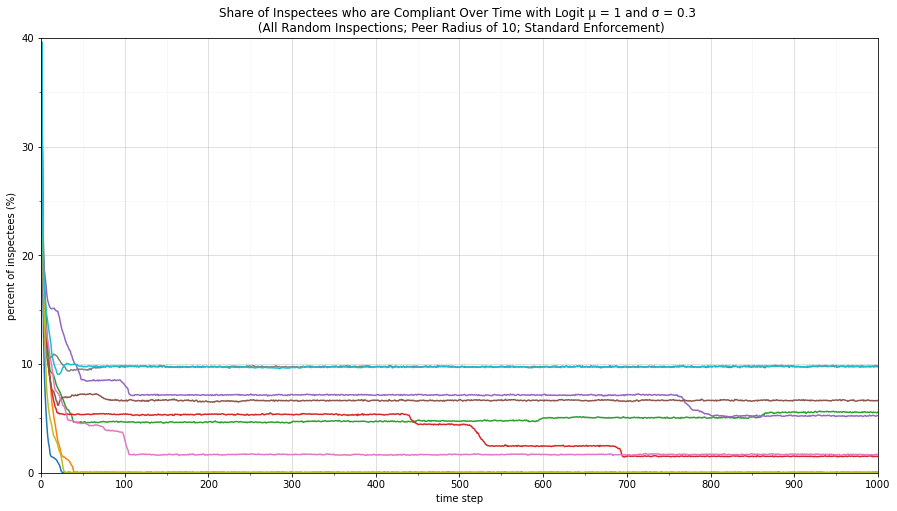

<Figure size 432x288 with 0 Axes>

In [236]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(standard_logit_mu_10_3_1131['step'],standard_logit_mu_10_3_1131['perc-compliant'])
plt.plot(standard_logit_mu_10_3_1132['step'],standard_logit_mu_10_3_1132['perc-compliant'])
plt.plot(standard_logit_mu_10_3_1133['step'],standard_logit_mu_10_3_1133['perc-compliant'])
plt.plot(standard_logit_mu_10_3_1134['step'],standard_logit_mu_10_3_1134['perc-compliant'])
plt.plot(standard_logit_mu_10_3_1135['step'],standard_logit_mu_10_3_1135['perc-compliant'])
plt.plot(standard_logit_mu_10_3_1136['step'],standard_logit_mu_10_3_1136['perc-compliant'])
plt.plot(standard_logit_mu_10_3_1137['step'],standard_logit_mu_10_3_1137['perc-compliant'])
plt.plot(standard_logit_mu_10_3_1138['step'],standard_logit_mu_10_3_1138['perc-compliant'])
plt.plot(standard_logit_mu_10_3_1139['step'],standard_logit_mu_10_3_1139['perc-compliant'])
plt.plot(standard_logit_mu_10_3_1140['step'],standard_logit_mu_10_3_1140['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.3 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.3 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

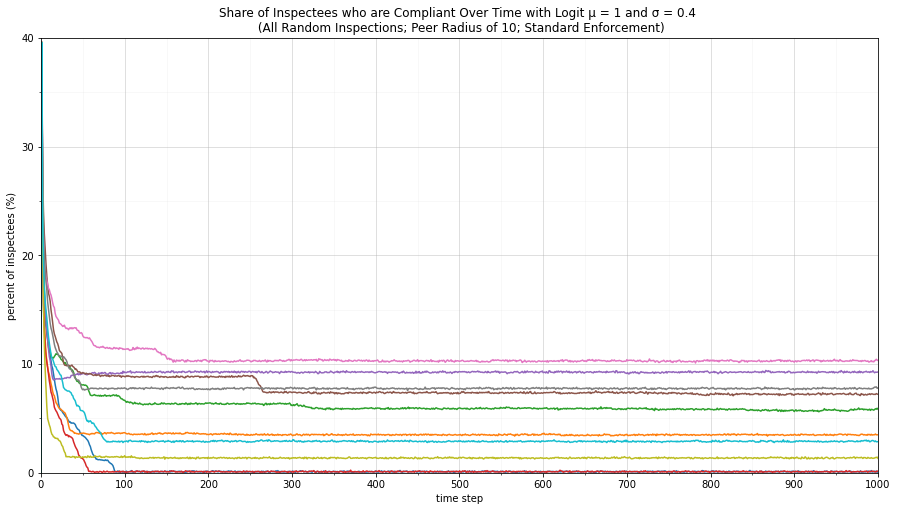

<Figure size 432x288 with 0 Axes>

In [237]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(standard_logit_mu_10_4_1141['step'],standard_logit_mu_10_4_1141['perc-compliant'])
plt.plot(standard_logit_mu_10_4_1142['step'],standard_logit_mu_10_4_1142['perc-compliant'])
plt.plot(standard_logit_mu_10_4_1143['step'],standard_logit_mu_10_4_1143['perc-compliant'])
plt.plot(standard_logit_mu_10_4_1144['step'],standard_logit_mu_10_4_1144['perc-compliant'])
plt.plot(standard_logit_mu_10_4_1145['step'],standard_logit_mu_10_4_1145['perc-compliant'])
plt.plot(standard_logit_mu_10_4_1146['step'],standard_logit_mu_10_4_1146['perc-compliant'])
plt.plot(standard_logit_mu_10_4_1147['step'],standard_logit_mu_10_4_1147['perc-compliant'])
plt.plot(standard_logit_mu_10_4_1148['step'],standard_logit_mu_10_4_1148['perc-compliant'])
plt.plot(standard_logit_mu_10_4_1149['step'],standard_logit_mu_10_4_1149['perc-compliant'])
plt.plot(standard_logit_mu_10_4_1150['step'],standard_logit_mu_10_4_1150['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.4 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.4 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

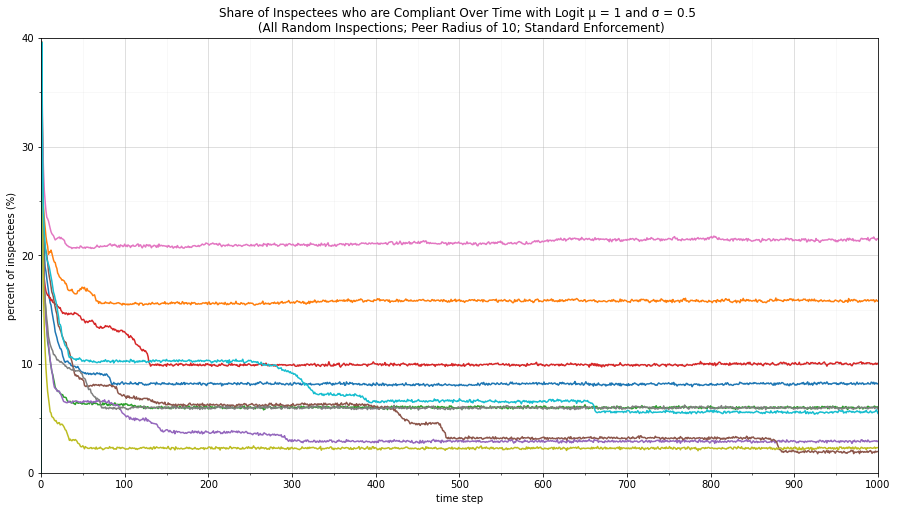

<Figure size 432x288 with 0 Axes>

In [238]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(standard_logit_mu_10_5_1151['step'],standard_logit_mu_10_5_1151['perc-compliant'])
plt.plot(standard_logit_mu_10_5_1152['step'],standard_logit_mu_10_5_1152['perc-compliant'])
plt.plot(standard_logit_mu_10_5_1153['step'],standard_logit_mu_10_5_1153['perc-compliant'])
plt.plot(standard_logit_mu_10_5_1154['step'],standard_logit_mu_10_5_1154['perc-compliant'])
plt.plot(standard_logit_mu_10_5_1155['step'],standard_logit_mu_10_5_1155['perc-compliant'])
plt.plot(standard_logit_mu_10_5_1156['step'],standard_logit_mu_10_5_1156['perc-compliant'])
plt.plot(standard_logit_mu_10_5_1157['step'],standard_logit_mu_10_5_1157['perc-compliant'])
plt.plot(standard_logit_mu_10_5_1158['step'],standard_logit_mu_10_5_1158['perc-compliant'])
plt.plot(standard_logit_mu_10_5_1159['step'],standard_logit_mu_10_5_1159['perc-compliant'])
plt.plot(standard_logit_mu_10_5_1160['step'],standard_logit_mu_10_5_1160['perc-compliant'])


plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.5 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.5 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

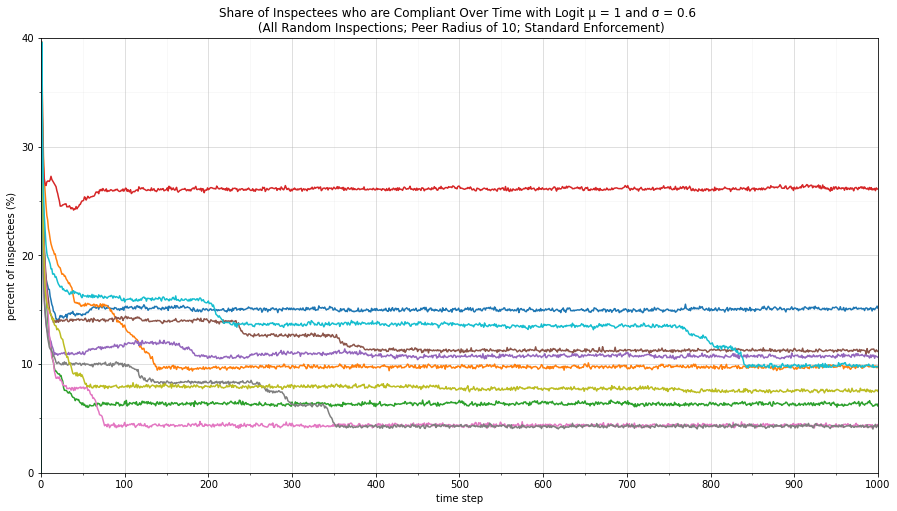

<Figure size 432x288 with 0 Axes>

In [239]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(standard_logit_mu_10_6_1161['step'],standard_logit_mu_10_6_1161['perc-compliant'])
plt.plot(standard_logit_mu_10_6_1162['step'],standard_logit_mu_10_6_1162['perc-compliant'])
plt.plot(standard_logit_mu_10_6_1163['step'],standard_logit_mu_10_6_1163['perc-compliant'])
plt.plot(standard_logit_mu_10_6_1164['step'],standard_logit_mu_10_6_1164['perc-compliant'])
plt.plot(standard_logit_mu_10_6_1165['step'],standard_logit_mu_10_6_1165['perc-compliant'])
plt.plot(standard_logit_mu_10_6_1166['step'],standard_logit_mu_10_6_1166['perc-compliant'])
plt.plot(standard_logit_mu_10_6_1167['step'],standard_logit_mu_10_6_1167['perc-compliant'])
plt.plot(standard_logit_mu_10_6_1168['step'],standard_logit_mu_10_6_1168['perc-compliant'])
plt.plot(standard_logit_mu_10_6_1169['step'],standard_logit_mu_10_6_1169['perc-compliant'])
plt.plot(standard_logit_mu_10_6_1170['step'],standard_logit_mu_10_6_1170['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.6 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.6 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

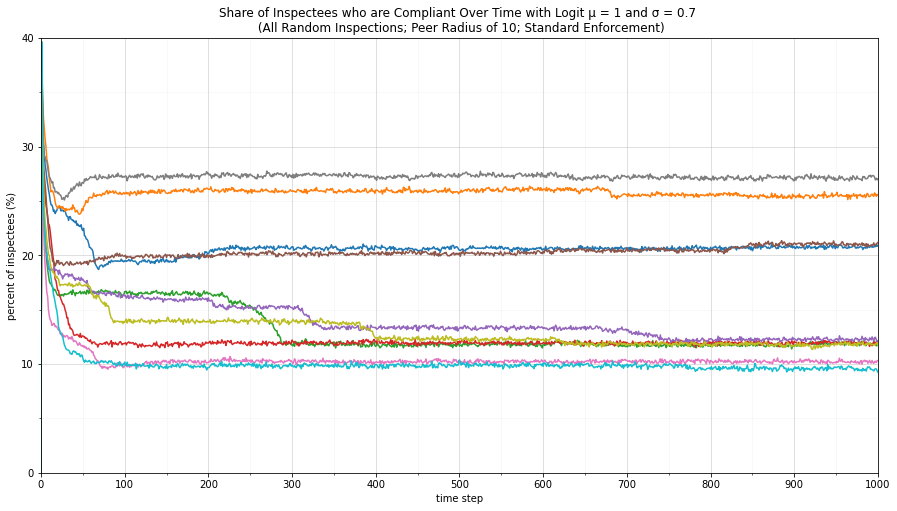

<Figure size 432x288 with 0 Axes>

In [240]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(standard_logit_mu_10_7_1171['step'],standard_logit_mu_10_7_1171['perc-compliant'])
plt.plot(standard_logit_mu_10_7_1172['step'],standard_logit_mu_10_7_1172['perc-compliant'])
plt.plot(standard_logit_mu_10_7_1173['step'],standard_logit_mu_10_7_1173['perc-compliant'])
plt.plot(standard_logit_mu_10_7_1174['step'],standard_logit_mu_10_7_1174['perc-compliant'])
plt.plot(standard_logit_mu_10_7_1175['step'],standard_logit_mu_10_7_1175['perc-compliant'])
plt.plot(standard_logit_mu_10_7_1176['step'],standard_logit_mu_10_7_1176['perc-compliant'])
plt.plot(standard_logit_mu_10_7_1177['step'],standard_logit_mu_10_7_1177['perc-compliant'])
plt.plot(standard_logit_mu_10_7_1178['step'],standard_logit_mu_10_7_1178['perc-compliant'])
plt.plot(standard_logit_mu_10_7_1179['step'],standard_logit_mu_10_7_1179['perc-compliant'])
plt.plot(standard_logit_mu_10_7_1180['step'],standard_logit_mu_10_7_1180['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.7 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.7 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

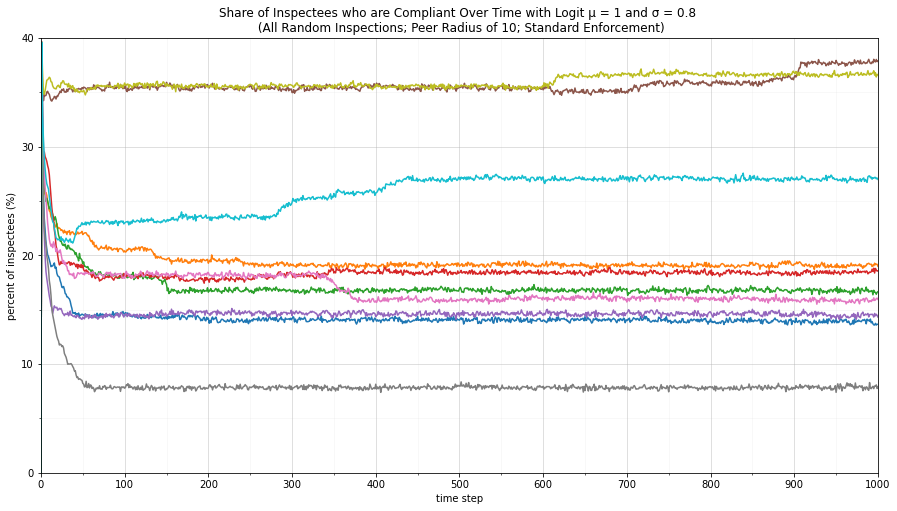

<Figure size 432x288 with 0 Axes>

In [241]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,40.1,10))
ax.set_yticks(np.arange(0,40.1,5), minor=True)

plt.plot(standard_logit_mu_10_8_1181['step'],standard_logit_mu_10_8_1181['perc-compliant'])
plt.plot(standard_logit_mu_10_8_1182['step'],standard_logit_mu_10_8_1182['perc-compliant'])
plt.plot(standard_logit_mu_10_8_1183['step'],standard_logit_mu_10_8_1183['perc-compliant'])
plt.plot(standard_logit_mu_10_8_1184['step'],standard_logit_mu_10_8_1184['perc-compliant'])
plt.plot(standard_logit_mu_10_8_1185['step'],standard_logit_mu_10_8_1185['perc-compliant'])
plt.plot(standard_logit_mu_10_8_1186['step'],standard_logit_mu_10_8_1186['perc-compliant'])
plt.plot(standard_logit_mu_10_8_1187['step'],standard_logit_mu_10_8_1187['perc-compliant'])
plt.plot(standard_logit_mu_10_8_1188['step'],standard_logit_mu_10_8_1188['perc-compliant'])
plt.plot(standard_logit_mu_10_8_1189['step'],standard_logit_mu_10_8_1189['perc-compliant'])
plt.plot(standard_logit_mu_10_8_1190['step'],standard_logit_mu_10_8_1190['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.8 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,40.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.8 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

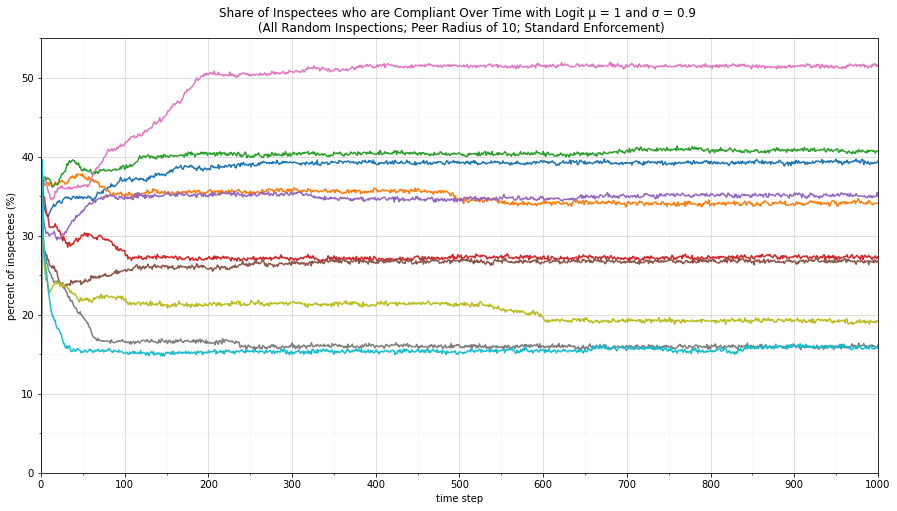

<Figure size 432x288 with 0 Axes>

In [242]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,55.1,10))
ax.set_yticks(np.arange(0,55.1,5), minor=True)

plt.plot(standard_logit_mu_10_9_1191['step'],standard_logit_mu_10_9_1191['perc-compliant'])
plt.plot(standard_logit_mu_10_9_1192['step'],standard_logit_mu_10_9_1192['perc-compliant'])
plt.plot(standard_logit_mu_10_9_1193['step'],standard_logit_mu_10_9_1193['perc-compliant'])
plt.plot(standard_logit_mu_10_9_1194['step'],standard_logit_mu_10_9_1194['perc-compliant'])
plt.plot(standard_logit_mu_10_9_1195['step'],standard_logit_mu_10_9_1195['perc-compliant'])
plt.plot(standard_logit_mu_10_9_1196['step'],standard_logit_mu_10_9_1196['perc-compliant'])
plt.plot(standard_logit_mu_10_9_1197['step'],standard_logit_mu_10_9_1197['perc-compliant'])
plt.plot(standard_logit_mu_10_9_1198['step'],standard_logit_mu_10_9_1198['perc-compliant'])
plt.plot(standard_logit_mu_10_9_1199['step'],standard_logit_mu_10_9_1199['perc-compliant'])
plt.plot(standard_logit_mu_10_9_1200['step'],standard_logit_mu_10_9_1200['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 0.9 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,55.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=0.9 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')

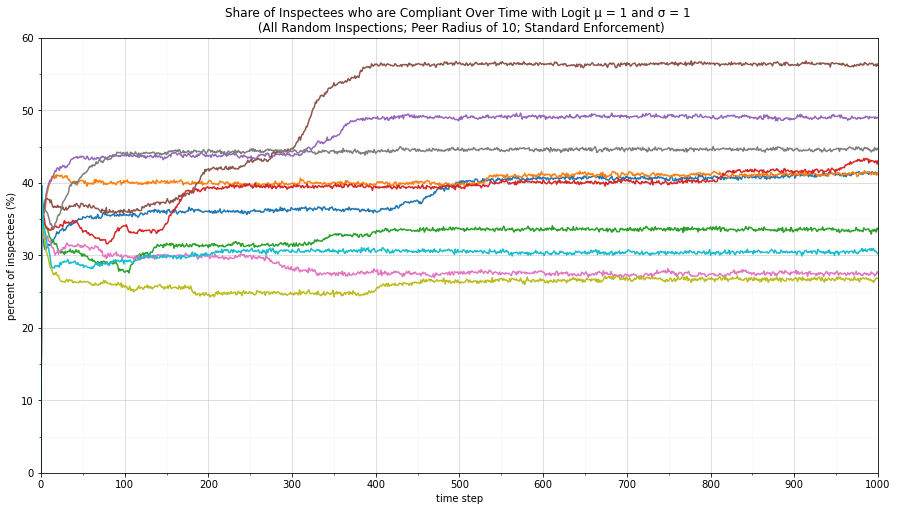

<Figure size 432x288 with 0 Axes>

In [243]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,60.1,10))
ax.set_yticks(np.arange(0,60.1,5), minor=True)

plt.plot(standard_logit_mu_10_10_1201['step'],standard_logit_mu_10_10_1201['perc-compliant'])
plt.plot(standard_logit_mu_10_10_1202['step'],standard_logit_mu_10_10_1202['perc-compliant'])
plt.plot(standard_logit_mu_10_10_1203['step'],standard_logit_mu_10_10_1203['perc-compliant'])
plt.plot(standard_logit_mu_10_10_1204['step'],standard_logit_mu_10_10_1204['perc-compliant'])
plt.plot(standard_logit_mu_10_10_1205['step'],standard_logit_mu_10_10_1205['perc-compliant'])
plt.plot(standard_logit_mu_10_10_1206['step'],standard_logit_mu_10_10_1206['perc-compliant'])
plt.plot(standard_logit_mu_10_10_1207['step'],standard_logit_mu_10_10_1207['perc-compliant'])
plt.plot(standard_logit_mu_10_10_1208['step'],standard_logit_mu_10_10_1208['perc-compliant'])
plt.plot(standard_logit_mu_10_10_1209['step'],standard_logit_mu_10_10_1209['perc-compliant'])
plt.plot(standard_logit_mu_10_10_1210['step'],standard_logit_mu_10_10_1210['perc-compliant'])

plt.title("Share of Inspectees who are Compliant Over Time with Logit μ = 1 and σ = 1 \n (All Random Inspections; Peer Radius of 10; Standard Enforcement)")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,60.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.show()
plt.savefig('Logit Mu1- Sig=1 Time vs Compliant All Runs (Random, Standard, Radius 10).png', dpi=300, bbox_inches='tight')